In [32]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib inline

In [165]:
def clean_data(path = "/home/raflicky/Desktop/ML_notebooks/KERAS/RNN/folder_acciones"):
    files = os.listdir(path)
    df = pd.read_csv(path + "/" + files[0])
    df = df.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
    df.columns = ["Date", files[0]]
    for file in files[1:]:
        stock_price = pd.read_csv(path + "/" + file)
        stock_price = stock_price.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
        stock_price.columns = ["Date", file]
        df = pd.merge(stock_price, df, how='left',on='Date')
    return df

In [166]:
def import_some_files(path = "/home/raflicky/Desktop/ML_notebooks/KERAS/RNN/tipo_cambio"):
    files = os.listdir(path)
    dfs = []
    for file in files:
        some_df = pd.read_csv(path + "/" + file)
        dfs.append(some_df)
    return dfs

In [167]:
def merge_common_dates(dataframe, series):
    df = dataframe
    series = series.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
    df = pd.merge(df, series, how='left',on='Date')
    return df

In [170]:
path = ("/home/raflicky/Desktop/ML_notebooks/KERAS/RNN/modified")
files = os.listdir(path)
BMV = pd.read_csv(path + "/" + files[0])

In [171]:
eur_usd, usd_mxn = import_some_files()

In [172]:
all_variables = merge_common_dates(BMV, eur_usd)
all_variables = merge_common_dates(all_variables, usd_mxn)

In [173]:
all_variables = all_variables.fillna(method='ffill')
all_variables = all_variables.fillna(0)

In [174]:
my_data_frame_sum = all_variables.iloc[:,1]
my_data_frame = all_variables.drop(['Date', 'Adj Close'], axis=1)

In [175]:
#my_data_frame.to_csv("theXs")
#my_data_frame_sum.to_csv("theYs")

In [176]:
working_data = my_data_frame.iloc[0:1000]
working_data_sum = my_data_frame_sum.iloc[0:1000]
validate_data = my_data_frame.iloc[1000:]
validate_data_sum = my_data_frame_sum.iloc[1000:]

In [177]:
my_x = working_data.iloc[:,1:]
my_y = working_data_sum

In [178]:
import random
def next_batch2(dataframe, dataframe2, features):

    
    data = dataframe.values
    data2 = dataframe2.values

    X = data[:-1].reshape(len(data)-1,1,features)
    Y = data2[1:].reshape(len(data2)-1)
        
    return X, Y

In [181]:
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)

In [182]:
validateX, validateY = next_batch2(validate_data.iloc[:,1:], validate_data_sum, 36)

In [183]:
import pandas as pd
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Dropout
from keras import backend as K; K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=32, inter_op_parallelism_threads=32)))

In [184]:
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

Train on 999 samples, validate on 999 samples
Epoch 1/10000
 - 3s - loss: 248.6739 - val_loss: 241.9613
Epoch 2/10000
 - 0s - loss: 239.9271 - val_loss: 237.8766
Epoch 3/10000
 - 0s - loss: 235.9839 - val_loss: 233.9939
Epoch 4/10000
 - 0s - loss: 232.1109 - val_loss: 230.1411
Epoch 5/10000
 - 0s - loss: 228.2590 - val_loss: 226.3147
Epoch 6/10000
 - 0s - loss: 224.4412 - val_loss: 222.5081
Epoch 7/10000
 - 0s - loss: 220.6428 - val_loss: 218.7302
Epoch 8/10000
 - 0s - loss: 216.8700 - val_loss: 214.9707
Epoch 9/10000
 - 0s - loss: 213.1143 - val_loss: 211.2170
Epoch 10/10000
 - 0s - loss: 209.3605 - val_loss: 207.4632
Epoch 11/10000
 - 0s - loss: 205.6067 - val_loss: 203.7094
Epoch 12/10000
 - 0s - loss: 201.8529 - val_loss: 199.9556
Epoch 13/10000
 - 0s - loss: 198.0991 - val_loss: 196.2017
Epoch 14/10000
 - 0s - loss: 194.3453 - val_loss: 192.4479
Epoch 15/10000
 - 0s - loss: 190.5915 - val_loss: 188.6941
Epoch 16/10000
 - 0s - loss: 186.8377 - val_loss: 184.9403
Epoch 17/10000
 - 0

Epoch 142/10000
 - 0s - loss: 87.9865 - val_loss: 87.8987
Epoch 143/10000
 - 0s - loss: 87.8815 - val_loss: 87.7937
Epoch 144/10000
 - 0s - loss: 87.7766 - val_loss: 87.6888
Epoch 145/10000
 - 0s - loss: 87.6716 - val_loss: 87.5839
Epoch 146/10000
 - 0s - loss: 87.5667 - val_loss: 87.4789
Epoch 147/10000
 - 0s - loss: 87.4618 - val_loss: 87.3740
Epoch 148/10000
 - 0s - loss: 87.3568 - val_loss: 87.2690
Epoch 149/10000
 - 0s - loss: 87.2519 - val_loss: 87.1641
Epoch 150/10000
 - 0s - loss: 87.1469 - val_loss: 87.0592
Epoch 151/10000
 - 0s - loss: 87.0420 - val_loss: 86.9542
Epoch 152/10000
 - 0s - loss: 86.9370 - val_loss: 86.8493
Epoch 153/10000
 - 0s - loss: 86.8321 - val_loss: 86.7443
Epoch 154/10000
 - 0s - loss: 86.7272 - val_loss: 86.6394
Epoch 155/10000
 - 0s - loss: 86.6222 - val_loss: 86.5344
Epoch 156/10000
 - 0s - loss: 86.5173 - val_loss: 86.4295
Epoch 157/10000
 - 0s - loss: 86.4123 - val_loss: 86.3246
Epoch 158/10000
 - 0s - loss: 86.3074 - val_loss: 86.2196
Epoch 159/1000

 - 0s - loss: 84.3153 - val_loss: 84.3154
Epoch 284/10000
 - 0s - loss: 84.3157 - val_loss: 84.3160
Epoch 285/10000
 - 0s - loss: 84.3161 - val_loss: 84.3166
Epoch 286/10000
 - 0s - loss: 84.3165 - val_loss: 84.3172
Epoch 287/10000
 - 0s - loss: 84.3169 - val_loss: 84.3178
Epoch 288/10000
 - 0s - loss: 84.3174 - val_loss: 84.3184
Epoch 289/10000
 - 0s - loss: 84.3207 - val_loss: 84.3187
Epoch 290/10000
 - 0s - loss: 84.3210 - val_loss: 84.3190
Epoch 291/10000
 - 0s - loss: 84.3212 - val_loss: 84.3193
Epoch 292/10000
 - 0s - loss: 84.3215 - val_loss: 84.3197
Epoch 293/10000
 - 0s - loss: 84.3217 - val_loss: 84.3200
Epoch 294/10000
 - 0s - loss: 84.3219 - val_loss: 84.3203
Epoch 295/10000
 - 0s - loss: 84.3222 - val_loss: 84.3206
Epoch 296/10000
 - 0s - loss: 84.3224 - val_loss: 84.3209
Epoch 297/10000
 - 0s - loss: 84.3227 - val_loss: 84.3213
Epoch 298/10000
 - 0s - loss: 84.3229 - val_loss: 84.3216
Epoch 299/10000
 - 0s - loss: 84.3232 - val_loss: 84.3219
Epoch 300/10000
 - 0s - loss: 

Epoch 425/10000
 - 0s - loss: 84.3300 - val_loss: 84.3263
Epoch 426/10000
 - 0s - loss: 84.3300 - val_loss: 84.3263
Epoch 427/10000
 - 0s - loss: 84.3300 - val_loss: 84.3264
Epoch 428/10000
 - 0s - loss: 84.3300 - val_loss: 84.3264
Epoch 429/10000
 - 0s - loss: 84.3301 - val_loss: 84.3264
Epoch 430/10000
 - 0s - loss: 84.3301 - val_loss: 84.3264
Epoch 431/10000
 - 0s - loss: 84.3301 - val_loss: 84.3264
Epoch 432/10000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 433/10000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 434/10000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 435/10000
 - 0s - loss: 84.3302 - val_loss: 84.3265
Epoch 436/10000
 - 0s - loss: 84.3302 - val_loss: 84.3265
Epoch 437/10000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 438/10000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 439/10000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 440/10000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 441/10000
 - 0s - loss: 84.3303 - val_loss: 84.3266
Epoch 442/1000

 - 0s - loss: 84.3324 - val_loss: 84.3292
Epoch 567/10000
 - 0s - loss: 84.3324 - val_loss: 84.3293
Epoch 568/10000
 - 0s - loss: 84.3324 - val_loss: 84.3293
Epoch 569/10000
 - 0s - loss: 84.3324 - val_loss: 84.3293
Epoch 570/10000
 - 0s - loss: 84.3324 - val_loss: 84.3293
Epoch 571/10000
 - 0s - loss: 84.3325 - val_loss: 84.3293
Epoch 572/10000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 573/10000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 574/10000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 575/10000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 576/10000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 577/10000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 578/10000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 579/10000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 580/10000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 581/10000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 582/10000
 - 0s - loss: 84.3326 - val_loss: 84.3296
Epoch 583/10000
 - 0s - loss: 

Epoch 708/10000
 - 0s - loss: 36.8052 - val_loss: 49.4574
Epoch 709/10000
 - 0s - loss: 37.3777 - val_loss: 48.0630
Epoch 710/10000
 - 0s - loss: 35.6254 - val_loss: 52.0791
Epoch 711/10000
 - 0s - loss: 36.5284 - val_loss: 51.1251
Epoch 712/10000
 - 0s - loss: 36.1859 - val_loss: 44.6181
Epoch 713/10000
 - 0s - loss: 37.1957 - val_loss: 44.5094
Epoch 714/10000
 - 0s - loss: 37.3442 - val_loss: 50.6038
Epoch 715/10000
 - 0s - loss: 38.1269 - val_loss: 53.3162
Epoch 716/10000
 - 0s - loss: 38.6727 - val_loss: 50.6278
Epoch 717/10000
 - 0s - loss: 36.0216 - val_loss: 53.4146
Epoch 718/10000
 - 0s - loss: 37.1455 - val_loss: 48.1120
Epoch 719/10000
 - 0s - loss: 37.1200 - val_loss: 45.0341
Epoch 720/10000
 - 0s - loss: 34.4080 - val_loss: 50.2292
Epoch 721/10000
 - 0s - loss: 37.0805 - val_loss: 45.8128
Epoch 722/10000
 - 0s - loss: 35.5636 - val_loss: 48.7197
Epoch 723/10000
 - 0s - loss: 36.4621 - val_loss: 51.5102
Epoch 724/10000
 - 0s - loss: 36.6446 - val_loss: 52.2333
Epoch 725/1000

 - 0s - loss: 32.5592 - val_loss: 36.7254
Epoch 850/10000
 - 0s - loss: 33.7886 - val_loss: 36.6101
Epoch 851/10000
 - 0s - loss: 34.1112 - val_loss: 39.2138
Epoch 852/10000
 - 0s - loss: 37.4367 - val_loss: 37.8751
Epoch 853/10000
 - 0s - loss: 35.0000 - val_loss: 40.5280
Epoch 854/10000
 - 0s - loss: 34.0138 - val_loss: 37.7879
Epoch 855/10000
 - 0s - loss: 32.6468 - val_loss: 40.2140
Epoch 856/10000
 - 0s - loss: 34.0448 - val_loss: 37.5138
Epoch 857/10000
 - 0s - loss: 33.0475 - val_loss: 36.2839
Epoch 858/10000
 - 0s - loss: 32.6392 - val_loss: 38.6304
Epoch 859/10000
 - 0s - loss: 34.5409 - val_loss: 35.9888
Epoch 860/10000
 - 0s - loss: 35.2723 - val_loss: 39.9822
Epoch 861/10000
 - 0s - loss: 33.4792 - val_loss: 35.4354
Epoch 862/10000
 - 0s - loss: 33.2754 - val_loss: 42.0940
Epoch 863/10000
 - 0s - loss: 36.5706 - val_loss: 39.3004
Epoch 864/10000
 - 0s - loss: 33.3583 - val_loss: 35.8251
Epoch 865/10000
 - 0s - loss: 34.5617 - val_loss: 35.9338
Epoch 866/10000
 - 0s - loss: 

Epoch 991/10000
 - 0s - loss: 31.8880 - val_loss: 34.9881
Epoch 992/10000
 - 0s - loss: 32.8133 - val_loss: 35.2003
Epoch 993/10000
 - 0s - loss: 32.3956 - val_loss: 34.5739
Epoch 994/10000
 - 0s - loss: 32.9538 - val_loss: 34.6530
Epoch 995/10000
 - 0s - loss: 32.8174 - val_loss: 33.4025
Epoch 996/10000
 - 0s - loss: 32.9462 - val_loss: 33.1697
Epoch 997/10000
 - 0s - loss: 31.5199 - val_loss: 34.4362
Epoch 998/10000
 - 0s - loss: 32.7393 - val_loss: 38.2167
Epoch 999/10000
 - 0s - loss: 31.5931 - val_loss: 34.2922
Epoch 1000/10000
 - 0s - loss: 34.0263 - val_loss: 33.5602
Epoch 1001/10000
 - 0s - loss: 33.7845 - val_loss: 35.6772
Epoch 1002/10000
 - 0s - loss: 30.3994 - val_loss: 32.7515
Epoch 1003/10000
 - 0s - loss: 32.0503 - val_loss: 31.9476
Epoch 1004/10000
 - 0s - loss: 32.6438 - val_loss: 34.5015
Epoch 1005/10000
 - 0s - loss: 34.3117 - val_loss: 35.3902
Epoch 1006/10000
 - 0s - loss: 32.6157 - val_loss: 33.2913
Epoch 1007/10000
 - 0s - loss: 32.4895 - val_loss: 37.2860
Epoch 

 - 0s - loss: 29.4074 - val_loss: 31.6983
Epoch 1131/10000
 - 0s - loss: 29.6258 - val_loss: 34.6922
Epoch 1132/10000
 - 0s - loss: 31.9261 - val_loss: 32.3353
Epoch 1133/10000
 - 0s - loss: 31.6054 - val_loss: 31.6245
Epoch 1134/10000
 - 0s - loss: 31.2279 - val_loss: 31.2688
Epoch 1135/10000
 - 0s - loss: 30.1579 - val_loss: 30.3678
Epoch 1136/10000
 - 0s - loss: 29.8666 - val_loss: 30.3618
Epoch 1137/10000
 - 0s - loss: 29.3172 - val_loss: 28.8757
Epoch 1138/10000
 - 0s - loss: 29.5246 - val_loss: 27.6091
Epoch 1139/10000
 - 0s - loss: 29.8542 - val_loss: 28.0504
Epoch 1140/10000
 - 0s - loss: 29.2882 - val_loss: 28.6337
Epoch 1141/10000
 - 0s - loss: 28.2393 - val_loss: 27.3565
Epoch 1142/10000
 - 0s - loss: 29.4977 - val_loss: 31.1070
Epoch 1143/10000
 - 0s - loss: 29.2070 - val_loss: 29.5959
Epoch 1144/10000
 - 0s - loss: 28.8206 - val_loss: 31.8465
Epoch 1145/10000
 - 0s - loss: 30.5132 - val_loss: 29.7716
Epoch 1146/10000
 - 0s - loss: 29.1906 - val_loss: 28.6763
Epoch 1147/100

 - 0s - loss: 25.8550 - val_loss: 23.5109
Epoch 1270/10000
 - 0s - loss: 27.4966 - val_loss: 27.9910
Epoch 1271/10000
 - 0s - loss: 29.0847 - val_loss: 27.4396
Epoch 1272/10000
 - 0s - loss: 27.0795 - val_loss: 23.8453
Epoch 1273/10000
 - 0s - loss: 26.0055 - val_loss: 24.7637
Epoch 1274/10000
 - 0s - loss: 26.4081 - val_loss: 22.9787
Epoch 1275/10000
 - 0s - loss: 29.0582 - val_loss: 21.9280
Epoch 1276/10000
 - 0s - loss: 27.4532 - val_loss: 22.1799
Epoch 1277/10000
 - 0s - loss: 26.7136 - val_loss: 26.1703
Epoch 1278/10000
 - 0s - loss: 25.1045 - val_loss: 22.1001
Epoch 1279/10000
 - 0s - loss: 26.5265 - val_loss: 25.7560
Epoch 1280/10000
 - 0s - loss: 26.2553 - val_loss: 22.3628
Epoch 1281/10000
 - 0s - loss: 26.4434 - val_loss: 20.4804
Epoch 1282/10000
 - 0s - loss: 28.6686 - val_loss: 24.9220
Epoch 1283/10000
 - 0s - loss: 27.7534 - val_loss: 24.9684
Epoch 1284/10000
 - 0s - loss: 25.8225 - val_loss: 21.7598
Epoch 1285/10000
 - 0s - loss: 26.2971 - val_loss: 21.4046
Epoch 1286/100

 - 0s - loss: 21.4376 - val_loss: 20.1991
Epoch 1409/10000
 - 0s - loss: 23.4164 - val_loss: 18.0428
Epoch 1410/10000
 - 0s - loss: 21.7614 - val_loss: 16.0939
Epoch 1411/10000
 - 0s - loss: 22.1615 - val_loss: 21.7797
Epoch 1412/10000
 - 0s - loss: 22.6356 - val_loss: 18.6017
Epoch 1413/10000
 - 0s - loss: 21.7398 - val_loss: 17.0224
Epoch 1414/10000
 - 0s - loss: 22.2713 - val_loss: 16.6426
Epoch 1415/10000
 - 0s - loss: 22.6280 - val_loss: 18.2733
Epoch 1416/10000
 - 0s - loss: 22.1856 - val_loss: 18.8766
Epoch 1417/10000
 - 0s - loss: 23.0715 - val_loss: 16.7490
Epoch 1418/10000
 - 0s - loss: 23.1124 - val_loss: 18.5938
Epoch 1419/10000
 - 0s - loss: 23.1578 - val_loss: 17.5079
Epoch 1420/10000
 - 0s - loss: 21.5713 - val_loss: 18.7624
Epoch 1421/10000
 - 0s - loss: 20.7450 - val_loss: 16.9394
Epoch 1422/10000
 - 0s - loss: 21.9860 - val_loss: 17.4983
Epoch 1423/10000
 - 0s - loss: 22.1087 - val_loss: 18.0845
Epoch 1424/10000
 - 0s - loss: 20.9353 - val_loss: 18.6695
Epoch 1425/100

 - 0s - loss: 21.2261 - val_loss: 17.9139
Epoch 1548/10000
 - 0s - loss: 21.2278 - val_loss: 18.6312
Epoch 1549/10000
 - 0s - loss: 20.4705 - val_loss: 17.8819
Epoch 1550/10000
 - 0s - loss: 22.5145 - val_loss: 19.8981
Epoch 1551/10000
 - 0s - loss: 20.6416 - val_loss: 16.3994
Epoch 1552/10000
 - 0s - loss: 21.9418 - val_loss: 16.7231
Epoch 1553/10000
 - 0s - loss: 20.1564 - val_loss: 16.2870
Epoch 1554/10000
 - 0s - loss: 20.8349 - val_loss: 17.4309
Epoch 1555/10000
 - 0s - loss: 20.8707 - val_loss: 17.7279
Epoch 1556/10000
 - 0s - loss: 22.0408 - val_loss: 16.7355
Epoch 1557/10000
 - 0s - loss: 20.9047 - val_loss: 16.2775
Epoch 1558/10000
 - 0s - loss: 22.5386 - val_loss: 16.8512
Epoch 1559/10000
 - 0s - loss: 21.6474 - val_loss: 19.1338
Epoch 1560/10000
 - 0s - loss: 21.2250 - val_loss: 16.9634
Epoch 1561/10000
 - 0s - loss: 20.4545 - val_loss: 18.1575
Epoch 1562/10000
 - 0s - loss: 20.5128 - val_loss: 17.1559
Epoch 1563/10000
 - 0s - loss: 20.8473 - val_loss: 17.1240
Epoch 1564/100

 - 0s - loss: 21.4112 - val_loss: 15.8648
Epoch 1687/10000
 - 0s - loss: 20.3458 - val_loss: 16.0059
Epoch 1688/10000
 - 0s - loss: 21.3110 - val_loss: 15.7769
Epoch 1689/10000
 - 0s - loss: 22.1219 - val_loss: 16.3773
Epoch 1690/10000
 - 0s - loss: 20.8325 - val_loss: 17.1578
Epoch 1691/10000
 - 0s - loss: 21.3204 - val_loss: 18.0145
Epoch 1692/10000
 - 0s - loss: 27.2828 - val_loss: 19.4924
Epoch 1693/10000
 - 0s - loss: 20.9594 - val_loss: 18.4858
Epoch 1694/10000
 - 0s - loss: 21.9211 - val_loss: 17.4866
Epoch 1695/10000
 - 0s - loss: 21.3079 - val_loss: 17.0371
Epoch 1696/10000
 - 0s - loss: 21.9987 - val_loss: 16.8390
Epoch 1697/10000
 - 0s - loss: 20.0797 - val_loss: 16.7427
Epoch 1698/10000
 - 0s - loss: 22.4164 - val_loss: 20.6598
Epoch 1699/10000
 - 0s - loss: 20.4935 - val_loss: 16.1622
Epoch 1700/10000
 - 0s - loss: 21.0550 - val_loss: 16.2055
Epoch 1701/10000
 - 0s - loss: 24.2629 - val_loss: 15.9074
Epoch 1702/10000
 - 0s - loss: 21.3837 - val_loss: 15.7007
Epoch 1703/100

 - 0s - loss: 20.9277 - val_loss: 16.0088
Epoch 1826/10000
 - 0s - loss: 22.7695 - val_loss: 16.9506
Epoch 1827/10000
 - 0s - loss: 21.5463 - val_loss: 15.8633
Epoch 1828/10000
 - 0s - loss: 21.5979 - val_loss: 15.8518
Epoch 1829/10000
 - 0s - loss: 21.1237 - val_loss: 17.6116
Epoch 1830/10000
 - 0s - loss: 20.7035 - val_loss: 14.9878
Epoch 1831/10000
 - 0s - loss: 20.6056 - val_loss: 14.7449
Epoch 1832/10000
 - 0s - loss: 21.1719 - val_loss: 14.8358
Epoch 1833/10000
 - 0s - loss: 19.7909 - val_loss: 16.2686
Epoch 1834/10000
 - 0s - loss: 21.3980 - val_loss: 16.2140
Epoch 1835/10000
 - 0s - loss: 22.2734 - val_loss: 17.1044
Epoch 1836/10000
 - 0s - loss: 20.5257 - val_loss: 15.7018
Epoch 1837/10000
 - 0s - loss: 21.4525 - val_loss: 16.2080
Epoch 1838/10000
 - 0s - loss: 20.7780 - val_loss: 14.8323
Epoch 1839/10000
 - 0s - loss: 20.7463 - val_loss: 15.8278
Epoch 1840/10000
 - 0s - loss: 21.1040 - val_loss: 16.8450
Epoch 1841/10000
 - 0s - loss: 21.7501 - val_loss: 14.6621
Epoch 1842/100

 - 0s - loss: 20.1400 - val_loss: 15.6076
Epoch 1965/10000
 - 0s - loss: 22.7150 - val_loss: 15.1893
Epoch 1966/10000
 - 0s - loss: 23.9008 - val_loss: 17.1281
Epoch 1967/10000
 - 0s - loss: 21.2323 - val_loss: 15.7733
Epoch 1968/10000
 - 0s - loss: 22.7289 - val_loss: 15.5813
Epoch 1969/10000
 - 0s - loss: 20.6639 - val_loss: 17.0488
Epoch 1970/10000
 - 0s - loss: 21.1110 - val_loss: 14.6313
Epoch 1971/10000
 - 0s - loss: 19.5628 - val_loss: 15.7330
Epoch 1972/10000
 - 0s - loss: 22.1331 - val_loss: 17.3351
Epoch 1973/10000
 - 0s - loss: 20.3210 - val_loss: 14.6460
Epoch 1974/10000
 - 0s - loss: 21.0769 - val_loss: 15.3434
Epoch 1975/10000
 - 0s - loss: 19.1571 - val_loss: 17.2179
Epoch 1976/10000
 - 0s - loss: 21.6822 - val_loss: 15.0650
Epoch 1977/10000
 - 0s - loss: 21.8510 - val_loss: 15.8478
Epoch 1978/10000
 - 0s - loss: 21.3091 - val_loss: 14.8390
Epoch 1979/10000
 - 0s - loss: 21.1386 - val_loss: 14.8440
Epoch 1980/10000
 - 0s - loss: 21.3366 - val_loss: 15.6725
Epoch 1981/100

 - 0s - loss: 20.7398 - val_loss: 17.2289
Epoch 2104/10000
 - 0s - loss: 23.1591 - val_loss: 14.6992
Epoch 2105/10000
 - 0s - loss: 20.2137 - val_loss: 17.4599
Epoch 2106/10000
 - 0s - loss: 21.1875 - val_loss: 15.3983
Epoch 2107/10000
 - 0s - loss: 19.9588 - val_loss: 15.4408
Epoch 2108/10000
 - 0s - loss: 21.3938 - val_loss: 14.7370
Epoch 2109/10000
 - 0s - loss: 20.2159 - val_loss: 14.9953
Epoch 2110/10000
 - 0s - loss: 21.3219 - val_loss: 14.8233
Epoch 2111/10000
 - 0s - loss: 20.4579 - val_loss: 14.9972
Epoch 2112/10000
 - 0s - loss: 18.6413 - val_loss: 15.0117
Epoch 2113/10000
 - 0s - loss: 21.1252 - val_loss: 14.9262
Epoch 2114/10000
 - 0s - loss: 20.5028 - val_loss: 15.0636
Epoch 2115/10000
 - 0s - loss: 21.9912 - val_loss: 15.9010
Epoch 2116/10000
 - 0s - loss: 20.3895 - val_loss: 18.0617
Epoch 2117/10000
 - 0s - loss: 20.0976 - val_loss: 16.3651
Epoch 2118/10000
 - 0s - loss: 21.7313 - val_loss: 16.7010
Epoch 2119/10000
 - 0s - loss: 20.0055 - val_loss: 15.2429
Epoch 2120/100

 - 0s - loss: 21.3566 - val_loss: 15.0381
Epoch 2243/10000
 - 0s - loss: 21.1273 - val_loss: 15.2114
Epoch 2244/10000
 - 0s - loss: 21.7447 - val_loss: 16.6894
Epoch 2245/10000
 - 0s - loss: 20.2381 - val_loss: 16.7712
Epoch 2246/10000
 - 0s - loss: 20.4288 - val_loss: 13.9485
Epoch 2247/10000
 - 0s - loss: 20.7705 - val_loss: 15.2203
Epoch 2248/10000
 - 0s - loss: 20.3837 - val_loss: 15.4768
Epoch 2249/10000
 - 0s - loss: 20.1780 - val_loss: 14.7913
Epoch 2250/10000
 - 0s - loss: 18.7704 - val_loss: 14.6281
Epoch 2251/10000
 - 0s - loss: 19.5033 - val_loss: 14.8035
Epoch 2252/10000
 - 0s - loss: 19.9465 - val_loss: 16.4246
Epoch 2253/10000
 - 0s - loss: 19.8056 - val_loss: 14.4064
Epoch 2254/10000
 - 0s - loss: 19.5260 - val_loss: 18.5106
Epoch 2255/10000
 - 0s - loss: 19.7493 - val_loss: 16.6400
Epoch 2256/10000
 - 0s - loss: 22.6181 - val_loss: 15.3720
Epoch 2257/10000
 - 0s - loss: 19.2455 - val_loss: 16.9419
Epoch 2258/10000
 - 0s - loss: 19.7622 - val_loss: 16.1286
Epoch 2259/100

 - 0s - loss: 19.3058 - val_loss: 16.9859
Epoch 2382/10000
 - 0s - loss: 19.4058 - val_loss: 14.8901
Epoch 2383/10000
 - 0s - loss: 18.6152 - val_loss: 13.7602
Epoch 2384/10000
 - 0s - loss: 18.8429 - val_loss: 13.9880
Epoch 2385/10000
 - 0s - loss: 19.3689 - val_loss: 15.5487
Epoch 2386/10000
 - 0s - loss: 19.3842 - val_loss: 14.4259
Epoch 2387/10000
 - 0s - loss: 20.4979 - val_loss: 14.4360
Epoch 2388/10000
 - 0s - loss: 19.9158 - val_loss: 13.8944
Epoch 2389/10000
 - 0s - loss: 17.4597 - val_loss: 14.2038
Epoch 2390/10000
 - 0s - loss: 18.5383 - val_loss: 14.4609
Epoch 2391/10000
 - 0s - loss: 19.5459 - val_loss: 14.2841
Epoch 2392/10000
 - 0s - loss: 21.7077 - val_loss: 14.8179
Epoch 2393/10000
 - 0s - loss: 19.3538 - val_loss: 13.9698
Epoch 2394/10000
 - 0s - loss: 19.0539 - val_loss: 14.0838
Epoch 2395/10000
 - 0s - loss: 20.7495 - val_loss: 13.5274
Epoch 2396/10000
 - 0s - loss: 19.5256 - val_loss: 13.5377
Epoch 2397/10000
 - 0s - loss: 20.7182 - val_loss: 13.3795
Epoch 2398/100

 - 0s - loss: 19.0396 - val_loss: 18.0629
Epoch 2521/10000
 - 0s - loss: 19.5646 - val_loss: 16.9613
Epoch 2522/10000
 - 0s - loss: 21.0988 - val_loss: 13.1774
Epoch 2523/10000
 - 0s - loss: 20.7258 - val_loss: 13.7269
Epoch 2524/10000
 - 0s - loss: 19.5726 - val_loss: 14.1506
Epoch 2525/10000
 - 0s - loss: 18.1156 - val_loss: 17.6296
Epoch 2526/10000
 - 0s - loss: 19.2996 - val_loss: 13.9310
Epoch 2527/10000
 - 0s - loss: 19.9738 - val_loss: 14.5421
Epoch 2528/10000
 - 0s - loss: 19.4693 - val_loss: 14.3584
Epoch 2529/10000
 - 0s - loss: 19.5713 - val_loss: 15.0613
Epoch 2530/10000
 - 0s - loss: 19.6289 - val_loss: 13.4626
Epoch 2531/10000
 - 0s - loss: 22.1793 - val_loss: 13.8041
Epoch 2532/10000
 - 0s - loss: 19.9894 - val_loss: 13.3509
Epoch 2533/10000
 - 0s - loss: 21.3333 - val_loss: 16.8690
Epoch 2534/10000
 - 0s - loss: 21.6128 - val_loss: 14.9938
Epoch 2535/10000
 - 0s - loss: 20.9283 - val_loss: 18.4253
Epoch 2536/10000
 - 0s - loss: 24.8856 - val_loss: 15.2963
Epoch 2537/100

 - 0s - loss: 19.9180 - val_loss: 13.0197
Epoch 2660/10000
 - 0s - loss: 21.1028 - val_loss: 13.6377
Epoch 2661/10000
 - 0s - loss: 19.7567 - val_loss: 13.5162
Epoch 2662/10000
 - 0s - loss: 19.5813 - val_loss: 13.9175
Epoch 2663/10000
 - 0s - loss: 19.5943 - val_loss: 13.3483
Epoch 2664/10000
 - 0s - loss: 18.6813 - val_loss: 15.0351
Epoch 2665/10000
 - 0s - loss: 18.4088 - val_loss: 13.7768
Epoch 2666/10000
 - 0s - loss: 18.6719 - val_loss: 13.3877
Epoch 2667/10000
 - 0s - loss: 19.2578 - val_loss: 13.5048
Epoch 2668/10000
 - 0s - loss: 17.4355 - val_loss: 14.4805
Epoch 2669/10000
 - 0s - loss: 20.2655 - val_loss: 13.4537
Epoch 2670/10000
 - 0s - loss: 18.9983 - val_loss: 13.7480
Epoch 2671/10000
 - 0s - loss: 18.4047 - val_loss: 14.8447
Epoch 2672/10000
 - 0s - loss: 20.1322 - val_loss: 13.4597
Epoch 2673/10000
 - 0s - loss: 18.6553 - val_loss: 14.3782
Epoch 2674/10000
 - 0s - loss: 19.5384 - val_loss: 13.2603
Epoch 2675/10000
 - 0s - loss: 19.1442 - val_loss: 13.7812
Epoch 2676/100

 - 0s - loss: 19.1938 - val_loss: 14.4897
Epoch 2799/10000
 - 0s - loss: 19.8230 - val_loss: 13.8706
Epoch 2800/10000
 - 0s - loss: 19.7188 - val_loss: 13.4785
Epoch 2801/10000
 - 0s - loss: 17.5595 - val_loss: 14.9503
Epoch 2802/10000
 - 0s - loss: 21.3014 - val_loss: 13.2863
Epoch 2803/10000
 - 0s - loss: 19.1746 - val_loss: 14.0214
Epoch 2804/10000
 - 0s - loss: 19.8410 - val_loss: 13.9199
Epoch 2805/10000
 - 0s - loss: 18.6721 - val_loss: 14.7640
Epoch 2806/10000
 - 0s - loss: 18.6664 - val_loss: 13.7879
Epoch 2807/10000
 - 0s - loss: 18.2395 - val_loss: 13.3326
Epoch 2808/10000
 - 0s - loss: 19.3376 - val_loss: 13.3917
Epoch 2809/10000
 - 0s - loss: 19.6429 - val_loss: 14.3488
Epoch 2810/10000
 - 0s - loss: 19.1043 - val_loss: 13.1686
Epoch 2811/10000
 - 0s - loss: 19.6332 - val_loss: 13.2237
Epoch 2812/10000
 - 0s - loss: 19.7769 - val_loss: 13.7190
Epoch 2813/10000
 - 0s - loss: 20.6240 - val_loss: 13.6274
Epoch 2814/10000
 - 0s - loss: 19.4255 - val_loss: 14.7777
Epoch 2815/100

 - 0s - loss: 19.5276 - val_loss: 14.8393
Epoch 2938/10000
 - 0s - loss: 19.1845 - val_loss: 12.8158
Epoch 2939/10000
 - 0s - loss: 18.9607 - val_loss: 13.5326
Epoch 2940/10000
 - 0s - loss: 19.1447 - val_loss: 13.3920
Epoch 2941/10000
 - 0s - loss: 18.2177 - val_loss: 13.9999
Epoch 2942/10000
 - 0s - loss: 19.9023 - val_loss: 12.9929
Epoch 2943/10000
 - 0s - loss: 19.1730 - val_loss: 12.2758
Epoch 2944/10000
 - 0s - loss: 18.3366 - val_loss: 13.0333
Epoch 2945/10000
 - 0s - loss: 19.1947 - val_loss: 13.1566
Epoch 2946/10000
 - 0s - loss: 20.8138 - val_loss: 12.8987
Epoch 2947/10000
 - 0s - loss: 19.6231 - val_loss: 12.7239
Epoch 2948/10000
 - 0s - loss: 20.1830 - val_loss: 14.1687
Epoch 2949/10000
 - 0s - loss: 20.6170 - val_loss: 14.4607
Epoch 2950/10000
 - 0s - loss: 19.7858 - val_loss: 14.6959
Epoch 2951/10000
 - 0s - loss: 18.2813 - val_loss: 14.7685
Epoch 2952/10000
 - 0s - loss: 20.1594 - val_loss: 13.6653
Epoch 2953/10000
 - 0s - loss: 19.5088 - val_loss: 13.7956
Epoch 2954/100

 - 0s - loss: 17.6340 - val_loss: 13.4347
Epoch 3077/10000
 - 0s - loss: 19.0848 - val_loss: 12.5211
Epoch 3078/10000
 - 0s - loss: 19.3881 - val_loss: 13.8040
Epoch 3079/10000
 - 0s - loss: 17.5885 - val_loss: 15.5673
Epoch 3080/10000
 - 0s - loss: 18.3740 - val_loss: 13.8670
Epoch 3081/10000
 - 0s - loss: 18.5849 - val_loss: 13.8573
Epoch 3082/10000
 - 0s - loss: 18.7866 - val_loss: 13.4312
Epoch 3083/10000
 - 0s - loss: 20.7396 - val_loss: 13.7665
Epoch 3084/10000
 - 0s - loss: 18.3831 - val_loss: 13.9913
Epoch 3085/10000
 - 0s - loss: 19.4777 - val_loss: 13.1668
Epoch 3086/10000
 - 0s - loss: 18.8686 - val_loss: 13.7971
Epoch 3087/10000
 - 0s - loss: 21.0888 - val_loss: 13.8926
Epoch 3088/10000
 - 0s - loss: 20.9142 - val_loss: 13.8090
Epoch 3089/10000
 - 0s - loss: 21.4050 - val_loss: 13.9557
Epoch 3090/10000
 - 0s - loss: 17.6976 - val_loss: 13.0040
Epoch 3091/10000
 - 0s - loss: 18.9780 - val_loss: 13.9554
Epoch 3092/10000
 - 0s - loss: 18.2774 - val_loss: 13.4381
Epoch 3093/100

 - 0s - loss: 20.1746 - val_loss: 14.1419
Epoch 3216/10000
 - 0s - loss: 19.7929 - val_loss: 13.6071
Epoch 3217/10000
 - 0s - loss: 16.7320 - val_loss: 14.2540
Epoch 3218/10000
 - 0s - loss: 18.7875 - val_loss: 13.8128
Epoch 3219/10000
 - 0s - loss: 18.3018 - val_loss: 13.6365
Epoch 3220/10000
 - 0s - loss: 17.8135 - val_loss: 13.9609
Epoch 3221/10000
 - 0s - loss: 20.4705 - val_loss: 13.1729
Epoch 3222/10000
 - 0s - loss: 18.5682 - val_loss: 14.1106
Epoch 3223/10000
 - 0s - loss: 18.3361 - val_loss: 17.5280
Epoch 3224/10000
 - 0s - loss: 18.9611 - val_loss: 14.7952
Epoch 3225/10000
 - 0s - loss: 17.3685 - val_loss: 13.8996
Epoch 3226/10000
 - 0s - loss: 17.8065 - val_loss: 13.4960
Epoch 3227/10000
 - 0s - loss: 18.7448 - val_loss: 13.3600
Epoch 3228/10000
 - 0s - loss: 19.3715 - val_loss: 14.9564
Epoch 3229/10000
 - 0s - loss: 17.3363 - val_loss: 13.7594
Epoch 3230/10000
 - 0s - loss: 16.7523 - val_loss: 16.3692
Epoch 3231/10000
 - 0s - loss: 17.7508 - val_loss: 13.7671
Epoch 3232/100

 - 0s - loss: 17.3353 - val_loss: 13.0609
Epoch 3355/10000
 - 0s - loss: 16.8974 - val_loss: 14.0408
Epoch 3356/10000
 - 0s - loss: 17.1903 - val_loss: 14.3183
Epoch 3357/10000
 - 0s - loss: 19.2596 - val_loss: 13.1568
Epoch 3358/10000
 - 0s - loss: 17.9390 - val_loss: 14.0578
Epoch 3359/10000
 - 0s - loss: 17.5888 - val_loss: 15.8678
Epoch 3360/10000
 - 0s - loss: 17.4420 - val_loss: 15.7861
Epoch 3361/10000
 - 0s - loss: 17.7803 - val_loss: 12.9598
Epoch 3362/10000
 - 0s - loss: 16.5776 - val_loss: 14.3105
Epoch 3363/10000
 - 0s - loss: 17.1464 - val_loss: 14.4130
Epoch 3364/10000
 - 0s - loss: 17.1483 - val_loss: 13.8160
Epoch 3365/10000
 - 0s - loss: 17.6586 - val_loss: 13.7269
Epoch 3366/10000
 - 0s - loss: 16.6164 - val_loss: 13.7448
Epoch 3367/10000
 - 0s - loss: 19.1521 - val_loss: 14.9104
Epoch 3368/10000
 - 0s - loss: 17.6151 - val_loss: 14.5909
Epoch 3369/10000
 - 0s - loss: 17.7280 - val_loss: 14.2267
Epoch 3370/10000
 - 0s - loss: 17.3624 - val_loss: 13.2939
Epoch 3371/100

 - 0s - loss: 16.1686 - val_loss: 13.6675
Epoch 3494/10000
 - 0s - loss: 17.0399 - val_loss: 14.0917
Epoch 3495/10000
 - 0s - loss: 16.9007 - val_loss: 13.7727
Epoch 3496/10000
 - 0s - loss: 17.5908 - val_loss: 14.2639
Epoch 3497/10000
 - 0s - loss: 18.8551 - val_loss: 12.8216
Epoch 3498/10000
 - 0s - loss: 16.4053 - val_loss: 12.8081
Epoch 3499/10000
 - 0s - loss: 18.1480 - val_loss: 13.7843
Epoch 3500/10000
 - 0s - loss: 19.9692 - val_loss: 14.4852
Epoch 3501/10000
 - 0s - loss: 17.3181 - val_loss: 13.5583
Epoch 3502/10000
 - 0s - loss: 16.6133 - val_loss: 13.4724
Epoch 3503/10000
 - 0s - loss: 16.1488 - val_loss: 14.0625
Epoch 3504/10000
 - 0s - loss: 17.4174 - val_loss: 14.1015
Epoch 3505/10000
 - 0s - loss: 16.6017 - val_loss: 13.6899
Epoch 3506/10000
 - 0s - loss: 17.0488 - val_loss: 15.0774
Epoch 3507/10000
 - 0s - loss: 17.8495 - val_loss: 14.8377
Epoch 3508/10000
 - 0s - loss: 19.2053 - val_loss: 13.2098
Epoch 3509/10000
 - 0s - loss: 16.9294 - val_loss: 13.9466
Epoch 3510/100

 - 0s - loss: 17.2150 - val_loss: 13.4601
Epoch 3633/10000
 - 0s - loss: 16.8197 - val_loss: 13.8115
Epoch 3634/10000
 - 0s - loss: 17.8495 - val_loss: 13.7703
Epoch 3635/10000
 - 0s - loss: 18.4389 - val_loss: 14.5478
Epoch 3636/10000
 - 0s - loss: 18.0199 - val_loss: 13.9037
Epoch 3637/10000
 - 0s - loss: 18.1357 - val_loss: 14.1160
Epoch 3638/10000
 - 0s - loss: 17.8937 - val_loss: 12.7507
Epoch 3639/10000
 - 0s - loss: 16.6870 - val_loss: 14.9550
Epoch 3640/10000
 - 0s - loss: 16.1832 - val_loss: 13.0893
Epoch 3641/10000
 - 0s - loss: 16.3812 - val_loss: 13.0572
Epoch 3642/10000
 - 0s - loss: 16.1550 - val_loss: 13.4964
Epoch 3643/10000
 - 0s - loss: 18.5322 - val_loss: 14.2806
Epoch 3644/10000
 - 0s - loss: 17.2454 - val_loss: 13.9303
Epoch 3645/10000
 - 0s - loss: 16.6011 - val_loss: 13.8432
Epoch 3646/10000
 - 0s - loss: 16.8270 - val_loss: 14.1765
Epoch 3647/10000
 - 0s - loss: 16.8894 - val_loss: 13.5105
Epoch 3648/10000
 - 0s - loss: 16.8760 - val_loss: 13.4172
Epoch 3649/100

 - 0s - loss: 17.6924 - val_loss: 13.3386
Epoch 3772/10000
 - 0s - loss: 16.6984 - val_loss: 13.2481
Epoch 3773/10000
 - 0s - loss: 18.3199 - val_loss: 15.4102
Epoch 3774/10000
 - 0s - loss: 17.7288 - val_loss: 15.0527
Epoch 3775/10000
 - 0s - loss: 16.8442 - val_loss: 13.2780
Epoch 3776/10000
 - 0s - loss: 17.0089 - val_loss: 13.5197
Epoch 3777/10000
 - 0s - loss: 16.7771 - val_loss: 13.4874
Epoch 3778/10000
 - 0s - loss: 18.9098 - val_loss: 13.0419
Epoch 3779/10000
 - 0s - loss: 16.0997 - val_loss: 13.0160
Epoch 3780/10000
 - 0s - loss: 19.4376 - val_loss: 12.8605
Epoch 3781/10000
 - 0s - loss: 18.3935 - val_loss: 12.9419
Epoch 3782/10000
 - 0s - loss: 16.9927 - val_loss: 14.2166
Epoch 3783/10000
 - 0s - loss: 18.6681 - val_loss: 14.9957
Epoch 3784/10000
 - 0s - loss: 16.1780 - val_loss: 13.2379
Epoch 3785/10000
 - 0s - loss: 16.2612 - val_loss: 13.4009
Epoch 3786/10000
 - 0s - loss: 17.0257 - val_loss: 14.7612
Epoch 3787/10000
 - 0s - loss: 16.4745 - val_loss: 13.2417
Epoch 3788/100

 - 0s - loss: 19.7836 - val_loss: 14.2209
Epoch 3911/10000
 - 0s - loss: 18.2461 - val_loss: 14.4045
Epoch 3912/10000
 - 0s - loss: 17.5355 - val_loss: 13.5165
Epoch 3913/10000
 - 0s - loss: 17.3926 - val_loss: 13.3778
Epoch 3914/10000
 - 0s - loss: 16.5090 - val_loss: 13.6808
Epoch 3915/10000
 - 0s - loss: 17.2378 - val_loss: 14.4592
Epoch 3916/10000
 - 0s - loss: 18.2852 - val_loss: 13.1365
Epoch 3917/10000
 - 0s - loss: 17.2144 - val_loss: 14.8933
Epoch 3918/10000
 - 0s - loss: 17.0596 - val_loss: 13.1073
Epoch 3919/10000
 - 0s - loss: 16.1573 - val_loss: 13.4428
Epoch 3920/10000
 - 0s - loss: 16.9694 - val_loss: 12.5052
Epoch 3921/10000
 - 0s - loss: 15.8457 - val_loss: 14.9612
Epoch 3922/10000
 - 0s - loss: 19.2565 - val_loss: 13.3366
Epoch 3923/10000
 - 0s - loss: 17.2167 - val_loss: 13.5622
Epoch 3924/10000
 - 0s - loss: 16.7379 - val_loss: 14.1008
Epoch 3925/10000
 - 0s - loss: 16.4116 - val_loss: 13.2486
Epoch 3926/10000
 - 0s - loss: 16.6279 - val_loss: 13.5533
Epoch 3927/100

 - 0s - loss: 16.1534 - val_loss: 14.0417
Epoch 4050/10000
 - 0s - loss: 16.3702 - val_loss: 13.8541
Epoch 4051/10000
 - 0s - loss: 16.1372 - val_loss: 15.3170
Epoch 4052/10000
 - 0s - loss: 19.3059 - val_loss: 17.2800
Epoch 4053/10000
 - 0s - loss: 16.5768 - val_loss: 12.4413
Epoch 4054/10000
 - 0s - loss: 18.3783 - val_loss: 12.3314
Epoch 4055/10000
 - 0s - loss: 15.7780 - val_loss: 14.2072
Epoch 4056/10000
 - 0s - loss: 18.5707 - val_loss: 14.9284
Epoch 4057/10000
 - 0s - loss: 18.6164 - val_loss: 13.8646
Epoch 4058/10000
 - 0s - loss: 17.1261 - val_loss: 13.6256
Epoch 4059/10000
 - 0s - loss: 16.2114 - val_loss: 12.6975
Epoch 4060/10000
 - 0s - loss: 16.6518 - val_loss: 12.7074
Epoch 4061/10000
 - 0s - loss: 16.6422 - val_loss: 12.7909
Epoch 4062/10000
 - 0s - loss: 16.9645 - val_loss: 12.5024
Epoch 4063/10000
 - 0s - loss: 18.3440 - val_loss: 13.1599
Epoch 4064/10000
 - 0s - loss: 17.1973 - val_loss: 12.6866
Epoch 4065/10000
 - 0s - loss: 18.9932 - val_loss: 13.7721
Epoch 4066/100

 - 0s - loss: 18.1581 - val_loss: 14.6643
Epoch 4189/10000
 - 0s - loss: 17.1153 - val_loss: 13.5527
Epoch 4190/10000
 - 0s - loss: 15.3338 - val_loss: 15.0595
Epoch 4191/10000
 - 0s - loss: 15.8391 - val_loss: 13.4361
Epoch 4192/10000
 - 0s - loss: 16.6870 - val_loss: 14.8780
Epoch 4193/10000
 - 0s - loss: 17.2462 - val_loss: 13.8067
Epoch 4194/10000
 - 0s - loss: 17.0702 - val_loss: 15.6103
Epoch 4195/10000
 - 0s - loss: 17.1542 - val_loss: 13.2594
Epoch 4196/10000
 - 0s - loss: 16.9829 - val_loss: 16.8779
Epoch 4197/10000
 - 0s - loss: 15.1854 - val_loss: 13.2799
Epoch 4198/10000
 - 0s - loss: 16.2910 - val_loss: 14.0426
Epoch 4199/10000
 - 0s - loss: 17.2225 - val_loss: 15.8994
Epoch 4200/10000
 - 0s - loss: 17.6801 - val_loss: 15.2586
Epoch 4201/10000
 - 0s - loss: 18.1965 - val_loss: 15.4169
Epoch 4202/10000
 - 0s - loss: 17.5377 - val_loss: 14.7373
Epoch 4203/10000
 - 0s - loss: 17.8780 - val_loss: 13.7691
Epoch 4204/10000
 - 0s - loss: 18.6154 - val_loss: 15.5286
Epoch 4205/100

 - 0s - loss: 17.5384 - val_loss: 13.6612
Epoch 4328/10000
 - 0s - loss: 16.9319 - val_loss: 13.7802
Epoch 4329/10000
 - 0s - loss: 16.2991 - val_loss: 13.4126
Epoch 4330/10000
 - 0s - loss: 16.2270 - val_loss: 13.0105
Epoch 4331/10000
 - 0s - loss: 17.7132 - val_loss: 13.0000
Epoch 4332/10000
 - 0s - loss: 15.9898 - val_loss: 12.7870
Epoch 4333/10000
 - 0s - loss: 18.4074 - val_loss: 13.1222
Epoch 4334/10000
 - 0s - loss: 16.9180 - val_loss: 13.4630
Epoch 4335/10000
 - 0s - loss: 16.1471 - val_loss: 13.0750
Epoch 4336/10000
 - 0s - loss: 16.9997 - val_loss: 14.4776
Epoch 4337/10000
 - 0s - loss: 16.9188 - val_loss: 12.6698
Epoch 4338/10000
 - 0s - loss: 16.5849 - val_loss: 13.2552
Epoch 4339/10000
 - 0s - loss: 16.6986 - val_loss: 13.3449
Epoch 4340/10000
 - 0s - loss: 19.0496 - val_loss: 13.6207
Epoch 4341/10000
 - 0s - loss: 17.3957 - val_loss: 13.9945
Epoch 4342/10000
 - 0s - loss: 15.9574 - val_loss: 13.3609
Epoch 4343/10000
 - 0s - loss: 17.5521 - val_loss: 12.6819
Epoch 4344/100

 - 0s - loss: 16.6915 - val_loss: 13.4603
Epoch 4467/10000
 - 0s - loss: 18.0674 - val_loss: 15.0990
Epoch 4468/10000
 - 0s - loss: 19.9101 - val_loss: 12.5470
Epoch 4469/10000
 - 0s - loss: 16.7660 - val_loss: 12.9530
Epoch 4470/10000
 - 0s - loss: 17.7722 - val_loss: 14.9112
Epoch 4471/10000
 - 0s - loss: 18.1132 - val_loss: 13.1117
Epoch 4472/10000
 - 0s - loss: 16.3285 - val_loss: 16.0551
Epoch 4473/10000
 - 0s - loss: 19.1403 - val_loss: 15.2096
Epoch 4474/10000
 - 0s - loss: 18.6308 - val_loss: 14.5858
Epoch 4475/10000
 - 0s - loss: 17.0440 - val_loss: 14.6613
Epoch 4476/10000
 - 0s - loss: 16.5704 - val_loss: 13.1623
Epoch 4477/10000
 - 0s - loss: 16.8876 - val_loss: 14.5882
Epoch 4478/10000
 - 0s - loss: 17.0627 - val_loss: 13.2592
Epoch 4479/10000
 - 0s - loss: 17.4142 - val_loss: 14.3134
Epoch 4480/10000
 - 0s - loss: 19.1874 - val_loss: 13.2912
Epoch 4481/10000
 - 0s - loss: 18.9306 - val_loss: 14.3796
Epoch 4482/10000
 - 0s - loss: 16.2072 - val_loss: 14.2754
Epoch 4483/100

 - 0s - loss: 17.0934 - val_loss: 13.6081
Epoch 4606/10000
 - 0s - loss: 15.2562 - val_loss: 13.0274
Epoch 4607/10000
 - 0s - loss: 16.5544 - val_loss: 13.2909
Epoch 4608/10000
 - 0s - loss: 16.2569 - val_loss: 13.0085
Epoch 4609/10000
 - 0s - loss: 16.2537 - val_loss: 12.9114
Epoch 4610/10000
 - 0s - loss: 16.0386 - val_loss: 13.0238
Epoch 4611/10000
 - 0s - loss: 17.4114 - val_loss: 13.7330
Epoch 4612/10000
 - 0s - loss: 15.6143 - val_loss: 13.3316
Epoch 4613/10000
 - 0s - loss: 16.5404 - val_loss: 16.0850
Epoch 4614/10000
 - 0s - loss: 17.9794 - val_loss: 13.3583
Epoch 4615/10000
 - 0s - loss: 16.6814 - val_loss: 14.3045
Epoch 4616/10000
 - 0s - loss: 17.9723 - val_loss: 14.2583
Epoch 4617/10000
 - 0s - loss: 16.0945 - val_loss: 13.7445
Epoch 4618/10000
 - 0s - loss: 16.8824 - val_loss: 13.8365
Epoch 4619/10000
 - 0s - loss: 17.0220 - val_loss: 13.3637
Epoch 4620/10000
 - 0s - loss: 17.4321 - val_loss: 14.2590
Epoch 4621/10000
 - 0s - loss: 17.0373 - val_loss: 13.4785
Epoch 4622/100

 - 0s - loss: 17.8778 - val_loss: 12.9124
Epoch 4745/10000
 - 0s - loss: 16.1147 - val_loss: 13.8412
Epoch 4746/10000
 - 0s - loss: 16.3464 - val_loss: 12.7876
Epoch 4747/10000
 - 0s - loss: 16.5557 - val_loss: 14.6550
Epoch 4748/10000
 - 0s - loss: 16.6773 - val_loss: 12.8779
Epoch 4749/10000
 - 0s - loss: 17.3402 - val_loss: 14.0221
Epoch 4750/10000
 - 0s - loss: 17.7969 - val_loss: 13.2382
Epoch 4751/10000
 - 0s - loss: 17.0784 - val_loss: 12.5045
Epoch 4752/10000
 - 0s - loss: 16.6650 - val_loss: 14.2589
Epoch 4753/10000
 - 0s - loss: 16.2484 - val_loss: 13.2238
Epoch 4754/10000
 - 0s - loss: 16.5147 - val_loss: 12.3091
Epoch 4755/10000
 - 0s - loss: 16.9905 - val_loss: 13.5829
Epoch 4756/10000
 - 0s - loss: 16.1331 - val_loss: 14.2434
Epoch 4757/10000
 - 0s - loss: 16.6105 - val_loss: 13.8283
Epoch 4758/10000
 - 0s - loss: 16.3370 - val_loss: 13.7642
Epoch 4759/10000
 - 0s - loss: 18.2460 - val_loss: 13.4791
Epoch 4760/10000
 - 0s - loss: 17.0946 - val_loss: 13.8366
Epoch 4761/100

 - 0s - loss: 17.2782 - val_loss: 12.9916
Epoch 4884/10000
 - 0s - loss: 17.6894 - val_loss: 15.5027
Epoch 4885/10000
 - 0s - loss: 17.9504 - val_loss: 16.6154
Epoch 4886/10000
 - 0s - loss: 18.3370 - val_loss: 12.6005
Epoch 4887/10000
 - 0s - loss: 17.2176 - val_loss: 14.4611
Epoch 4888/10000
 - 0s - loss: 16.8633 - val_loss: 14.3685
Epoch 4889/10000
 - 0s - loss: 20.0597 - val_loss: 16.7027
Epoch 4890/10000
 - 0s - loss: 16.9051 - val_loss: 13.6374
Epoch 4891/10000
 - 0s - loss: 16.5527 - val_loss: 13.5454
Epoch 4892/10000
 - 0s - loss: 15.4875 - val_loss: 12.3612
Epoch 4893/10000
 - 0s - loss: 17.5192 - val_loss: 13.7737
Epoch 4894/10000
 - 0s - loss: 16.9401 - val_loss: 12.5386
Epoch 4895/10000
 - 0s - loss: 17.3424 - val_loss: 13.3510
Epoch 4896/10000
 - 0s - loss: 15.3207 - val_loss: 14.3398
Epoch 4897/10000
 - 0s - loss: 17.1331 - val_loss: 13.8685
Epoch 4898/10000
 - 0s - loss: 17.4793 - val_loss: 12.5825
Epoch 4899/10000
 - 0s - loss: 16.6734 - val_loss: 13.5048
Epoch 4900/100

 - 0s - loss: 16.4486 - val_loss: 13.6870
Epoch 5023/10000
 - 0s - loss: 16.8427 - val_loss: 14.4971
Epoch 5024/10000
 - 0s - loss: 18.8013 - val_loss: 14.1752
Epoch 5025/10000
 - 0s - loss: 17.8543 - val_loss: 14.6008
Epoch 5026/10000
 - 0s - loss: 17.0302 - val_loss: 13.0373
Epoch 5027/10000
 - 0s - loss: 16.8227 - val_loss: 13.5496
Epoch 5028/10000
 - 0s - loss: 16.3145 - val_loss: 12.3744
Epoch 5029/10000
 - 0s - loss: 16.9462 - val_loss: 13.2621
Epoch 5030/10000
 - 0s - loss: 17.5403 - val_loss: 13.7793
Epoch 5031/10000
 - 0s - loss: 17.7651 - val_loss: 14.9526
Epoch 5032/10000
 - 0s - loss: 17.5842 - val_loss: 12.8255
Epoch 5033/10000
 - 0s - loss: 17.6320 - val_loss: 12.4607
Epoch 5034/10000
 - 0s - loss: 18.1650 - val_loss: 13.5900
Epoch 5035/10000
 - 0s - loss: 16.6240 - val_loss: 13.3635
Epoch 5036/10000
 - 0s - loss: 18.4085 - val_loss: 13.6179
Epoch 5037/10000
 - 0s - loss: 16.6799 - val_loss: 13.2032
Epoch 5038/10000
 - 0s - loss: 16.9137 - val_loss: 12.9922
Epoch 5039/100

 - 0s - loss: 16.5096 - val_loss: 13.1336
Epoch 5162/10000
 - 0s - loss: 16.8712 - val_loss: 14.5547
Epoch 5163/10000
 - 0s - loss: 17.9514 - val_loss: 14.1011
Epoch 5164/10000
 - 0s - loss: 17.7045 - val_loss: 13.7661
Epoch 5165/10000
 - 0s - loss: 15.5269 - val_loss: 12.8002
Epoch 5166/10000
 - 0s - loss: 15.4607 - val_loss: 13.6853
Epoch 5167/10000
 - 0s - loss: 18.9060 - val_loss: 14.8484
Epoch 5168/10000
 - 0s - loss: 17.7689 - val_loss: 12.9995
Epoch 5169/10000
 - 0s - loss: 16.7057 - val_loss: 13.2144
Epoch 5170/10000
 - 0s - loss: 16.3926 - val_loss: 13.6436
Epoch 5171/10000
 - 0s - loss: 20.4917 - val_loss: 18.1580
Epoch 5172/10000
 - 0s - loss: 19.5077 - val_loss: 15.1549
Epoch 5173/10000
 - 0s - loss: 17.0811 - val_loss: 14.1177
Epoch 5174/10000
 - 0s - loss: 19.6898 - val_loss: 14.5361
Epoch 5175/10000
 - 0s - loss: 17.3422 - val_loss: 13.8252
Epoch 5176/10000
 - 0s - loss: 16.2591 - val_loss: 14.1902
Epoch 5177/10000
 - 0s - loss: 16.8487 - val_loss: 14.8573
Epoch 5178/100

 - 0s - loss: 16.3091 - val_loss: 13.3680
Epoch 5301/10000
 - 0s - loss: 15.2549 - val_loss: 13.3108
Epoch 5302/10000
 - 0s - loss: 16.6423 - val_loss: 14.0987
Epoch 5303/10000
 - 0s - loss: 17.0148 - val_loss: 12.7826
Epoch 5304/10000
 - 0s - loss: 15.6119 - val_loss: 13.6644
Epoch 5305/10000
 - 0s - loss: 16.8021 - val_loss: 12.5596
Epoch 5306/10000
 - 0s - loss: 15.5951 - val_loss: 13.6638
Epoch 5307/10000
 - 0s - loss: 15.2875 - val_loss: 12.4994
Epoch 5308/10000
 - 0s - loss: 16.2963 - val_loss: 13.5387
Epoch 5309/10000
 - 0s - loss: 15.7373 - val_loss: 12.7835
Epoch 5310/10000
 - 0s - loss: 16.1611 - val_loss: 13.0952
Epoch 5311/10000
 - 0s - loss: 16.2530 - val_loss: 13.5979
Epoch 5312/10000
 - 0s - loss: 16.6474 - val_loss: 12.8465
Epoch 5313/10000
 - 0s - loss: 18.5564 - val_loss: 14.6576
Epoch 5314/10000
 - 0s - loss: 18.0513 - val_loss: 13.8762
Epoch 5315/10000
 - 0s - loss: 17.7743 - val_loss: 14.2216
Epoch 5316/10000
 - 0s - loss: 15.9730 - val_loss: 13.7138
Epoch 5317/100

 - 0s - loss: 16.4594 - val_loss: 14.0323
Epoch 5440/10000
 - 0s - loss: 17.0235 - val_loss: 13.8816
Epoch 5441/10000
 - 0s - loss: 16.0712 - val_loss: 13.8828
Epoch 5442/10000
 - 0s - loss: 15.3500 - val_loss: 13.0945
Epoch 5443/10000
 - 0s - loss: 16.1414 - val_loss: 13.4753
Epoch 5444/10000
 - 0s - loss: 17.4055 - val_loss: 13.3478
Epoch 5445/10000
 - 0s - loss: 16.2105 - val_loss: 15.1320
Epoch 5446/10000
 - 0s - loss: 16.6707 - val_loss: 15.4370
Epoch 5447/10000
 - 0s - loss: 17.0134 - val_loss: 14.1667
Epoch 5448/10000
 - 0s - loss: 18.6586 - val_loss: 13.2387
Epoch 5449/10000
 - 0s - loss: 16.4196 - val_loss: 13.4506
Epoch 5450/10000
 - 0s - loss: 15.6867 - val_loss: 13.3140
Epoch 5451/10000
 - 0s - loss: 15.9383 - val_loss: 12.5842
Epoch 5452/10000
 - 0s - loss: 16.3218 - val_loss: 13.1138
Epoch 5453/10000
 - 0s - loss: 15.1946 - val_loss: 13.6460
Epoch 5454/10000
 - 0s - loss: 14.7628 - val_loss: 12.4928
Epoch 5455/10000
 - 0s - loss: 16.3289 - val_loss: 14.1890
Epoch 5456/100

 - 0s - loss: 17.0336 - val_loss: 13.3232
Epoch 5579/10000
 - 0s - loss: 16.0576 - val_loss: 12.9475
Epoch 5580/10000
 - 0s - loss: 18.5575 - val_loss: 13.2916
Epoch 5581/10000
 - 0s - loss: 18.7608 - val_loss: 13.0982
Epoch 5582/10000
 - 0s - loss: 17.3641 - val_loss: 13.8055
Epoch 5583/10000
 - 0s - loss: 16.2158 - val_loss: 13.1199
Epoch 5584/10000
 - 0s - loss: 17.0611 - val_loss: 14.1202
Epoch 5585/10000
 - 0s - loss: 15.7693 - val_loss: 13.4202
Epoch 5586/10000
 - 0s - loss: 15.0424 - val_loss: 13.7830
Epoch 5587/10000
 - 0s - loss: 15.9087 - val_loss: 13.4034
Epoch 5588/10000
 - 0s - loss: 16.5721 - val_loss: 13.7981
Epoch 5589/10000
 - 0s - loss: 15.2133 - val_loss: 12.7220
Epoch 5590/10000
 - 0s - loss: 16.5461 - val_loss: 13.0582
Epoch 5591/10000
 - 0s - loss: 15.5677 - val_loss: 14.3166
Epoch 5592/10000
 - 0s - loss: 16.6544 - val_loss: 13.7767
Epoch 5593/10000
 - 0s - loss: 18.3044 - val_loss: 14.7939
Epoch 5594/10000
 - 0s - loss: 16.7876 - val_loss: 13.2418
Epoch 5595/100

 - 0s - loss: 15.9575 - val_loss: 13.0640
Epoch 5718/10000
 - 0s - loss: 16.4617 - val_loss: 12.5699
Epoch 5719/10000
 - 0s - loss: 16.6798 - val_loss: 13.0976
Epoch 5720/10000
 - 0s - loss: 16.4931 - val_loss: 12.4463
Epoch 5721/10000
 - 0s - loss: 14.9326 - val_loss: 13.1442
Epoch 5722/10000
 - 0s - loss: 15.6068 - val_loss: 13.2678
Epoch 5723/10000
 - 0s - loss: 15.3471 - val_loss: 13.2742
Epoch 5724/10000
 - 0s - loss: 16.2496 - val_loss: 12.5701
Epoch 5725/10000
 - 0s - loss: 15.2748 - val_loss: 13.1411
Epoch 5726/10000
 - 0s - loss: 16.7122 - val_loss: 12.3971
Epoch 5727/10000
 - 0s - loss: 16.7197 - val_loss: 12.8575
Epoch 5728/10000
 - 0s - loss: 15.9872 - val_loss: 13.3051
Epoch 5729/10000
 - 0s - loss: 16.5780 - val_loss: 13.2586
Epoch 5730/10000
 - 0s - loss: 15.9651 - val_loss: 15.5170
Epoch 5731/10000
 - 0s - loss: 16.7187 - val_loss: 13.4259
Epoch 5732/10000
 - 0s - loss: 15.9909 - val_loss: 12.9726
Epoch 5733/10000
 - 0s - loss: 15.9364 - val_loss: 15.0641
Epoch 5734/100

 - 0s - loss: 17.4395 - val_loss: 12.8283
Epoch 5857/10000
 - 0s - loss: 18.2679 - val_loss: 13.7696
Epoch 5858/10000
 - 0s - loss: 16.9621 - val_loss: 13.9714
Epoch 5859/10000
 - 0s - loss: 16.5655 - val_loss: 14.5052
Epoch 5860/10000
 - 0s - loss: 16.2216 - val_loss: 13.9484
Epoch 5861/10000
 - 0s - loss: 16.4220 - val_loss: 13.2342
Epoch 5862/10000
 - 0s - loss: 17.8803 - val_loss: 13.1942
Epoch 5863/10000
 - 0s - loss: 17.5223 - val_loss: 12.8876
Epoch 5864/10000
 - 0s - loss: 17.2627 - val_loss: 13.4621
Epoch 5865/10000
 - 0s - loss: 15.1409 - val_loss: 13.9762
Epoch 5866/10000
 - 0s - loss: 17.0480 - val_loss: 12.5828
Epoch 5867/10000
 - 0s - loss: 16.4433 - val_loss: 13.9861
Epoch 5868/10000
 - 0s - loss: 16.1747 - val_loss: 13.7839
Epoch 5869/10000
 - 0s - loss: 16.6849 - val_loss: 14.4636
Epoch 5870/10000
 - 0s - loss: 16.8241 - val_loss: 12.5765
Epoch 5871/10000
 - 0s - loss: 16.9936 - val_loss: 13.7364
Epoch 5872/10000
 - 0s - loss: 16.0400 - val_loss: 14.6639
Epoch 5873/100

 - 0s - loss: 17.1017 - val_loss: 12.3628
Epoch 5996/10000
 - 0s - loss: 14.8283 - val_loss: 13.6442
Epoch 5997/10000
 - 0s - loss: 15.8610 - val_loss: 12.5936
Epoch 5998/10000
 - 0s - loss: 15.8709 - val_loss: 12.8833
Epoch 5999/10000
 - 0s - loss: 16.5156 - val_loss: 13.1266
Epoch 6000/10000
 - 0s - loss: 19.7758 - val_loss: 14.1078
Epoch 6001/10000
 - 0s - loss: 16.1471 - val_loss: 13.2661
Epoch 6002/10000
 - 0s - loss: 18.0856 - val_loss: 13.4814
Epoch 6003/10000
 - 0s - loss: 16.0275 - val_loss: 12.7291
Epoch 6004/10000
 - 0s - loss: 16.1186 - val_loss: 13.0072
Epoch 6005/10000
 - 0s - loss: 18.0275 - val_loss: 12.4251
Epoch 6006/10000
 - 0s - loss: 16.0848 - val_loss: 12.8292
Epoch 6007/10000
 - 0s - loss: 16.4872 - val_loss: 15.5988
Epoch 6008/10000
 - 0s - loss: 19.3428 - val_loss: 14.2620
Epoch 6009/10000
 - 0s - loss: 16.7314 - val_loss: 12.6348
Epoch 6010/10000
 - 0s - loss: 16.1436 - val_loss: 13.0018
Epoch 6011/10000
 - 0s - loss: 16.6821 - val_loss: 13.3565
Epoch 6012/100

 - 0s - loss: 16.0848 - val_loss: 12.5640
Epoch 6135/10000
 - 0s - loss: 17.0450 - val_loss: 12.4283
Epoch 6136/10000
 - 0s - loss: 16.1871 - val_loss: 12.9429
Epoch 6137/10000
 - 0s - loss: 16.2349 - val_loss: 12.8470
Epoch 6138/10000
 - 0s - loss: 16.2552 - val_loss: 12.9712
Epoch 6139/10000
 - 0s - loss: 16.8531 - val_loss: 13.5655
Epoch 6140/10000
 - 0s - loss: 15.9333 - val_loss: 12.4244
Epoch 6141/10000
 - 0s - loss: 16.1475 - val_loss: 13.4484
Epoch 6142/10000
 - 0s - loss: 17.3374 - val_loss: 13.0230
Epoch 6143/10000
 - 0s - loss: 15.5984 - val_loss: 13.7726
Epoch 6144/10000
 - 0s - loss: 17.7593 - val_loss: 12.9502
Epoch 6145/10000
 - 0s - loss: 16.2891 - val_loss: 13.6585
Epoch 6146/10000
 - 0s - loss: 17.4260 - val_loss: 14.5238
Epoch 6147/10000
 - 0s - loss: 16.8790 - val_loss: 13.4307
Epoch 6148/10000
 - 0s - loss: 16.8823 - val_loss: 13.2980
Epoch 6149/10000
 - 0s - loss: 17.2650 - val_loss: 12.7139
Epoch 6150/10000
 - 0s - loss: 16.0960 - val_loss: 12.4157
Epoch 6151/100

 - 0s - loss: 16.6242 - val_loss: 13.2261
Epoch 6274/10000
 - 0s - loss: 16.2116 - val_loss: 12.5125
Epoch 6275/10000
 - 0s - loss: 15.7956 - val_loss: 12.4010
Epoch 6276/10000
 - 0s - loss: 15.3227 - val_loss: 13.5672
Epoch 6277/10000
 - 0s - loss: 16.5614 - val_loss: 12.6031
Epoch 6278/10000
 - 0s - loss: 16.2542 - val_loss: 11.9530
Epoch 6279/10000
 - 0s - loss: 14.7955 - val_loss: 12.9550
Epoch 6280/10000
 - 0s - loss: 16.1061 - val_loss: 12.9203
Epoch 6281/10000
 - 0s - loss: 16.5730 - val_loss: 12.1096
Epoch 6282/10000
 - 0s - loss: 15.6843 - val_loss: 13.1023
Epoch 6283/10000
 - 0s - loss: 16.4629 - val_loss: 12.8683
Epoch 6284/10000
 - 0s - loss: 16.6712 - val_loss: 12.5556
Epoch 6285/10000
 - 0s - loss: 16.2915 - val_loss: 12.5003
Epoch 6286/10000
 - 0s - loss: 15.3047 - val_loss: 13.2746
Epoch 6287/10000
 - 0s - loss: 15.9113 - val_loss: 12.6068
Epoch 6288/10000
 - 0s - loss: 17.1384 - val_loss: 13.2198
Epoch 6289/10000
 - 0s - loss: 15.3257 - val_loss: 12.1071
Epoch 6290/100

 - 0s - loss: 15.6224 - val_loss: 12.6464
Epoch 6413/10000
 - 0s - loss: 16.7865 - val_loss: 13.1318
Epoch 6414/10000
 - 0s - loss: 17.7214 - val_loss: 13.9943
Epoch 6415/10000
 - 0s - loss: 16.2966 - val_loss: 12.6424
Epoch 6416/10000
 - 0s - loss: 16.5829 - val_loss: 13.7635
Epoch 6417/10000
 - 0s - loss: 15.2319 - val_loss: 12.7628
Epoch 6418/10000
 - 0s - loss: 14.6414 - val_loss: 12.3942
Epoch 6419/10000
 - 0s - loss: 15.5767 - val_loss: 12.6236
Epoch 6420/10000
 - 0s - loss: 15.0994 - val_loss: 13.1139
Epoch 6421/10000
 - 0s - loss: 16.4173 - val_loss: 12.5640
Epoch 6422/10000
 - 0s - loss: 17.1501 - val_loss: 12.2232
Epoch 6423/10000
 - 0s - loss: 16.3497 - val_loss: 12.1164
Epoch 6424/10000
 - 0s - loss: 15.3421 - val_loss: 12.2047
Epoch 6425/10000
 - 0s - loss: 16.1500 - val_loss: 13.2880
Epoch 6426/10000
 - 0s - loss: 16.8185 - val_loss: 12.9216
Epoch 6427/10000
 - 0s - loss: 17.6726 - val_loss: 14.2892
Epoch 6428/10000
 - 0s - loss: 17.6567 - val_loss: 12.9122
Epoch 6429/100

 - 0s - loss: 15.7286 - val_loss: 14.0399
Epoch 6552/10000
 - 0s - loss: 16.5657 - val_loss: 12.6639
Epoch 6553/10000
 - 0s - loss: 16.3156 - val_loss: 14.4843
Epoch 6554/10000
 - 0s - loss: 15.7299 - val_loss: 12.9192
Epoch 6555/10000
 - 0s - loss: 16.4589 - val_loss: 13.2375
Epoch 6556/10000
 - 0s - loss: 15.8100 - val_loss: 13.5661
Epoch 6557/10000
 - 0s - loss: 17.7372 - val_loss: 13.6032
Epoch 6558/10000
 - 0s - loss: 17.2010 - val_loss: 13.2688
Epoch 6559/10000
 - 0s - loss: 15.9955 - val_loss: 12.3512
Epoch 6560/10000
 - 0s - loss: 16.8844 - val_loss: 12.4390
Epoch 6561/10000
 - 0s - loss: 16.2255 - val_loss: 13.1773
Epoch 6562/10000
 - 0s - loss: 16.2110 - val_loss: 12.5088
Epoch 6563/10000
 - 0s - loss: 16.6103 - val_loss: 12.4942
Epoch 6564/10000
 - 0s - loss: 17.1700 - val_loss: 12.5857
Epoch 6565/10000
 - 0s - loss: 15.8496 - val_loss: 12.4217
Epoch 6566/10000
 - 0s - loss: 15.2602 - val_loss: 13.0627
Epoch 6567/10000
 - 0s - loss: 15.1261 - val_loss: 12.6037
Epoch 6568/100

 - 0s - loss: 16.3258 - val_loss: 13.3773
Epoch 6691/10000
 - 0s - loss: 15.8147 - val_loss: 12.5823
Epoch 6692/10000
 - 0s - loss: 16.9630 - val_loss: 13.3559
Epoch 6693/10000
 - 0s - loss: 16.1456 - val_loss: 12.1149
Epoch 6694/10000
 - 0s - loss: 15.9091 - val_loss: 12.9388
Epoch 6695/10000
 - 0s - loss: 16.8909 - val_loss: 12.7166
Epoch 6696/10000
 - 0s - loss: 15.2746 - val_loss: 12.9883
Epoch 6697/10000
 - 0s - loss: 15.1731 - val_loss: 12.2570
Epoch 6698/10000
 - 0s - loss: 16.3067 - val_loss: 13.8894
Epoch 6699/10000
 - 0s - loss: 16.1303 - val_loss: 13.2003
Epoch 6700/10000
 - 0s - loss: 16.4996 - val_loss: 12.4766
Epoch 6701/10000
 - 0s - loss: 14.9743 - val_loss: 13.5093
Epoch 6702/10000
 - 0s - loss: 15.6499 - val_loss: 12.6660
Epoch 6703/10000
 - 0s - loss: 14.7437 - val_loss: 13.4003
Epoch 6704/10000
 - 0s - loss: 16.7251 - val_loss: 14.5035
Epoch 6705/10000
 - 0s - loss: 18.0961 - val_loss: 13.9421
Epoch 6706/10000
 - 0s - loss: 15.8219 - val_loss: 12.7583
Epoch 6707/100

 - 0s - loss: 17.0037 - val_loss: 13.1834
Epoch 6830/10000
 - 0s - loss: 15.6844 - val_loss: 12.9332
Epoch 6831/10000
 - 0s - loss: 16.1417 - val_loss: 12.8413
Epoch 6832/10000
 - 0s - loss: 16.1677 - val_loss: 15.1438
Epoch 6833/10000
 - 0s - loss: 16.6335 - val_loss: 12.5680
Epoch 6834/10000
 - 0s - loss: 15.7836 - val_loss: 14.0109
Epoch 6835/10000
 - 0s - loss: 18.1968 - val_loss: 14.7141
Epoch 6836/10000
 - 0s - loss: 16.3708 - val_loss: 15.0688
Epoch 6837/10000
 - 0s - loss: 17.5933 - val_loss: 14.0445
Epoch 6838/10000
 - 0s - loss: 16.2987 - val_loss: 13.5686
Epoch 6839/10000
 - 0s - loss: 16.2873 - val_loss: 12.6140
Epoch 6840/10000
 - 0s - loss: 17.0757 - val_loss: 12.7877
Epoch 6841/10000
 - 0s - loss: 16.8092 - val_loss: 12.0894
Epoch 6842/10000
 - 0s - loss: 15.9313 - val_loss: 13.6006
Epoch 6843/10000
 - 0s - loss: 18.2668 - val_loss: 12.5143
Epoch 6844/10000
 - 0s - loss: 14.9581 - val_loss: 13.7397
Epoch 6845/10000
 - 0s - loss: 17.5229 - val_loss: 12.4056
Epoch 6846/100

 - 0s - loss: 16.9207 - val_loss: 12.1659
Epoch 6969/10000
 - 0s - loss: 16.9172 - val_loss: 13.8185
Epoch 6970/10000
 - 0s - loss: 16.0365 - val_loss: 13.0350
Epoch 6971/10000
 - 0s - loss: 15.6047 - val_loss: 14.7747
Epoch 6972/10000
 - 0s - loss: 16.0576 - val_loss: 12.9110
Epoch 6973/10000
 - 0s - loss: 15.2648 - val_loss: 13.2197
Epoch 6974/10000
 - 0s - loss: 16.3595 - val_loss: 13.6401
Epoch 6975/10000
 - 0s - loss: 18.0713 - val_loss: 13.5311
Epoch 6976/10000
 - 0s - loss: 17.1001 - val_loss: 13.4473
Epoch 6977/10000
 - 0s - loss: 16.7065 - val_loss: 13.1115
Epoch 6978/10000
 - 0s - loss: 15.3534 - val_loss: 12.4404
Epoch 6979/10000
 - 0s - loss: 16.1772 - val_loss: 12.5696
Epoch 6980/10000
 - 0s - loss: 16.1060 - val_loss: 13.5622
Epoch 6981/10000
 - 0s - loss: 16.6340 - val_loss: 13.1272
Epoch 6982/10000
 - 0s - loss: 19.0245 - val_loss: 13.5173
Epoch 6983/10000
 - 0s - loss: 17.8680 - val_loss: 12.9260
Epoch 6984/10000
 - 0s - loss: 17.8965 - val_loss: 13.8631
Epoch 6985/100

 - 0s - loss: 15.9768 - val_loss: 13.2992
Epoch 7108/10000
 - 0s - loss: 16.2221 - val_loss: 13.7155
Epoch 7109/10000
 - 0s - loss: 17.2952 - val_loss: 12.7987
Epoch 7110/10000
 - 0s - loss: 15.9753 - val_loss: 12.5743
Epoch 7111/10000
 - 0s - loss: 17.1711 - val_loss: 13.6929
Epoch 7112/10000
 - 0s - loss: 16.8332 - val_loss: 13.1082
Epoch 7113/10000
 - 0s - loss: 15.3791 - val_loss: 14.2574
Epoch 7114/10000
 - 0s - loss: 17.2080 - val_loss: 14.2945
Epoch 7115/10000
 - 0s - loss: 17.7487 - val_loss: 12.5392
Epoch 7116/10000
 - 0s - loss: 16.5152 - val_loss: 13.0155
Epoch 7117/10000
 - 0s - loss: 16.8562 - val_loss: 13.2612
Epoch 7118/10000
 - 0s - loss: 14.8048 - val_loss: 13.0663
Epoch 7119/10000
 - 0s - loss: 16.3576 - val_loss: 13.0931
Epoch 7120/10000
 - 0s - loss: 15.1168 - val_loss: 12.9749
Epoch 7121/10000
 - 0s - loss: 15.7967 - val_loss: 13.0498
Epoch 7122/10000
 - 0s - loss: 15.8582 - val_loss: 12.4957
Epoch 7123/10000
 - 0s - loss: 16.0176 - val_loss: 12.5632
Epoch 7124/100

 - 0s - loss: 16.1416 - val_loss: 15.4107
Epoch 7247/10000
 - 0s - loss: 15.2640 - val_loss: 12.6157
Epoch 7248/10000
 - 0s - loss: 17.0628 - val_loss: 12.0591
Epoch 7249/10000
 - 0s - loss: 15.4574 - val_loss: 12.6976
Epoch 7250/10000
 - 0s - loss: 16.5069 - val_loss: 14.7270
Epoch 7251/10000
 - 0s - loss: 17.5807 - val_loss: 12.9077
Epoch 7252/10000
 - 0s - loss: 18.2851 - val_loss: 13.4757
Epoch 7253/10000
 - 0s - loss: 17.3191 - val_loss: 12.9730
Epoch 7254/10000
 - 0s - loss: 16.2317 - val_loss: 13.3934
Epoch 7255/10000
 - 0s - loss: 15.5360 - val_loss: 12.2729
Epoch 7256/10000
 - 0s - loss: 15.7673 - val_loss: 12.2194
Epoch 7257/10000
 - 0s - loss: 16.0764 - val_loss: 12.5135
Epoch 7258/10000
 - 0s - loss: 15.6351 - val_loss: 12.3637
Epoch 7259/10000
 - 0s - loss: 15.5117 - val_loss: 12.8853
Epoch 7260/10000
 - 0s - loss: 15.8748 - val_loss: 13.0064
Epoch 7261/10000
 - 0s - loss: 17.0286 - val_loss: 15.6717
Epoch 7262/10000
 - 0s - loss: 17.5180 - val_loss: 15.0715
Epoch 7263/100

 - 0s - loss: 14.5543 - val_loss: 11.9441
Epoch 7386/10000
 - 0s - loss: 15.7485 - val_loss: 14.7893
Epoch 7387/10000
 - 0s - loss: 16.1478 - val_loss: 13.9654
Epoch 7388/10000
 - 0s - loss: 17.3187 - val_loss: 13.4222
Epoch 7389/10000
 - 0s - loss: 15.4596 - val_loss: 12.0802
Epoch 7390/10000
 - 0s - loss: 17.7192 - val_loss: 12.9398
Epoch 7391/10000
 - 0s - loss: 18.1700 - val_loss: 14.4223
Epoch 7392/10000
 - 0s - loss: 18.0153 - val_loss: 13.2931
Epoch 7393/10000
 - 0s - loss: 18.3486 - val_loss: 12.0244
Epoch 7394/10000
 - 0s - loss: 16.9018 - val_loss: 13.1233
Epoch 7395/10000
 - 0s - loss: 16.8600 - val_loss: 14.6982
Epoch 7396/10000
 - 0s - loss: 18.1637 - val_loss: 14.5294
Epoch 7397/10000
 - 0s - loss: 16.7224 - val_loss: 14.3763
Epoch 7398/10000
 - 0s - loss: 17.0043 - val_loss: 12.6910
Epoch 7399/10000
 - 0s - loss: 16.9190 - val_loss: 12.5960
Epoch 7400/10000
 - 0s - loss: 15.7938 - val_loss: 13.0783
Epoch 7401/10000
 - 0s - loss: 16.3749 - val_loss: 12.3689
Epoch 7402/100

 - 0s - loss: 15.3479 - val_loss: 13.0839
Epoch 7525/10000
 - 0s - loss: 16.1319 - val_loss: 14.1952
Epoch 7526/10000
 - 0s - loss: 15.7987 - val_loss: 13.3632
Epoch 7527/10000
 - 0s - loss: 15.4642 - val_loss: 13.3534
Epoch 7528/10000
 - 0s - loss: 15.7426 - val_loss: 13.2901
Epoch 7529/10000
 - 0s - loss: 16.9069 - val_loss: 14.5180
Epoch 7530/10000
 - 0s - loss: 15.6732 - val_loss: 13.1748
Epoch 7531/10000
 - 0s - loss: 15.1678 - val_loss: 12.9280
Epoch 7532/10000
 - 0s - loss: 14.3701 - val_loss: 13.0348
Epoch 7533/10000
 - 0s - loss: 15.4106 - val_loss: 13.0423
Epoch 7534/10000
 - 0s - loss: 15.2203 - val_loss: 13.4983
Epoch 7535/10000
 - 0s - loss: 16.8821 - val_loss: 12.7879
Epoch 7536/10000
 - 0s - loss: 14.9163 - val_loss: 12.9195
Epoch 7537/10000
 - 0s - loss: 15.6210 - val_loss: 14.2676
Epoch 7538/10000
 - 0s - loss: 17.3752 - val_loss: 13.2837
Epoch 7539/10000
 - 0s - loss: 17.7417 - val_loss: 15.3800
Epoch 7540/10000
 - 0s - loss: 17.5114 - val_loss: 13.7557
Epoch 7541/100

 - 0s - loss: 15.5244 - val_loss: 13.5831
Epoch 7664/10000
 - 0s - loss: 15.6374 - val_loss: 12.8487
Epoch 7665/10000
 - 0s - loss: 15.3556 - val_loss: 12.5564
Epoch 7666/10000
 - 0s - loss: 16.6483 - val_loss: 12.7200
Epoch 7667/10000
 - 0s - loss: 16.2545 - val_loss: 12.7919
Epoch 7668/10000
 - 0s - loss: 15.5458 - val_loss: 13.7968
Epoch 7669/10000
 - 0s - loss: 15.5129 - val_loss: 13.5601
Epoch 7670/10000
 - 0s - loss: 16.8497 - val_loss: 13.2616
Epoch 7671/10000
 - 0s - loss: 15.2990 - val_loss: 13.6663
Epoch 7672/10000
 - 0s - loss: 16.1305 - val_loss: 13.2330
Epoch 7673/10000
 - 0s - loss: 18.6752 - val_loss: 15.5157
Epoch 7674/10000
 - 0s - loss: 19.9819 - val_loss: 15.2980
Epoch 7675/10000
 - 0s - loss: 16.7700 - val_loss: 13.0349
Epoch 7676/10000
 - 0s - loss: 16.9836 - val_loss: 12.8032
Epoch 7677/10000
 - 0s - loss: 15.4201 - val_loss: 13.1739
Epoch 7678/10000
 - 0s - loss: 14.8002 - val_loss: 12.6490
Epoch 7679/10000
 - 0s - loss: 16.2150 - val_loss: 13.1396
Epoch 7680/100

 - 0s - loss: 15.7769 - val_loss: 13.5901
Epoch 7803/10000
 - 0s - loss: 16.7937 - val_loss: 13.0556
Epoch 7804/10000
 - 0s - loss: 16.9001 - val_loss: 12.8543
Epoch 7805/10000
 - 0s - loss: 15.6537 - val_loss: 13.7506
Epoch 7806/10000
 - 0s - loss: 14.0122 - val_loss: 13.0102
Epoch 7807/10000
 - 0s - loss: 16.5565 - val_loss: 12.4725
Epoch 7808/10000
 - 0s - loss: 16.6334 - val_loss: 12.2522
Epoch 7809/10000
 - 0s - loss: 15.7634 - val_loss: 13.4309
Epoch 7810/10000
 - 0s - loss: 16.2613 - val_loss: 13.7459
Epoch 7811/10000
 - 0s - loss: 16.9232 - val_loss: 12.8792
Epoch 7812/10000
 - 0s - loss: 15.0813 - val_loss: 13.6480
Epoch 7813/10000
 - 0s - loss: 15.6285 - val_loss: 14.5490
Epoch 7814/10000
 - 0s - loss: 15.3904 - val_loss: 12.9611
Epoch 7815/10000
 - 0s - loss: 15.6701 - val_loss: 13.6456
Epoch 7816/10000
 - 0s - loss: 16.8008 - val_loss: 13.3256
Epoch 7817/10000
 - 0s - loss: 15.3366 - val_loss: 12.8024
Epoch 7818/10000
 - 0s - loss: 15.0027 - val_loss: 13.8474
Epoch 7819/100

 - 0s - loss: 16.0358 - val_loss: 13.0336
Epoch 7942/10000
 - 0s - loss: 14.7925 - val_loss: 13.4489
Epoch 7943/10000
 - 0s - loss: 16.4427 - val_loss: 13.8204
Epoch 7944/10000
 - 0s - loss: 15.5632 - val_loss: 14.7377
Epoch 7945/10000
 - 0s - loss: 15.2039 - val_loss: 13.3831
Epoch 7946/10000
 - 0s - loss: 15.8835 - val_loss: 13.6612
Epoch 7947/10000
 - 0s - loss: 17.2975 - val_loss: 14.0213
Epoch 7948/10000
 - 0s - loss: 16.4733 - val_loss: 13.0959
Epoch 7949/10000
 - 0s - loss: 19.3503 - val_loss: 13.5035
Epoch 7950/10000
 - 0s - loss: 15.8493 - val_loss: 13.5094
Epoch 7951/10000
 - 0s - loss: 16.3283 - val_loss: 13.0482
Epoch 7952/10000
 - 0s - loss: 14.6106 - val_loss: 12.5128
Epoch 7953/10000
 - 0s - loss: 16.9596 - val_loss: 12.5254
Epoch 7954/10000
 - 0s - loss: 17.7799 - val_loss: 12.8838
Epoch 7955/10000
 - 0s - loss: 17.4719 - val_loss: 13.4083
Epoch 7956/10000
 - 0s - loss: 17.5357 - val_loss: 13.3058
Epoch 7957/10000
 - 0s - loss: 17.6595 - val_loss: 13.9176
Epoch 7958/100

 - 0s - loss: 15.1360 - val_loss: 13.4523
Epoch 8081/10000
 - 0s - loss: 15.6211 - val_loss: 12.6395
Epoch 8082/10000
 - 0s - loss: 16.0038 - val_loss: 13.9384
Epoch 8083/10000
 - 0s - loss: 16.6806 - val_loss: 12.8846
Epoch 8084/10000
 - 0s - loss: 16.0696 - val_loss: 12.9300
Epoch 8085/10000
 - 0s - loss: 15.6096 - val_loss: 12.2901
Epoch 8086/10000
 - 0s - loss: 15.2470 - val_loss: 13.3887
Epoch 8087/10000
 - 0s - loss: 17.7838 - val_loss: 14.8165
Epoch 8088/10000
 - 0s - loss: 15.3102 - val_loss: 13.0026
Epoch 8089/10000
 - 0s - loss: 15.9641 - val_loss: 12.0074
Epoch 8090/10000
 - 0s - loss: 15.8592 - val_loss: 13.6695
Epoch 8091/10000
 - 0s - loss: 17.9238 - val_loss: 14.0859
Epoch 8092/10000
 - 0s - loss: 15.2564 - val_loss: 13.0099
Epoch 8093/10000
 - 0s - loss: 15.0442 - val_loss: 12.8850
Epoch 8094/10000
 - 0s - loss: 16.3651 - val_loss: 13.5953
Epoch 8095/10000
 - 0s - loss: 15.4449 - val_loss: 12.4726
Epoch 8096/10000
 - 0s - loss: 16.4127 - val_loss: 13.2930
Epoch 8097/100

 - 0s - loss: 16.0771 - val_loss: 12.1158
Epoch 8220/10000
 - 0s - loss: 15.9612 - val_loss: 12.2239
Epoch 8221/10000
 - 0s - loss: 14.7081 - val_loss: 12.2157
Epoch 8222/10000
 - 0s - loss: 16.3406 - val_loss: 12.7210
Epoch 8223/10000
 - 0s - loss: 15.2324 - val_loss: 12.3894
Epoch 8224/10000
 - 0s - loss: 15.5008 - val_loss: 13.8848
Epoch 8225/10000
 - 0s - loss: 16.4195 - val_loss: 12.6995
Epoch 8226/10000
 - 0s - loss: 17.5803 - val_loss: 13.7514
Epoch 8227/10000
 - 0s - loss: 17.8788 - val_loss: 14.1664
Epoch 8228/10000
 - 0s - loss: 15.7594 - val_loss: 14.7411
Epoch 8229/10000
 - 0s - loss: 14.9437 - val_loss: 14.2665
Epoch 8230/10000
 - 0s - loss: 14.6258 - val_loss: 15.0016
Epoch 8231/10000
 - 0s - loss: 15.2907 - val_loss: 12.5969
Epoch 8232/10000
 - 0s - loss: 14.6527 - val_loss: 13.4145
Epoch 8233/10000
 - 0s - loss: 16.2726 - val_loss: 14.6893
Epoch 8234/10000
 - 0s - loss: 15.5001 - val_loss: 13.4162
Epoch 8235/10000
 - 0s - loss: 15.0596 - val_loss: 13.0851
Epoch 8236/100

 - 0s - loss: 14.8901 - val_loss: 13.4191
Epoch 8359/10000
 - 0s - loss: 17.2908 - val_loss: 13.0833
Epoch 8360/10000
 - 0s - loss: 16.5562 - val_loss: 14.0807
Epoch 8361/10000
 - 0s - loss: 17.3044 - val_loss: 13.7614
Epoch 8362/10000
 - 0s - loss: 16.4578 - val_loss: 13.8712
Epoch 8363/10000
 - 0s - loss: 16.8261 - val_loss: 12.8817
Epoch 8364/10000
 - 0s - loss: 16.7386 - val_loss: 13.2051
Epoch 8365/10000
 - 0s - loss: 16.0093 - val_loss: 13.9105
Epoch 8366/10000
 - 0s - loss: 17.0227 - val_loss: 12.2192
Epoch 8367/10000
 - 0s - loss: 15.1926 - val_loss: 13.0255
Epoch 8368/10000
 - 0s - loss: 16.0862 - val_loss: 13.8468
Epoch 8369/10000
 - 0s - loss: 15.1132 - val_loss: 13.1197
Epoch 8370/10000
 - 0s - loss: 15.5805 - val_loss: 13.2843
Epoch 8371/10000
 - 0s - loss: 15.1629 - val_loss: 13.1507
Epoch 8372/10000
 - 0s - loss: 15.7230 - val_loss: 11.9328
Epoch 8373/10000
 - 0s - loss: 14.6892 - val_loss: 13.7004
Epoch 8374/10000
 - 0s - loss: 15.7440 - val_loss: 11.6750
Epoch 8375/100

 - 0s - loss: 19.4338 - val_loss: 13.4220
Epoch 8498/10000
 - 0s - loss: 16.8696 - val_loss: 12.2703
Epoch 8499/10000
 - 0s - loss: 15.8943 - val_loss: 13.9510
Epoch 8500/10000
 - 0s - loss: 17.5660 - val_loss: 13.1240
Epoch 8501/10000
 - 0s - loss: 17.4304 - val_loss: 14.0541
Epoch 8502/10000
 - 0s - loss: 16.1454 - val_loss: 13.6365
Epoch 8503/10000
 - 0s - loss: 17.2964 - val_loss: 13.8694
Epoch 8504/10000
 - 0s - loss: 16.3340 - val_loss: 13.6121
Epoch 8505/10000
 - 0s - loss: 15.4297 - val_loss: 12.6471
Epoch 8506/10000
 - 0s - loss: 15.2202 - val_loss: 12.4116
Epoch 8507/10000
 - 0s - loss: 15.3261 - val_loss: 13.1771
Epoch 8508/10000
 - 0s - loss: 16.3919 - val_loss: 12.6184
Epoch 8509/10000
 - 0s - loss: 15.5004 - val_loss: 13.8921
Epoch 8510/10000
 - 0s - loss: 16.5530 - val_loss: 14.4303
Epoch 8511/10000
 - 0s - loss: 15.1466 - val_loss: 13.4641
Epoch 8512/10000
 - 0s - loss: 15.8415 - val_loss: 14.3445
Epoch 8513/10000
 - 0s - loss: 16.6581 - val_loss: 13.2750
Epoch 8514/100

 - 0s - loss: 15.4112 - val_loss: 12.6725
Epoch 8637/10000
 - 0s - loss: 17.1289 - val_loss: 12.9409
Epoch 8638/10000
 - 0s - loss: 16.5487 - val_loss: 13.4737
Epoch 8639/10000
 - 0s - loss: 16.9916 - val_loss: 13.0920
Epoch 8640/10000
 - 0s - loss: 15.9109 - val_loss: 12.3301
Epoch 8641/10000
 - 0s - loss: 15.1158 - val_loss: 13.5764
Epoch 8642/10000
 - 0s - loss: 16.1131 - val_loss: 12.5043
Epoch 8643/10000
 - 0s - loss: 15.5350 - val_loss: 12.1612
Epoch 8644/10000
 - 0s - loss: 15.9865 - val_loss: 13.0918
Epoch 8645/10000
 - 0s - loss: 15.9253 - val_loss: 14.4697
Epoch 8646/10000
 - 0s - loss: 15.2955 - val_loss: 12.5075
Epoch 8647/10000
 - 0s - loss: 16.5240 - val_loss: 13.0899
Epoch 8648/10000
 - 0s - loss: 15.8047 - val_loss: 12.9967
Epoch 8649/10000
 - 0s - loss: 15.0808 - val_loss: 12.7393
Epoch 8650/10000
 - 0s - loss: 15.6150 - val_loss: 13.6273
Epoch 8651/10000
 - 0s - loss: 16.4871 - val_loss: 12.9164
Epoch 8652/10000
 - 0s - loss: 15.8787 - val_loss: 12.7304
Epoch 8653/100

 - 0s - loss: 16.4423 - val_loss: 14.8093
Epoch 8776/10000
 - 0s - loss: 17.1662 - val_loss: 14.7558
Epoch 8777/10000
 - 0s - loss: 16.4741 - val_loss: 14.0270
Epoch 8778/10000
 - 0s - loss: 16.2893 - val_loss: 13.2512
Epoch 8779/10000
 - 0s - loss: 16.8976 - val_loss: 12.7072
Epoch 8780/10000
 - 0s - loss: 15.0855 - val_loss: 15.4121
Epoch 8781/10000
 - 0s - loss: 16.0642 - val_loss: 13.1564
Epoch 8782/10000
 - 0s - loss: 16.4327 - val_loss: 13.4894
Epoch 8783/10000
 - 0s - loss: 15.7818 - val_loss: 14.0286
Epoch 8784/10000
 - 0s - loss: 16.2891 - val_loss: 15.7271
Epoch 8785/10000
 - 0s - loss: 16.0958 - val_loss: 13.2730
Epoch 8786/10000
 - 0s - loss: 16.7007 - val_loss: 13.4317
Epoch 8787/10000
 - 0s - loss: 16.0852 - val_loss: 12.7287
Epoch 8788/10000
 - 0s - loss: 15.9529 - val_loss: 13.9376
Epoch 8789/10000
 - 0s - loss: 15.9293 - val_loss: 14.5684
Epoch 8790/10000
 - 0s - loss: 16.8968 - val_loss: 13.6510
Epoch 8791/10000
 - 0s - loss: 16.9352 - val_loss: 12.6143
Epoch 8792/100

 - 0s - loss: 16.5014 - val_loss: 13.6278
Epoch 8915/10000
 - 0s - loss: 16.2819 - val_loss: 13.9478
Epoch 8916/10000
 - 0s - loss: 15.7100 - val_loss: 13.2533
Epoch 8917/10000
 - 0s - loss: 15.6849 - val_loss: 14.1468
Epoch 8918/10000
 - 0s - loss: 16.0790 - val_loss: 13.9752
Epoch 8919/10000
 - 0s - loss: 15.6999 - val_loss: 13.2006
Epoch 8920/10000
 - 0s - loss: 15.8065 - val_loss: 13.5951
Epoch 8921/10000
 - 0s - loss: 15.7531 - val_loss: 13.3427
Epoch 8922/10000
 - 0s - loss: 15.8113 - val_loss: 13.8385
Epoch 8923/10000
 - 0s - loss: 16.7583 - val_loss: 15.0835
Epoch 8924/10000
 - 0s - loss: 17.6756 - val_loss: 13.7966
Epoch 8925/10000
 - 0s - loss: 15.3134 - val_loss: 13.1407
Epoch 8926/10000
 - 0s - loss: 14.6065 - val_loss: 13.7640
Epoch 8927/10000
 - 0s - loss: 15.6637 - val_loss: 13.3897
Epoch 8928/10000
 - 0s - loss: 16.0214 - val_loss: 13.1050
Epoch 8929/10000
 - 0s - loss: 15.3472 - val_loss: 13.1166
Epoch 8930/10000
 - 0s - loss: 17.2825 - val_loss: 13.5770
Epoch 8931/100

 - 0s - loss: 15.5683 - val_loss: 12.6347
Epoch 9054/10000
 - 0s - loss: 15.4126 - val_loss: 13.5232
Epoch 9055/10000
 - 1s - loss: 15.5438 - val_loss: 12.9566
Epoch 9056/10000
 - 0s - loss: 15.0686 - val_loss: 13.0846
Epoch 9057/10000
 - 1s - loss: 16.4320 - val_loss: 13.4171
Epoch 9058/10000
 - 0s - loss: 15.4640 - val_loss: 13.9096
Epoch 9059/10000
 - 0s - loss: 16.8041 - val_loss: 13.1516
Epoch 9060/10000
 - 0s - loss: 17.2346 - val_loss: 14.4450
Epoch 9061/10000
 - 0s - loss: 17.2630 - val_loss: 15.7203
Epoch 9062/10000
 - 0s - loss: 15.7397 - val_loss: 14.3631
Epoch 9063/10000
 - 0s - loss: 17.4849 - val_loss: 14.6376
Epoch 9064/10000
 - 0s - loss: 16.6926 - val_loss: 14.0472
Epoch 9065/10000
 - 0s - loss: 16.6081 - val_loss: 12.8583
Epoch 9066/10000
 - 0s - loss: 15.6973 - val_loss: 14.0662
Epoch 9067/10000
 - 0s - loss: 16.1260 - val_loss: 13.2241
Epoch 9068/10000
 - 0s - loss: 15.6293 - val_loss: 13.9971
Epoch 9069/10000
 - 0s - loss: 16.0629 - val_loss: 14.1023
Epoch 9070/100

 - 0s - loss: 15.8296 - val_loss: 13.1365
Epoch 9193/10000
 - 0s - loss: 16.8699 - val_loss: 13.2319
Epoch 9194/10000
 - 0s - loss: 16.6018 - val_loss: 11.9259
Epoch 9195/10000
 - 0s - loss: 15.9885 - val_loss: 12.6050
Epoch 9196/10000
 - 0s - loss: 15.2023 - val_loss: 12.7061
Epoch 9197/10000
 - 0s - loss: 17.5300 - val_loss: 13.7592
Epoch 9198/10000
 - 0s - loss: 16.8368 - val_loss: 12.7169
Epoch 9199/10000
 - 0s - loss: 16.4811 - val_loss: 12.6496
Epoch 9200/10000
 - 0s - loss: 15.1535 - val_loss: 13.0250
Epoch 9201/10000
 - 0s - loss: 14.9493 - val_loss: 13.8263
Epoch 9202/10000
 - 0s - loss: 16.6379 - val_loss: 14.0022
Epoch 9203/10000
 - 0s - loss: 16.4096 - val_loss: 14.0653
Epoch 9204/10000
 - 0s - loss: 16.4343 - val_loss: 12.4397
Epoch 9205/10000
 - 0s - loss: 16.0275 - val_loss: 13.6681
Epoch 9206/10000
 - 0s - loss: 16.2577 - val_loss: 12.7964
Epoch 9207/10000
 - 0s - loss: 15.1292 - val_loss: 13.6514
Epoch 9208/10000
 - 0s - loss: 15.8131 - val_loss: 14.4075
Epoch 9209/100

 - 0s - loss: 16.3408 - val_loss: 13.7718
Epoch 9332/10000
 - 0s - loss: 15.6300 - val_loss: 14.5260
Epoch 9333/10000
 - 0s - loss: 15.2835 - val_loss: 13.1392
Epoch 9334/10000
 - 0s - loss: 16.2356 - val_loss: 12.5408
Epoch 9335/10000
 - 0s - loss: 17.6722 - val_loss: 15.1723
Epoch 9336/10000
 - 0s - loss: 18.1292 - val_loss: 14.8120
Epoch 9337/10000
 - 0s - loss: 16.9698 - val_loss: 13.7705
Epoch 9338/10000
 - 0s - loss: 17.0354 - val_loss: 16.4739
Epoch 9339/10000
 - 0s - loss: 17.8916 - val_loss: 12.3426
Epoch 9340/10000
 - 0s - loss: 19.0293 - val_loss: 14.0558
Epoch 9341/10000
 - 0s - loss: 16.2126 - val_loss: 13.2089
Epoch 9342/10000
 - 0s - loss: 15.3946 - val_loss: 13.0441
Epoch 9343/10000
 - 0s - loss: 16.4081 - val_loss: 13.2062
Epoch 9344/10000
 - 0s - loss: 16.0343 - val_loss: 12.7723
Epoch 9345/10000
 - 0s - loss: 14.6086 - val_loss: 13.6196
Epoch 9346/10000
 - 0s - loss: 15.1574 - val_loss: 13.2770
Epoch 9347/10000
 - 0s - loss: 15.5386 - val_loss: 12.5872
Epoch 9348/100

 - 0s - loss: 16.1505 - val_loss: 13.3836
Epoch 9471/10000
 - 0s - loss: 15.9301 - val_loss: 13.7651
Epoch 9472/10000
 - 0s - loss: 18.6631 - val_loss: 13.5856
Epoch 9473/10000
 - 0s - loss: 16.9147 - val_loss: 13.4665
Epoch 9474/10000
 - 0s - loss: 16.6036 - val_loss: 13.3008
Epoch 9475/10000
 - 0s - loss: 16.3269 - val_loss: 14.0532
Epoch 9476/10000
 - 0s - loss: 15.4995 - val_loss: 13.2890
Epoch 9477/10000
 - 0s - loss: 15.0719 - val_loss: 13.6962
Epoch 9478/10000
 - 0s - loss: 21.3518 - val_loss: 16.2902
Epoch 9479/10000
 - 0s - loss: 16.3457 - val_loss: 12.8728
Epoch 9480/10000
 - 0s - loss: 14.7289 - val_loss: 13.2937
Epoch 9481/10000
 - 0s - loss: 15.4898 - val_loss: 12.6196
Epoch 9482/10000
 - 0s - loss: 15.2595 - val_loss: 13.0501
Epoch 9483/10000
 - 0s - loss: 15.8995 - val_loss: 13.3575
Epoch 9484/10000
 - 0s - loss: 15.1205 - val_loss: 13.1335
Epoch 9485/10000
 - 0s - loss: 16.5648 - val_loss: 13.7196
Epoch 9486/10000
 - 0s - loss: 16.9014 - val_loss: 13.6370
Epoch 9487/100

 - 0s - loss: 15.6158 - val_loss: 12.5795
Epoch 9610/10000
 - 0s - loss: 15.4171 - val_loss: 13.1642
Epoch 9611/10000
 - 0s - loss: 16.3066 - val_loss: 13.2414
Epoch 9612/10000
 - 0s - loss: 16.7408 - val_loss: 12.8051
Epoch 9613/10000
 - 0s - loss: 15.5720 - val_loss: 13.8151
Epoch 9614/10000
 - 0s - loss: 15.7008 - val_loss: 14.8416
Epoch 9615/10000
 - 0s - loss: 15.6311 - val_loss: 13.3641
Epoch 9616/10000
 - 0s - loss: 17.2830 - val_loss: 13.1606
Epoch 9617/10000
 - 0s - loss: 15.6908 - val_loss: 12.4069
Epoch 9618/10000
 - 0s - loss: 17.0946 - val_loss: 15.6676
Epoch 9619/10000
 - 0s - loss: 17.6127 - val_loss: 12.3975
Epoch 9620/10000
 - 0s - loss: 16.3886 - val_loss: 13.1039
Epoch 9621/10000
 - 0s - loss: 15.4697 - val_loss: 12.6057
Epoch 9622/10000
 - 0s - loss: 16.1359 - val_loss: 13.8661
Epoch 9623/10000
 - 0s - loss: 16.4732 - val_loss: 13.4963
Epoch 9624/10000
 - 0s - loss: 16.2000 - val_loss: 13.0835
Epoch 9625/10000
 - 0s - loss: 16.3480 - val_loss: 13.1103
Epoch 9626/100

 - 0s - loss: 14.9474 - val_loss: 12.4176
Epoch 9749/10000
 - 0s - loss: 15.4346 - val_loss: 13.2924
Epoch 9750/10000
 - 0s - loss: 15.2999 - val_loss: 13.7492
Epoch 9751/10000
 - 0s - loss: 15.2830 - val_loss: 14.4066
Epoch 9752/10000
 - 0s - loss: 16.9794 - val_loss: 14.4047
Epoch 9753/10000
 - 0s - loss: 16.5708 - val_loss: 11.9847
Epoch 9754/10000
 - 0s - loss: 16.2373 - val_loss: 12.5742
Epoch 9755/10000
 - 0s - loss: 16.4416 - val_loss: 13.6296
Epoch 9756/10000
 - 0s - loss: 15.2183 - val_loss: 12.9431
Epoch 9757/10000
 - 0s - loss: 16.0175 - val_loss: 14.7786
Epoch 9758/10000
 - 0s - loss: 16.9562 - val_loss: 12.9672
Epoch 9759/10000
 - 0s - loss: 15.8517 - val_loss: 12.9820
Epoch 9760/10000
 - 0s - loss: 16.4451 - val_loss: 13.5812
Epoch 9761/10000
 - 0s - loss: 15.2008 - val_loss: 13.6460
Epoch 9762/10000
 - 0s - loss: 16.7594 - val_loss: 12.6273
Epoch 9763/10000
 - 0s - loss: 16.9185 - val_loss: 12.7261
Epoch 9764/10000
 - 0s - loss: 17.4557 - val_loss: 12.1855
Epoch 9765/100

 - 0s - loss: 17.0486 - val_loss: 13.5024
Epoch 9888/10000
 - 0s - loss: 15.6308 - val_loss: 13.4410
Epoch 9889/10000
 - 0s - loss: 17.1383 - val_loss: 13.0153
Epoch 9890/10000
 - 0s - loss: 17.0608 - val_loss: 12.9360
Epoch 9891/10000
 - 0s - loss: 15.6888 - val_loss: 12.6926
Epoch 9892/10000
 - 0s - loss: 14.7387 - val_loss: 13.3181
Epoch 9893/10000
 - 0s - loss: 17.3277 - val_loss: 12.6247
Epoch 9894/10000
 - 0s - loss: 16.4227 - val_loss: 12.9847
Epoch 9895/10000
 - 0s - loss: 19.1023 - val_loss: 13.0405
Epoch 9896/10000
 - 0s - loss: 16.1295 - val_loss: 13.5044
Epoch 9897/10000
 - 0s - loss: 16.7694 - val_loss: 13.5257
Epoch 9898/10000
 - 0s - loss: 14.2987 - val_loss: 13.5312
Epoch 9899/10000
 - 0s - loss: 17.7433 - val_loss: 15.4791
Epoch 9900/10000
 - 0s - loss: 17.3685 - val_loss: 14.2726
Epoch 9901/10000
 - 0s - loss: 16.4600 - val_loss: 13.3365
Epoch 9902/10000
 - 0s - loss: 17.1779 - val_loss: 13.5861
Epoch 9903/10000
 - 0s - loss: 16.5957 - val_loss: 13.0787
Epoch 9904/100

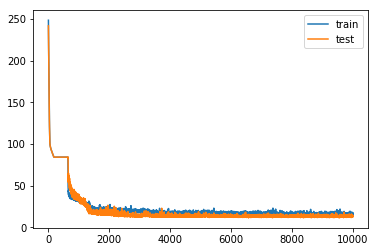

In [185]:
#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=10000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [186]:
yhat = model.predict(validateX)

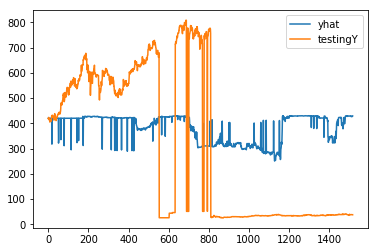

In [187]:
pyplot.plot(yhat.flatten(), label='yhat')
pyplot.plot(validateY.flatten(), label='testingY')
pyplot.legend()
pyplot.show()
#plt.axis([0,500,0,55000])

In [146]:
yhat

array([[28.342604],
       [28.682775],
       [28.342604],
       [28.342604],
       [28.342604],
       [28.342604],
       [28.342604],
       [28.342604],
       [28.34416 ],
       [28.342604],
       [28.342604],
       [28.342604],
       [28.342604],
       [28.342604],
       [28.342604],
       [28.342604],
       [28.342604],
       [28.342604],
       [28.342644],
       [28.342798],
       [28.343151],
       [28.342783],
       [28.343107],
       [28.34375 ],
       [28.337975],
       [28.336943],
       [28.343855],
       [28.342413],
       [28.334707],
       [28.337671],
       [28.331787],
       [28.328377],
       [28.323505],
       [28.332052],
       [28.346777],
       [28.333063],
       [28.333885],
       [28.338526],
       [28.346272],
       [28.340433],
       [28.33625 ],
       [28.333418],
       [28.347574],
       [28.347967],
       [28.34818 ],
       [28.34818 ],
       [28.348375],
       [28.34833 ],
       [28.348515],
       [28.347658],


In [147]:
initial_capital = 10000
growth = []
for i in range(len(yhat)):
    print(initial_capital)
    prediction = yhat[i]
    real_value = testingY[i]
    prediction2 = yhat[i + 1]
    real_value2 = testingY[i + 1]
    if prediction2 > prediction:
        initial_capital = initial_capital * (real_value2 / real_value)
    elif prediction2 < prediction:
        initial_capital = initial_capital * (real_value / real_value2)
    growth.append(initial_capital)

10000
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.73610555777

IndexError: index 845 is out of bounds for axis 0 with size 845

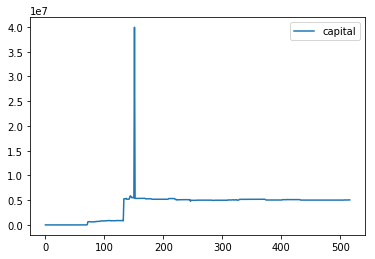

In [191]:
pyplot.plot(growth, label='capital')
pyplot.legend()
pyplot.show()

In [193]:
import numpy
numpy.savetxt("theYtests", validateY.flatten(), delimiter=",")
numpy.savetxt("theYhats", yhat.flatten(), delimiter=",")

In [284]:
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dropout(.5))
model.add(Dense(1))

Train on 1999 samples, validate on 1999 samples
Epoch 1/20000
 - 4s - loss: 37487.9763 - val_loss: 37485.3740
Epoch 2/20000
 - 0s - loss: 37479.2761 - val_loss: 37475.7800
Epoch 3/20000
 - 0s - loss: 37473.9212 - val_loss: 37471.9266
Epoch 4/20000
 - 0s - loss: 37470.1735 - val_loss: 37467.5917
Epoch 5/20000
 - 0s - loss: 37465.7087 - val_loss: 37462.2128
Epoch 6/20000
 - 0s - loss: 37459.9210 - val_loss: 37456.8197
Epoch 7/20000
 - 0s - loss: 37455.0788 - val_loss: 37453.1310
Epoch 8/20000
 - 0s - loss: 37451.4120 - val_loss: 37449.5650
Epoch 9/20000
 - 0s - loss: 37447.7443 - val_loss: 37446.0714
Epoch 10/20000
 - 0s - loss: 37444.4684 - val_loss: 37442.6528
Epoch 11/20000
 - 0s - loss: 37440.8582 - val_loss: 37439.2729
Epoch 12/20000
 - 0s - loss: 37437.5392 - val_loss: 37435.9288
Epoch 13/20000
 - 0s - loss: 37434.3339 - val_loss: 37432.6272
Epoch 14/20000
 - 0s - loss: 37431.0214 - val_loss: 37429.3454
Epoch 15/20000
 - 0s - loss: 37427.8480 - val_loss: 37426.0983
Epoch 16/20000
 

Epoch 130/20000
 - 0s - loss: 37073.1484 - val_loss: 37071.7289
Epoch 131/20000
 - 0s - loss: 37072.0330 - val_loss: 37068.6817
Epoch 132/20000
 - 0s - loss: 37066.8862 - val_loss: 37065.6198
Epoch 133/20000
 - 0s - loss: 37065.7418 - val_loss: 37062.5687
Epoch 134/20000
 - 0s - loss: 37060.6986 - val_loss: 37059.5104
Epoch 135/20000
 - 0s - loss: 37057.8250 - val_loss: 37056.4546
Epoch 136/20000
 - 0s - loss: 37055.9861 - val_loss: 37053.3998
Epoch 137/20000
 - 0s - loss: 37053.1489 - val_loss: 37050.3454
Epoch 138/20000
 - 0s - loss: 37049.7312 - val_loss: 37047.2949
Epoch 139/20000
 - 0s - loss: 37046.8640 - val_loss: 37044.2413
Epoch 140/20000
 - 0s - loss: 37043.0993 - val_loss: 37041.1854
Epoch 141/20000
 - 0s - loss: 37040.9295 - val_loss: 37038.1355
Epoch 142/20000
 - 0s - loss: 37036.6970 - val_loss: 37035.0759
Epoch 143/20000
 - 0s - loss: 37035.0851 - val_loss: 37032.0288
Epoch 144/20000
 - 0s - loss: 37028.8589 - val_loss: 37028.9585
Epoch 145/20000
 - 0s - loss: 37027.5647

 - 0s - loss: 36682.9404 - val_loss: 36680.4626
Epoch 259/20000
 - 0s - loss: 36679.4714 - val_loss: 36677.4085
Epoch 260/20000
 - 0s - loss: 36677.9575 - val_loss: 36674.3543
Epoch 261/20000
 - 0s - loss: 36673.0416 - val_loss: 36671.3030
Epoch 262/20000
 - 1s - loss: 36669.1563 - val_loss: 36668.2443
Epoch 263/20000
 - 0s - loss: 36664.2978 - val_loss: 36665.1784
Epoch 264/20000
 - 1s - loss: 36658.8225 - val_loss: 36662.1074
Epoch 265/20000
 - 0s - loss: 36663.2528 - val_loss: 36659.0567
Epoch 266/20000
 - 0s - loss: 36658.8734 - val_loss: 36656.0099
Epoch 267/20000
 - 0s - loss: 36651.9995 - val_loss: 36652.9455
Epoch 268/20000
 - 0s - loss: 36652.6304 - val_loss: 36649.8892
Epoch 269/20000
 - 0s - loss: 36647.0778 - val_loss: 36646.8302
Epoch 270/20000
 - 0s - loss: 36644.9149 - val_loss: 36643.7750
Epoch 271/20000
 - 0s - loss: 36644.8993 - val_loss: 36640.7283
Epoch 272/20000
 - 0s - loss: 36638.1006 - val_loss: 36637.6698
Epoch 273/20000
 - 0s - loss: 36634.6392 - val_loss: 366

Epoch 387/20000
 - 0s - loss: 36289.6349 - val_loss: 36286.2127
Epoch 388/20000
 - 0s - loss: 36284.5565 - val_loss: 36283.1548
Epoch 389/20000
 - 0s - loss: 36286.3841 - val_loss: 36280.1075
Epoch 390/20000
 - 0s - loss: 36283.5318 - val_loss: 36277.0607
Epoch 391/20000
 - 0s - loss: 36272.2140 - val_loss: 36274.0015
Epoch 392/20000
 - 0s - loss: 36270.4867 - val_loss: 36270.9387
Epoch 393/20000
 - 0s - loss: 36270.2990 - val_loss: 36267.8808
Epoch 394/20000
 - 0s - loss: 36268.8203 - val_loss: 36264.8269
Epoch 395/20000
 - 0s - loss: 36260.8803 - val_loss: 36261.7680
Epoch 396/20000
 - 0s - loss: 36258.8679 - val_loss: 36258.7092
Epoch 397/20000
 - 0s - loss: 36262.2897 - val_loss: 36255.6619
Epoch 398/20000
 - 0s - loss: 36255.9319 - val_loss: 36252.6075
Epoch 399/20000
 - 0s - loss: 36248.8073 - val_loss: 36249.5487
Epoch 400/20000
 - 0s - loss: 36253.9552 - val_loss: 36246.5009
Epoch 401/20000
 - 0s - loss: 36240.9796 - val_loss: 36243.4384
Epoch 402/20000
 - 0s - loss: 36242.0931

 - 0s - loss: 35893.4687 - val_loss: 35894.9865
Epoch 516/20000
 - 0s - loss: 35896.0877 - val_loss: 35891.9317
Epoch 517/20000
 - 1s - loss: 35887.6601 - val_loss: 35888.8737
Epoch 518/20000
 - 0s - loss: 35884.6844 - val_loss: 35885.8107
Epoch 519/20000
 - 0s - loss: 35882.9941 - val_loss: 35882.7557
Epoch 520/20000
 - 0s - loss: 35892.3273 - val_loss: 35879.7159
Epoch 521/20000
 - 0s - loss: 35877.5406 - val_loss: 35876.6620
Epoch 522/20000
 - 0s - loss: 35873.6037 - val_loss: 35873.6037
Epoch 523/20000
 - 0s - loss: 35870.7113 - val_loss: 35870.5486
Epoch 524/20000
 - 0s - loss: 35864.5037 - val_loss: 35867.4791
Epoch 525/20000
 - 0s - loss: 35865.0460 - val_loss: 35864.4198
Epoch 526/20000
 - 0s - loss: 35865.1034 - val_loss: 35861.3671
Epoch 527/20000
 - 0s - loss: 35855.9289 - val_loss: 35858.3072
Epoch 528/20000
 - 0s - loss: 35857.4670 - val_loss: 35855.2486
Epoch 529/20000
 - 0s - loss: 35857.2127 - val_loss: 35852.1977
Epoch 530/20000
 - 0s - loss: 35846.0613 - val_loss: 358

Epoch 644/20000
 - 0s - loss: 35499.2318 - val_loss: 35500.7444
Epoch 645/20000
 - 0s - loss: 35492.4298 - val_loss: 35497.6772
Epoch 646/20000
 - 0s - loss: 35499.3645 - val_loss: 35494.6238
Epoch 647/20000
 - 0s - loss: 35494.2533 - val_loss: 35491.5682
Epoch 648/20000
 - 0s - loss: 35493.3248 - val_loss: 35488.5175
Epoch 649/20000
 - 1s - loss: 35487.1809 - val_loss: 35485.4629
Epoch 650/20000
 - 1s - loss: 35480.9471 - val_loss: 35482.3997
Epoch 651/20000
 - 0s - loss: 35476.5228 - val_loss: 35479.3380
Epoch 652/20000
 - 1s - loss: 35486.6384 - val_loss: 35476.2909
Epoch 653/20000
 - 1s - loss: 35466.0583 - val_loss: 35473.2289
Epoch 654/20000
 - 1s - loss: 35475.3966 - val_loss: 35470.1745
Epoch 655/20000
 - 1s - loss: 35468.5250 - val_loss: 35467.1194
Epoch 656/20000
 - 0s - loss: 35462.7754 - val_loss: 35464.0569
Epoch 657/20000
 - 0s - loss: 35464.8282 - val_loss: 35461.0013
Epoch 658/20000
 - 0s - loss: 35452.7771 - val_loss: 35457.9392
Epoch 659/20000
 - 0s - loss: 35455.0398

 - 0s - loss: 35108.0281 - val_loss: 35109.5256
Epoch 773/20000
 - 0s - loss: 35109.9255 - val_loss: 35106.4644
Epoch 774/20000
 - 0s - loss: 35098.7488 - val_loss: 35103.4006
Epoch 775/20000
 - 0s - loss: 35107.1217 - val_loss: 35100.3533
Epoch 776/20000
 - 0s - loss: 35097.3111 - val_loss: 35097.2948
Epoch 777/20000
 - 1s - loss: 35094.8727 - val_loss: 35094.2367
Epoch 778/20000
 - 0s - loss: 35087.3801 - val_loss: 35091.1738
Epoch 779/20000
 - 1s - loss: 35089.9552 - val_loss: 35088.1192
Epoch 780/20000
 - 1s - loss: 35084.8922 - val_loss: 35085.0608
Epoch 781/20000
 - 1s - loss: 35087.3159 - val_loss: 35082.0097
Epoch 782/20000
 - 1s - loss: 35077.5488 - val_loss: 35078.9510
Epoch 783/20000
 - 1s - loss: 35078.9901 - val_loss: 35075.8925
Epoch 784/20000
 - 1s - loss: 35073.9500 - val_loss: 35072.8381
Epoch 785/20000
 - 1s - loss: 35072.3600 - val_loss: 35069.7830
Epoch 786/20000
 - 0s - loss: 35063.9907 - val_loss: 35066.7244
Epoch 787/20000
 - 0s - loss: 35069.9685 - val_loss: 350

Epoch 901/20000
 - 0s - loss: 34713.6073 - val_loss: 34715.2873
Epoch 902/20000
 - 0s - loss: 34709.8959 - val_loss: 34712.2290
Epoch 903/20000
 - 0s - loss: 34717.1216 - val_loss: 34709.1739
Epoch 904/20000
 - 1s - loss: 34714.4100 - val_loss: 34706.1241
Epoch 905/20000
 - 0s - loss: 34696.6520 - val_loss: 34703.0608
Epoch 906/20000
 - 0s - loss: 34698.5504 - val_loss: 34700.0012
Epoch 907/20000
 - 0s - loss: 34705.4376 - val_loss: 34696.9476
Epoch 908/20000
 - 0s - loss: 34700.8124 - val_loss: 34693.8958
Epoch 909/20000
 - 0s - loss: 34691.2030 - val_loss: 34690.8374
Epoch 910/20000
 - 0s - loss: 34682.5077 - val_loss: 34687.7759
Epoch 911/20000
 - 0s - loss: 34690.6325 - val_loss: 34684.7171
Epoch 912/20000
 - 0s - loss: 34678.0377 - val_loss: 34681.6587
Epoch 913/20000
 - 0s - loss: 34693.0418 - val_loss: 34678.6152
Epoch 914/20000
 - 0s - loss: 34681.1139 - val_loss: 34675.5607
Epoch 915/20000
 - 0s - loss: 34666.9139 - val_loss: 34672.4948
Epoch 916/20000
 - 0s - loss: 34659.4223

Epoch 1029/20000
 - 0s - loss: 34315.2526 - val_loss: 34324.1001
Epoch 1030/20000
 - 0s - loss: 34313.5287 - val_loss: 34321.0330
Epoch 1031/20000
 - 0s - loss: 34314.3710 - val_loss: 34317.9706
Epoch 1032/20000
 - 0s - loss: 34312.8608 - val_loss: 34314.9081
Epoch 1033/20000
 - 0s - loss: 34314.4517 - val_loss: 34311.8501
Epoch 1034/20000
 - 0s - loss: 34297.8077 - val_loss: 34308.7869
Epoch 1035/20000
 - 0s - loss: 34306.3972 - val_loss: 34305.7266
Epoch 1036/20000
 - 0s - loss: 34308.0153 - val_loss: 34302.6699
Epoch 1037/20000
 - 0s - loss: 34315.7532 - val_loss: 34299.6267
Epoch 1038/20000
 - 0s - loss: 34300.8309 - val_loss: 34296.5727
Epoch 1039/20000
 - 0s - loss: 34295.9305 - val_loss: 34293.5183
Epoch 1040/20000
 - 0s - loss: 34299.4867 - val_loss: 34290.4630
Epoch 1041/20000
 - 0s - loss: 34284.8046 - val_loss: 34287.4039
Epoch 1042/20000
 - 0s - loss: 34280.5802 - val_loss: 34284.3452
Epoch 1043/20000
 - 0s - loss: 34291.4958 - val_loss: 34281.2943
Epoch 1044/20000
 - 0s - 

 - 1s - loss: 33941.3505 - val_loss: 33938.9430
Epoch 1156/20000
 - 1s - loss: 33940.4640 - val_loss: 33935.8884
Epoch 1157/20000
 - 1s - loss: 33931.5731 - val_loss: 33932.8300
Epoch 1158/20000
 - 0s - loss: 33927.7343 - val_loss: 33929.7682
Epoch 1159/20000
 - 1s - loss: 33939.6362 - val_loss: 33926.7246
Epoch 1160/20000
 - 0s - loss: 33930.8455 - val_loss: 33923.6695
Epoch 1161/20000
 - 0s - loss: 33923.3511 - val_loss: 33920.6186
Epoch 1162/20000
 - 0s - loss: 33908.3007 - val_loss: 33917.5529
Epoch 1163/20000
 - 0s - loss: 33921.5981 - val_loss: 33914.4961
Epoch 1164/20000
 - 1s - loss: 33902.9224 - val_loss: 33911.4357
Epoch 1165/20000
 - 1s - loss: 33908.4286 - val_loss: 33908.3766
Epoch 1166/20000
 - 0s - loss: 33900.6980 - val_loss: 33905.3146
Epoch 1167/20000
 - 0s - loss: 33900.5456 - val_loss: 33902.2559
Epoch 1168/20000
 - 0s - loss: 33890.9156 - val_loss: 33899.1955
Epoch 1169/20000
 - 0s - loss: 33902.6692 - val_loss: 33896.1393
Epoch 1170/20000
 - 0s - loss: 33906.3759 

Epoch 1282/20000
 - 1s - loss: 33571.3142 - val_loss: 33550.8255
Epoch 1283/20000
 - 0s - loss: 33553.7561 - val_loss: 33547.7748
Epoch 1284/20000
 - 0s - loss: 33553.6296 - val_loss: 33544.7206
Epoch 1285/20000
 - 1s - loss: 33546.3423 - val_loss: 33541.6620
Epoch 1286/20000
 - 1s - loss: 33549.4910 - val_loss: 33538.6113
Epoch 1287/20000
 - 1s - loss: 33535.5341 - val_loss: 33535.5535
Epoch 1288/20000
 - 0s - loss: 33557.2984 - val_loss: 33532.5093
Epoch 1289/20000
 - 1s - loss: 33540.9460 - val_loss: 33529.4664
Epoch 1290/20000
 - 0s - loss: 33523.7893 - val_loss: 33526.4020
Epoch 1291/20000
 - 1s - loss: 33519.6361 - val_loss: 33523.3408
Epoch 1292/20000
 - 1s - loss: 33500.2815 - val_loss: 33520.2682
Epoch 1293/20000
 - 0s - loss: 33514.2248 - val_loss: 33517.2050
Epoch 1294/20000
 - 1s - loss: 33512.3790 - val_loss: 33514.1425
Epoch 1295/20000
 - 0s - loss: 33520.8635 - val_loss: 33511.0908
Epoch 1296/20000
 - 0s - loss: 33510.4280 - val_loss: 33508.0370
Epoch 1297/20000
 - 0s - 

 - 0s - loss: 33172.5087 - val_loss: 33165.7021
Epoch 1409/20000
 - 0s - loss: 33168.2225 - val_loss: 33162.6472
Epoch 1410/20000
 - 0s - loss: 33157.6927 - val_loss: 33159.5879
Epoch 1411/20000
 - 0s - loss: 33164.4618 - val_loss: 33156.5367
Epoch 1412/20000
 - 1s - loss: 33159.3173 - val_loss: 33153.4823
Epoch 1413/20000
 - 1s - loss: 33157.9897 - val_loss: 33150.4278
Epoch 1414/20000
 - 0s - loss: 33156.7434 - val_loss: 33147.3733
Epoch 1415/20000
 - 0s - loss: 33164.3869 - val_loss: 33144.3298
Epoch 1416/20000
 - 0s - loss: 33122.1755 - val_loss: 33141.2614
Epoch 1417/20000
 - 0s - loss: 33149.4072 - val_loss: 33138.2088
Epoch 1418/20000
 - 0s - loss: 33145.9689 - val_loss: 33135.1540
Epoch 1419/20000
 - 0s - loss: 33133.3292 - val_loss: 33132.0995
Epoch 1420/20000
 - 0s - loss: 33133.6546 - val_loss: 33129.0456
Epoch 1421/20000
 - 0s - loss: 33111.4341 - val_loss: 33125.9790
Epoch 1422/20000
 - 0s - loss: 33116.6357 - val_loss: 33122.9164
Epoch 1423/20000
 - 0s - loss: 33139.5970 

Epoch 1535/20000
 - 0s - loss: 32792.7539 - val_loss: 32777.5610
Epoch 1536/20000
 - 0s - loss: 32777.0112 - val_loss: 32774.5054
Epoch 1537/20000
 - 1s - loss: 32779.9530 - val_loss: 32771.4517
Epoch 1538/20000
 - 1s - loss: 32755.4802 - val_loss: 32768.3923
Epoch 1539/20000
 - 1s - loss: 32755.9359 - val_loss: 32765.3263
Epoch 1540/20000
 - 1s - loss: 32766.9215 - val_loss: 32762.2675
Epoch 1541/20000
 - 1s - loss: 32763.9696 - val_loss: 32759.2155
Epoch 1542/20000
 - 1s - loss: 32750.1091 - val_loss: 32756.1586
Epoch 1543/20000
 - 1s - loss: 32747.7002 - val_loss: 32753.0956
Epoch 1544/20000
 - 1s - loss: 32742.5180 - val_loss: 32750.0330
Epoch 1545/20000
 - 1s - loss: 32736.0013 - val_loss: 32746.9706
Epoch 1546/20000
 - 1s - loss: 32751.8659 - val_loss: 32743.9129
Epoch 1547/20000
 - 1s - loss: 32744.0558 - val_loss: 32740.8607
Epoch 1548/20000
 - 0s - loss: 32737.9196 - val_loss: 32737.8059
Epoch 1549/20000
 - 0s - loss: 32730.8218 - val_loss: 32734.7449
Epoch 1550/20000
 - 0s - 

 - 0s - loss: 32388.9081 - val_loss: 32392.4359
Epoch 1662/20000
 - 0s - loss: 32396.7228 - val_loss: 32389.3816
Epoch 1663/20000
 - 0s - loss: 32381.5902 - val_loss: 32386.3251
Epoch 1664/20000
 - 0s - loss: 32384.8398 - val_loss: 32383.2678
Epoch 1665/20000
 - 0s - loss: 32380.6700 - val_loss: 32380.2128
Epoch 1666/20000
 - 0s - loss: 32377.3563 - val_loss: 32377.1563
Epoch 1667/20000
 - 0s - loss: 32386.7888 - val_loss: 32374.1040
Epoch 1668/20000
 - 0s - loss: 32385.8946 - val_loss: 32371.0535
Epoch 1669/20000
 - 0s - loss: 32381.6842 - val_loss: 32368.0040
Epoch 1670/20000
 - 0s - loss: 32349.6808 - val_loss: 32364.9414
Epoch 1671/20000
 - 0s - loss: 32349.8319 - val_loss: 32361.8767
Epoch 1672/20000
 - 0s - loss: 32352.8506 - val_loss: 32358.8177
Epoch 1673/20000
 - 0s - loss: 32353.1696 - val_loss: 32355.7558
Epoch 1674/20000
 - 0s - loss: 32353.2491 - val_loss: 32352.6975
Epoch 1675/20000
 - 0s - loss: 32347.2220 - val_loss: 32349.6423
Epoch 1676/20000
 - 0s - loss: 32348.1448 

Epoch 1788/20000
 - 0s - loss: 32008.9835 - val_loss: 32004.2736
Epoch 1789/20000
 - 0s - loss: 32010.2161 - val_loss: 32001.2166
Epoch 1790/20000
 - 0s - loss: 31991.3838 - val_loss: 31998.1618
Epoch 1791/20000
 - 0s - loss: 32004.9129 - val_loss: 31995.1111
Epoch 1792/20000
 - 0s - loss: 31976.6863 - val_loss: 31992.0470
Epoch 1793/20000
 - 0s - loss: 32021.4542 - val_loss: 31989.0016
Epoch 1794/20000
 - 0s - loss: 31988.3534 - val_loss: 31985.9489
Epoch 1795/20000
 - 0s - loss: 31997.1306 - val_loss: 31982.8966
Epoch 1796/20000
 - 0s - loss: 31983.1420 - val_loss: 31979.8455
Epoch 1797/20000
 - 0s - loss: 31998.6056 - val_loss: 31976.7948
Epoch 1798/20000
 - 0s - loss: 31989.7317 - val_loss: 31973.7510
Epoch 1799/20000
 - 0s - loss: 31969.4280 - val_loss: 31970.6891
Epoch 1800/20000
 - 0s - loss: 31965.3166 - val_loss: 31967.6308
Epoch 1801/20000
 - 0s - loss: 31981.4083 - val_loss: 31964.5809
Epoch 1802/20000
 - 0s - loss: 31952.3726 - val_loss: 31961.5161
Epoch 1803/20000
 - 0s - 

 - 0s - loss: 31610.5735 - val_loss: 31619.1348
Epoch 1915/20000
 - 0s - loss: 31609.9221 - val_loss: 31616.0760
Epoch 1916/20000
 - 0s - loss: 31614.8780 - val_loss: 31613.0194
Epoch 1917/20000
 - 0s - loss: 31596.1953 - val_loss: 31609.9629
Epoch 1918/20000
 - 0s - loss: 31617.0044 - val_loss: 31606.9080
Epoch 1919/20000
 - 0s - loss: 31583.2241 - val_loss: 31603.8476
Epoch 1920/20000
 - 0s - loss: 31618.5136 - val_loss: 31600.7939
Epoch 1921/20000
 - 0s - loss: 31607.3566 - val_loss: 31597.7474
Epoch 1922/20000
 - 0s - loss: 31576.0171 - val_loss: 31594.6797
Epoch 1923/20000
 - 0s - loss: 31599.8898 - val_loss: 31591.6308
Epoch 1924/20000
 - 0s - loss: 31575.7055 - val_loss: 31588.5692
Epoch 1925/20000
 - 0s - loss: 31594.7344 - val_loss: 31585.5169
Epoch 1926/20000
 - 0s - loss: 31604.3104 - val_loss: 31582.4667
Epoch 1927/20000
 - 0s - loss: 31575.3012 - val_loss: 31579.4164
Epoch 1928/20000
 - 0s - loss: 31569.9880 - val_loss: 31576.3551
Epoch 1929/20000
 - 0s - loss: 31556.9174 

Epoch 2041/20000
 - 0s - loss: 31232.2144 - val_loss: 31231.0175
Epoch 2042/20000
 - 0s - loss: 31232.1912 - val_loss: 31227.9654
Epoch 2043/20000
 - 0s - loss: 31217.6371 - val_loss: 31224.9042
Epoch 2044/20000
 - 0s - loss: 31228.2897 - val_loss: 31221.8504
Epoch 2045/20000
 - 0s - loss: 31223.6298 - val_loss: 31218.7981
Epoch 2046/20000
 - 0s - loss: 31225.6718 - val_loss: 31215.7403
Epoch 2047/20000
 - 0s - loss: 31177.4900 - val_loss: 31212.6740
Epoch 2048/20000
 - 0s - loss: 31224.5701 - val_loss: 31209.6190
Epoch 2049/20000
 - 0s - loss: 31197.0037 - val_loss: 31206.5642
Epoch 2050/20000
 - 0s - loss: 31199.9237 - val_loss: 31203.5017
Epoch 2051/20000
 - 0s - loss: 31191.4685 - val_loss: 31200.4427
Epoch 2052/20000
 - 0s - loss: 31193.5442 - val_loss: 31197.3850
Epoch 2053/20000
 - 0s - loss: 31194.2618 - val_loss: 31194.3266
Epoch 2054/20000
 - 0s - loss: 31193.9818 - val_loss: 31191.2737
Epoch 2055/20000
 - 0s - loss: 31182.0015 - val_loss: 31188.2129
Epoch 2056/20000
 - 0s - 

 - 0s - loss: 30842.1851 - val_loss: 30845.9278
Epoch 2168/20000
 - 0s - loss: 30824.8102 - val_loss: 30842.8651
Epoch 2169/20000
 - 0s - loss: 30864.6782 - val_loss: 30839.8183
Epoch 2170/20000
 - 0s - loss: 30828.2138 - val_loss: 30836.7598
Epoch 2171/20000
 - 0s - loss: 30840.2600 - val_loss: 30833.7050
Epoch 2172/20000
 - 0s - loss: 30828.1312 - val_loss: 30830.6462
Epoch 2173/20000
 - 0s - loss: 30857.2524 - val_loss: 30827.5993
Epoch 2174/20000
 - 0s - loss: 30829.2148 - val_loss: 30824.5461
Epoch 2175/20000
 - 0s - loss: 30816.4553 - val_loss: 30821.4903
Epoch 2176/20000
 - 0s - loss: 30814.8120 - val_loss: 30818.4318
Epoch 2177/20000
 - 0s - loss: 30833.9323 - val_loss: 30815.3804
Epoch 2178/20000
 - 0s - loss: 30813.8137 - val_loss: 30812.3263
Epoch 2179/20000
 - 0s - loss: 30814.4141 - val_loss: 30809.2693
Epoch 2180/20000
 - 0s - loss: 30808.1848 - val_loss: 30806.2129
Epoch 2181/20000
 - 0s - loss: 30778.8882 - val_loss: 30803.1502
Epoch 2182/20000
 - 0s - loss: 30797.1665 

Epoch 2294/20000
 - 0s - loss: 30441.7035 - val_loss: 30457.7558
Epoch 2295/20000
 - 0s - loss: 30459.1730 - val_loss: 30454.7053
Epoch 2296/20000
 - 0s - loss: 30415.1465 - val_loss: 30451.6358
Epoch 2297/20000
 - 0s - loss: 30443.1131 - val_loss: 30448.5703
Epoch 2298/20000
 - 0s - loss: 30442.5058 - val_loss: 30445.5175
Epoch 2299/20000
 - 0s - loss: 30455.0714 - val_loss: 30442.4667
Epoch 2300/20000
 - 0s - loss: 30458.9357 - val_loss: 30439.4163
Epoch 2301/20000
 - 0s - loss: 30455.1504 - val_loss: 30436.3692
Epoch 2302/20000
 - 0s - loss: 30448.1986 - val_loss: 30433.3192
Epoch 2303/20000
 - 0s - loss: 30438.7523 - val_loss: 30430.2695
Epoch 2304/20000
 - 0s - loss: 30438.7759 - val_loss: 30427.2154
Epoch 2305/20000
 - 0s - loss: 30444.4213 - val_loss: 30424.1664
Epoch 2306/20000
 - 0s - loss: 30438.0892 - val_loss: 30421.1178
Epoch 2307/20000
 - 0s - loss: 30431.9160 - val_loss: 30418.0642
Epoch 2308/20000
 - 0s - loss: 30418.4504 - val_loss: 30415.0100
Epoch 2309/20000
 - 0s - 

 - 0s - loss: 30100.3323 - val_loss: 30072.7129
Epoch 2421/20000
 - 0s - loss: 30045.4678 - val_loss: 30069.6502
Epoch 2422/20000
 - 0s - loss: 30069.5038 - val_loss: 30066.5915
Epoch 2423/20000
 - 0s - loss: 30051.8963 - val_loss: 30063.5292
Epoch 2424/20000
 - 0s - loss: 30064.1579 - val_loss: 30060.4715
Epoch 2425/20000
 - 0s - loss: 30061.3204 - val_loss: 30057.4198
Epoch 2426/20000
 - 0s - loss: 30085.9501 - val_loss: 30054.3688
Epoch 2427/20000
 - 0s - loss: 30057.3675 - val_loss: 30051.3151
Epoch 2428/20000
 - 0s - loss: 29992.9676 - val_loss: 30048.2450
Epoch 2429/20000
 - 0s - loss: 30056.2497 - val_loss: 30045.1857
Epoch 2430/20000
 - 0s - loss: 30042.3681 - val_loss: 30042.1308
Epoch 2431/20000
 - 0s - loss: 30000.8499 - val_loss: 30039.0640
Epoch 2432/20000
 - 0s - loss: 30032.0555 - val_loss: 30036.0019
Epoch 2433/20000
 - 0s - loss: 30067.2098 - val_loss: 30032.9553
Epoch 2434/20000
 - 0s - loss: 30019.9690 - val_loss: 30029.9004
Epoch 2435/20000
 - 0s - loss: 30016.9910 

Epoch 2547/20000
 - 0s - loss: 29689.1516 - val_loss: 29684.5724
Epoch 2548/20000
 - 0s - loss: 29695.9500 - val_loss: 29681.5178
Epoch 2549/20000
 - 0s - loss: 29706.7807 - val_loss: 29678.4705
Epoch 2550/20000
 - 0s - loss: 29670.8953 - val_loss: 29675.4142
Epoch 2551/20000
 - 0s - loss: 29689.6433 - val_loss: 29672.3550
Epoch 2552/20000
 - 0s - loss: 29686.7000 - val_loss: 29669.3096
Epoch 2553/20000
 - 0s - loss: 29659.7046 - val_loss: 29666.2501
Epoch 2554/20000
 - 0s - loss: 29675.0346 - val_loss: 29663.1972
Epoch 2555/20000
 - 0s - loss: 29637.9770 - val_loss: 29660.1306
Epoch 2556/20000
 - 0s - loss: 29689.0157 - val_loss: 29657.0799
Epoch 2557/20000
 - 0s - loss: 29647.9306 - val_loss: 29654.0254
Epoch 2558/20000
 - 0s - loss: 29663.5436 - val_loss: 29650.9705
Epoch 2559/20000
 - 0s - loss: 29629.9542 - val_loss: 29647.9080
Epoch 2560/20000
 - 0s - loss: 29652.7584 - val_loss: 29644.8537
Epoch 2561/20000
 - 0s - loss: 29668.3124 - val_loss: 29641.7988
Epoch 2562/20000
 - 0s - 

 - 0s - loss: 29312.4577 - val_loss: 29299.4298
Epoch 2674/20000
 - 0s - loss: 29268.1672 - val_loss: 29296.3655
Epoch 2675/20000
 - 0s - loss: 29276.0267 - val_loss: 29293.3012
Epoch 2676/20000
 - 0s - loss: 29308.4796 - val_loss: 29290.2486
Epoch 2677/20000
 - 0s - loss: 29299.1343 - val_loss: 29287.2011
Epoch 2678/20000
 - 0s - loss: 29279.7313 - val_loss: 29284.1428
Epoch 2679/20000
 - 0s - loss: 29290.5061 - val_loss: 29281.0896
Epoch 2680/20000
 - 0s - loss: 29272.9428 - val_loss: 29278.0365
Epoch 2681/20000
 - 0s - loss: 29272.9701 - val_loss: 29274.9801
Epoch 2682/20000
 - 0s - loss: 29267.0774 - val_loss: 29271.9196
Epoch 2683/20000
 - 0s - loss: 29242.3372 - val_loss: 29268.8596
Epoch 2684/20000
 - 0s - loss: 29302.7589 - val_loss: 29265.8139
Epoch 2685/20000
 - 0s - loss: 29236.2980 - val_loss: 29262.7514
Epoch 2686/20000
 - 0s - loss: 29251.7419 - val_loss: 29259.6929
Epoch 2687/20000
 - 0s - loss: 29283.3144 - val_loss: 29256.6447
Epoch 2688/20000
 - 0s - loss: 29203.2797 

Epoch 2800/20000
 - 0s - loss: 28915.3178 - val_loss: 28911.2870
Epoch 2801/20000
 - 0s - loss: 28905.9011 - val_loss: 28908.2325
Epoch 2802/20000
 - 0s - loss: 28908.3217 - val_loss: 28905.1780
Epoch 2803/20000
 - 0s - loss: 28942.7012 - val_loss: 28902.1311
Epoch 2804/20000
 - 0s - loss: 28906.6551 - val_loss: 28899.0820
Epoch 2805/20000
 - 0s - loss: 28907.3640 - val_loss: 28896.0290
Epoch 2806/20000
 - 0s - loss: 28865.2778 - val_loss: 28892.9666
Epoch 2807/20000
 - 0s - loss: 28888.7412 - val_loss: 28889.9080
Epoch 2808/20000
 - 0s - loss: 28901.5888 - val_loss: 28886.8573
Epoch 2809/20000
 - 0s - loss: 28877.0217 - val_loss: 28883.7951
Epoch 2810/20000
 - 0s - loss: 28888.5900 - val_loss: 28880.7439
Epoch 2811/20000
 - 0s - loss: 28869.5692 - val_loss: 28877.6816
Epoch 2812/20000
 - 0s - loss: 28887.3329 - val_loss: 28874.6311
Epoch 2813/20000
 - 0s - loss: 28867.9613 - val_loss: 28871.5725
Epoch 2814/20000
 - 0s - loss: 28873.0717 - val_loss: 28868.5215
Epoch 2815/20000
 - 0s - 

 - 0s - loss: 28532.9775 - val_loss: 28526.2090
Epoch 2927/20000
 - 0s - loss: 28522.1383 - val_loss: 28523.1504
Epoch 2928/20000
 - 0s - loss: 28500.8347 - val_loss: 28520.0861
Epoch 2929/20000
 - 0s - loss: 28500.1723 - val_loss: 28517.0217
Epoch 2930/20000
 - 0s - loss: 28512.6906 - val_loss: 28513.9664
Epoch 2931/20000
 - 0s - loss: 28516.1996 - val_loss: 28510.9143
Epoch 2932/20000
 - 0s - loss: 28496.3784 - val_loss: 28507.8490
Epoch 2933/20000
 - 0s - loss: 28502.3652 - val_loss: 28504.7987
Epoch 2934/20000
 - 1s - loss: 28484.5064 - val_loss: 28501.7361
Epoch 2935/20000
 - 0s - loss: 28466.6965 - val_loss: 28498.6698
Epoch 2936/20000
 - 1s - loss: 28515.7561 - val_loss: 28495.6153
Epoch 2937/20000
 - 0s - loss: 28505.1242 - val_loss: 28492.5679
Epoch 2938/20000
 - 0s - loss: 28492.3188 - val_loss: 28489.5115
Epoch 2939/20000
 - 0s - loss: 28493.3661 - val_loss: 28486.4549
Epoch 2940/20000
 - 0s - loss: 28461.8725 - val_loss: 28483.3947
Epoch 2941/20000
 - 1s - loss: 28511.8747 

Epoch 3053/20000
 - 0s - loss: 28192.7155 - val_loss: 28138.0799
Epoch 3054/20000
 - 0s - loss: 28149.3537 - val_loss: 28135.0197
Epoch 3055/20000
 - 0s - loss: 28146.4619 - val_loss: 28131.9740
Epoch 3056/20000
 - 0s - loss: 28130.0234 - val_loss: 28128.9143
Epoch 3057/20000
 - 0s - loss: 28113.8282 - val_loss: 28125.8549
Epoch 3058/20000
 - 0s - loss: 28098.2919 - val_loss: 28122.7868
Epoch 3059/20000
 - 0s - loss: 28127.3157 - val_loss: 28119.7286
Epoch 3060/20000
 - 1s - loss: 28126.0976 - val_loss: 28116.6778
Epoch 3061/20000
 - 0s - loss: 28116.1236 - val_loss: 28113.6171
Epoch 3062/20000
 - 0s - loss: 28113.9756 - val_loss: 28110.5606
Epoch 3063/20000
 - 0s - loss: 28112.8610 - val_loss: 28107.5077
Epoch 3064/20000
 - 1s - loss: 28127.2509 - val_loss: 28104.4587
Epoch 3065/20000
 - 0s - loss: 28110.1961 - val_loss: 28101.4043
Epoch 3066/20000
 - 0s - loss: 28125.5963 - val_loss: 28098.3571
Epoch 3067/20000
 - 0s - loss: 28104.1123 - val_loss: 28095.2990
Epoch 3068/20000
 - 1s - 

 - 1s - loss: 27717.5255 - val_loss: 27752.9510
Epoch 3180/20000
 - 0s - loss: 27731.5357 - val_loss: 27749.8845
Epoch 3181/20000
 - 1s - loss: 27735.5163 - val_loss: 27746.8265
Epoch 3182/20000
 - 1s - loss: 27726.7757 - val_loss: 27743.7634
Epoch 3183/20000
 - 1s - loss: 27739.3885 - val_loss: 27740.7071
Epoch 3184/20000
 - 1s - loss: 27750.9585 - val_loss: 27737.6543
Epoch 3185/20000
 - 1s - loss: 27731.3682 - val_loss: 27734.5990
Epoch 3186/20000
 - 1s - loss: 27745.4441 - val_loss: 27731.5448
Epoch 3187/20000
 - 1s - loss: 27708.7748 - val_loss: 27728.4862
Epoch 3188/20000
 - 1s - loss: 27741.0796 - val_loss: 27725.4317
Epoch 3189/20000
 - 1s - loss: 27695.2106 - val_loss: 27722.3692
Epoch 3190/20000
 - 0s - loss: 27727.8399 - val_loss: 27719.3142
Epoch 3191/20000
 - 1s - loss: 27746.3012 - val_loss: 27716.2674
Epoch 3192/20000
 - 1s - loss: 27706.3811 - val_loss: 27713.2091
Epoch 3193/20000
 - 1s - loss: 27715.7778 - val_loss: 27710.1544
Epoch 3194/20000
 - 0s - loss: 27730.8713 

Epoch 3306/20000
 - 0s - loss: 27426.4293 - val_loss: 27364.8029
Epoch 3307/20000
 - 0s - loss: 27380.2242 - val_loss: 27361.7559
Epoch 3308/20000
 - 0s - loss: 27386.2497 - val_loss: 27358.7049
Epoch 3309/20000
 - 0s - loss: 27310.4934 - val_loss: 27355.6365
Epoch 3310/20000
 - 0s - loss: 27343.1475 - val_loss: 27352.5686
Epoch 3311/20000
 - 1s - loss: 27365.5085 - val_loss: 27349.5174
Epoch 3312/20000
 - 1s - loss: 27337.4019 - val_loss: 27346.4591
Epoch 3313/20000
 - 0s - loss: 27346.8664 - val_loss: 27343.4042
Epoch 3314/20000
 - 0s - loss: 27286.5031 - val_loss: 27340.3359
Epoch 3315/20000
 - 0s - loss: 27375.3255 - val_loss: 27337.2829
Epoch 3316/20000
 - 0s - loss: 27353.3524 - val_loss: 27334.2346
Epoch 3317/20000
 - 0s - loss: 27340.8663 - val_loss: 27331.1739
Epoch 3318/20000
 - 0s - loss: 27308.1040 - val_loss: 27328.1170
Epoch 3319/20000
 - 0s - loss: 27377.3995 - val_loss: 27325.0646
Epoch 3320/20000
 - 1s - loss: 27363.7494 - val_loss: 27322.0251
Epoch 3321/20000
 - 1s - 

 - 1s - loss: 27020.4437 - val_loss: 26979.6563
Epoch 3433/20000
 - 1s - loss: 26967.6849 - val_loss: 26976.5993
Epoch 3434/20000
 - 0s - loss: 26938.7582 - val_loss: 26973.5349
Epoch 3435/20000
 - 1s - loss: 27004.6693 - val_loss: 26970.4822
Epoch 3436/20000
 - 0s - loss: 26994.0163 - val_loss: 26967.4359
Epoch 3437/20000
 - 1s - loss: 26957.4379 - val_loss: 26964.3809
Epoch 3438/20000
 - 0s - loss: 26939.7003 - val_loss: 26961.3165
Epoch 3439/20000
 - 1s - loss: 26963.3421 - val_loss: 26958.2601
Epoch 3440/20000
 - 0s - loss: 26927.0326 - val_loss: 26955.1975
Epoch 3441/20000
 - 0s - loss: 26939.9671 - val_loss: 26952.1351
Epoch 3442/20000
 - 0s - loss: 26898.9216 - val_loss: 26949.0665
Epoch 3443/20000
 - 0s - loss: 26967.4597 - val_loss: 26946.0141
Epoch 3444/20000
 - 0s - loss: 26947.9753 - val_loss: 26942.9590
Epoch 3445/20000
 - 0s - loss: 26936.2662 - val_loss: 26939.9005
Epoch 3446/20000
 - 0s - loss: 26954.0189 - val_loss: 26936.8494
Epoch 3447/20000
 - 0s - loss: 26941.1903 

Epoch 3559/20000
 - 1s - loss: 26612.6497 - val_loss: 26591.4982
Epoch 3560/20000
 - 1s - loss: 26541.5559 - val_loss: 26588.4316
Epoch 3561/20000
 - 0s - loss: 26605.6639 - val_loss: 26585.3712
Epoch 3562/20000
 - 0s - loss: 26579.0211 - val_loss: 26582.3142
Epoch 3563/20000
 - 0s - loss: 26587.9167 - val_loss: 26579.2599
Epoch 3564/20000
 - 0s - loss: 26576.9113 - val_loss: 26576.2051
Epoch 3565/20000
 - 0s - loss: 26504.2332 - val_loss: 26573.1347
Epoch 3566/20000
 - 0s - loss: 26583.9315 - val_loss: 26570.0760
Epoch 3567/20000
 - 0s - loss: 26601.1424 - val_loss: 26567.0274
Epoch 3568/20000
 - 0s - loss: 26580.3298 - val_loss: 26563.9744
Epoch 3569/20000
 - 0s - loss: 26591.4143 - val_loss: 26560.9239
Epoch 3570/20000
 - 0s - loss: 26550.4765 - val_loss: 26557.8670
Epoch 3571/20000
 - 0s - loss: 26595.5876 - val_loss: 26554.8183
Epoch 3572/20000
 - 0s - loss: 26550.7476 - val_loss: 26551.7601
Epoch 3573/20000
 - 0s - loss: 26543.2407 - val_loss: 26548.7010
Epoch 3574/20000
 - 0s - 

 - 0s - loss: 26219.2514 - val_loss: 26206.3186
Epoch 3686/20000
 - 1s - loss: 26209.6069 - val_loss: 26203.2660
Epoch 3687/20000
 - 0s - loss: 26239.3096 - val_loss: 26200.2171
Epoch 3688/20000
 - 1s - loss: 26221.3796 - val_loss: 26197.1663
Epoch 3689/20000
 - 0s - loss: 26195.1370 - val_loss: 26194.1150
Epoch 3690/20000
 - 0s - loss: 26167.9739 - val_loss: 26191.0487
Epoch 3691/20000
 - 0s - loss: 26167.0248 - val_loss: 26187.9860
Epoch 3692/20000
 - 0s - loss: 26178.6662 - val_loss: 26184.9313
Epoch 3693/20000
 - 1s - loss: 26188.6804 - val_loss: 26181.8731
Epoch 3694/20000
 - 0s - loss: 26196.7999 - val_loss: 26178.8200
Epoch 3695/20000
 - 0s - loss: 26166.0534 - val_loss: 26175.7660
Epoch 3696/20000
 - 0s - loss: 26193.2508 - val_loss: 26172.7068
Epoch 3697/20000
 - 0s - loss: 26191.2361 - val_loss: 26169.6580
Epoch 3698/20000
 - 0s - loss: 26153.2097 - val_loss: 26166.5996
Epoch 3699/20000
 - 0s - loss: 26170.5797 - val_loss: 26163.5449
Epoch 3700/20000
 - 0s - loss: 26173.4594 

Epoch 3812/20000
 - 1s - loss: 25805.8082 - val_loss: 25818.1775
Epoch 3813/20000
 - 1s - loss: 25773.5760 - val_loss: 25815.1112
Epoch 3814/20000
 - 1s - loss: 25822.1649 - val_loss: 25812.0508
Epoch 3815/20000
 - 0s - loss: 25800.5261 - val_loss: 25808.9942
Epoch 3816/20000
 - 1s - loss: 25826.8880 - val_loss: 25805.9398
Epoch 3817/20000
 - 1s - loss: 25788.4184 - val_loss: 25802.8847
Epoch 3818/20000
 - 0s - loss: 25792.9599 - val_loss: 25799.8243
Epoch 3819/20000
 - 0s - loss: 25804.7816 - val_loss: 25796.7674
Epoch 3820/20000
 - 0s - loss: 25780.2520 - val_loss: 25793.7049
Epoch 3821/20000
 - 0s - loss: 25768.7671 - val_loss: 25790.6462
Epoch 3822/20000
 - 0s - loss: 25797.2539 - val_loss: 25787.5858
Epoch 3823/20000
 - 0s - loss: 25755.1461 - val_loss: 25784.5251
Epoch 3824/20000
 - 0s - loss: 25807.1820 - val_loss: 25781.4707
Epoch 3825/20000
 - 0s - loss: 25791.2019 - val_loss: 25778.4197
Epoch 3826/20000
 - 0s - loss: 25785.0163 - val_loss: 25775.3612
Epoch 3827/20000
 - 1s - 

 - 1s - loss: 25402.8308 - val_loss: 25433.0331
Epoch 3939/20000
 - 1s - loss: 25461.7903 - val_loss: 25429.9805
Epoch 3940/20000
 - 0s - loss: 25422.6507 - val_loss: 25426.9199
Epoch 3941/20000
 - 0s - loss: 25438.6499 - val_loss: 25423.8689
Epoch 3942/20000
 - 1s - loss: 25410.4711 - val_loss: 25420.8127
Epoch 3943/20000
 - 0s - loss: 25440.7828 - val_loss: 25417.7560
Epoch 3944/20000
 - 0s - loss: 25414.4609 - val_loss: 25414.6977
Epoch 3945/20000
 - 0s - loss: 25409.8647 - val_loss: 25411.6424
Epoch 3946/20000
 - 0s - loss: 25427.7987 - val_loss: 25408.5901
Epoch 3947/20000
 - 0s - loss: 25356.9694 - val_loss: 25405.5250
Epoch 3948/20000
 - 0s - loss: 25389.9290 - val_loss: 25402.4591
Epoch 3949/20000
 - 0s - loss: 25418.5140 - val_loss: 25399.4047
Epoch 3950/20000
 - 0s - loss: 25396.1217 - val_loss: 25396.3495
Epoch 3951/20000
 - 0s - loss: 25365.9726 - val_loss: 25393.2868
Epoch 3952/20000
 - 0s - loss: 25381.2930 - val_loss: 25390.2289
Epoch 3953/20000
 - 1s - loss: 25355.9912 

Epoch 4065/20000
 - 1s - loss: 25036.4260 - val_loss: 25044.8105
Epoch 4066/20000
 - 1s - loss: 25084.3674 - val_loss: 25041.7636
Epoch 4067/20000
 - 1s - loss: 25003.1449 - val_loss: 25038.7034
Epoch 4068/20000
 - 1s - loss: 25067.3296 - val_loss: 25035.6465
Epoch 4069/20000
 - 0s - loss: 25034.0485 - val_loss: 25032.5935
Epoch 4070/20000
 - 0s - loss: 25061.7343 - val_loss: 25029.5449
Epoch 4071/20000
 - 1s - loss: 24992.7501 - val_loss: 25026.4862
Epoch 4072/20000
 - 1s - loss: 25035.3227 - val_loss: 25023.4275
Epoch 4073/20000
 - 0s - loss: 25038.9419 - val_loss: 25020.3732
Epoch 4074/20000
 - 1s - loss: 25019.6097 - val_loss: 25017.3202
Epoch 4075/20000
 - 0s - loss: 24951.1697 - val_loss: 25014.2522
Epoch 4076/20000
 - 0s - loss: 25071.0320 - val_loss: 25011.1994
Epoch 4077/20000
 - 0s - loss: 24993.8157 - val_loss: 25008.1430
Epoch 4078/20000
 - 0s - loss: 25001.5973 - val_loss: 25005.0917
Epoch 4079/20000
 - 1s - loss: 24967.7064 - val_loss: 25002.0250
Epoch 4080/20000
 - 1s - 

 - 0s - loss: 24609.3254 - val_loss: 24659.6837
Epoch 4192/20000
 - 0s - loss: 24643.4896 - val_loss: 24656.6254
Epoch 4193/20000
 - 1s - loss: 24652.1091 - val_loss: 24653.5701
Epoch 4194/20000
 - 0s - loss: 24688.4633 - val_loss: 24650.5232
Epoch 4195/20000
 - 0s - loss: 24605.0467 - val_loss: 24647.4607
Epoch 4196/20000
 - 0s - loss: 24616.0217 - val_loss: 24644.3963
Epoch 4197/20000
 - 0s - loss: 24596.9900 - val_loss: 24641.3339
Epoch 4198/20000
 - 0s - loss: 24629.0483 - val_loss: 24638.2732
Epoch 4199/20000
 - 0s - loss: 24633.7519 - val_loss: 24635.2149
Epoch 4200/20000
 - 0s - loss: 24607.5885 - val_loss: 24632.1581
Epoch 4201/20000
 - 0s - loss: 24597.7771 - val_loss: 24629.0936
Epoch 4202/20000
 - 0s - loss: 24674.9913 - val_loss: 24626.0471
Epoch 4203/20000
 - 0s - loss: 24632.5665 - val_loss: 24622.9943
Epoch 4204/20000
 - 0s - loss: 24620.1077 - val_loss: 24619.9355
Epoch 4205/20000
 - 0s - loss: 24636.3853 - val_loss: 24616.8826
Epoch 4206/20000
 - 0s - loss: 24557.9497 

Epoch 4318/20000
 - 0s - loss: 24266.6329 - val_loss: 24271.4671
Epoch 4319/20000
 - 0s - loss: 24304.9633 - val_loss: 24268.4203
Epoch 4320/20000
 - 0s - loss: 24220.4359 - val_loss: 24265.3574
Epoch 4321/20000
 - 0s - loss: 24281.7616 - val_loss: 24262.3046
Epoch 4322/20000
 - 0s - loss: 24240.4511 - val_loss: 24259.2462
Epoch 4323/20000
 - 0s - loss: 24323.9889 - val_loss: 24256.2012
Epoch 4324/20000
 - 0s - loss: 24273.4123 - val_loss: 24253.1502
Epoch 4325/20000
 - 0s - loss: 24218.7228 - val_loss: 24250.0919
Epoch 4326/20000
 - 0s - loss: 24247.4310 - val_loss: 24247.0332
Epoch 4327/20000
 - 0s - loss: 24263.1922 - val_loss: 24243.9762
Epoch 4328/20000
 - 0s - loss: 24276.2636 - val_loss: 24240.9315
Epoch 4329/20000
 - 0s - loss: 24255.5386 - val_loss: 24237.8805
Epoch 4330/20000
 - 0s - loss: 24239.3962 - val_loss: 24234.8201
Epoch 4331/20000
 - 0s - loss: 24233.4536 - val_loss: 24231.7662
Epoch 4332/20000
 - 0s - loss: 24210.5108 - val_loss: 24228.7053
Epoch 4333/20000
 - 0s - 

 - 0s - loss: 23849.4995 - val_loss: 23886.3451
Epoch 4445/20000
 - 0s - loss: 23963.7163 - val_loss: 23883.2986
Epoch 4446/20000
 - 0s - loss: 23855.0437 - val_loss: 23880.2441
Epoch 4447/20000
 - 0s - loss: 23880.0908 - val_loss: 23877.1858
Epoch 4448/20000
 - 0s - loss: 23870.4497 - val_loss: 23874.1289
Epoch 4449/20000
 - 0s - loss: 23826.6362 - val_loss: 23871.0608
Epoch 4450/20000
 - 0s - loss: 23870.9246 - val_loss: 23868.0039
Epoch 4451/20000
 - 0s - loss: 23881.1795 - val_loss: 23864.9535
Epoch 4452/20000
 - 0s - loss: 23899.2716 - val_loss: 23861.8980
Epoch 4453/20000
 - 0s - loss: 23813.5694 - val_loss: 23858.8399
Epoch 4454/20000
 - 0s - loss: 23858.0247 - val_loss: 23855.7795
Epoch 4455/20000
 - 0s - loss: 23869.3632 - val_loss: 23852.7243
Epoch 4456/20000
 - 0s - loss: 23841.8046 - val_loss: 23849.6703
Epoch 4457/20000
 - 0s - loss: 23811.9367 - val_loss: 23846.6037
Epoch 4458/20000
 - 0s - loss: 23859.9458 - val_loss: 23843.5525
Epoch 4459/20000
 - 0s - loss: 23861.4557 

Epoch 4571/20000
 - 0s - loss: 23473.9256 - val_loss: 23498.1932
Epoch 4572/20000
 - 0s - loss: 23464.7819 - val_loss: 23495.1310
Epoch 4573/20000
 - 0s - loss: 23493.9115 - val_loss: 23492.0726
Epoch 4574/20000
 - 0s - loss: 23511.8170 - val_loss: 23489.0212
Epoch 4575/20000
 - 0s - loss: 23420.4360 - val_loss: 23485.9588
Epoch 4576/20000
 - 0s - loss: 23518.0788 - val_loss: 23482.9065
Epoch 4577/20000
 - 0s - loss: 23533.0126 - val_loss: 23479.8572
Epoch 4578/20000
 - 0s - loss: 23485.4312 - val_loss: 23476.8046
Epoch 4579/20000
 - 0s - loss: 23491.2347 - val_loss: 23473.7522
Epoch 4580/20000
 - 0s - loss: 23530.5248 - val_loss: 23470.7034
Epoch 4581/20000
 - 0s - loss: 23488.4653 - val_loss: 23467.6502
Epoch 4582/20000
 - 0s - loss: 23451.7526 - val_loss: 23464.5855
Epoch 4583/20000
 - 0s - loss: 23471.9694 - val_loss: 23461.5331
Epoch 4584/20000
 - 0s - loss: 23481.8030 - val_loss: 23458.4804
Epoch 4585/20000
 - 0s - loss: 23479.2976 - val_loss: 23455.4275
Epoch 4586/20000
 - 0s - 

 - 0s - loss: 23100.5228 - val_loss: 23113.1369
Epoch 4698/20000
 - 0s - loss: 23139.9027 - val_loss: 23110.0802
Epoch 4699/20000
 - 0s - loss: 23100.1725 - val_loss: 23107.0251
Epoch 4700/20000
 - 0s - loss: 23074.9680 - val_loss: 23103.9626
Epoch 4701/20000
 - 0s - loss: 23121.9391 - val_loss: 23100.9003
Epoch 4702/20000
 - 0s - loss: 23086.1828 - val_loss: 23097.8452
Epoch 4703/20000
 - 0s - loss: 23098.7764 - val_loss: 23094.7864
Epoch 4704/20000
 - 0s - loss: 23038.2586 - val_loss: 23091.7205
Epoch 4705/20000
 - 0s - loss: 23089.3901 - val_loss: 23088.6578
Epoch 4706/20000
 - 0s - loss: 23086.0385 - val_loss: 23085.5994
Epoch 4707/20000
 - 0s - loss: 23089.0792 - val_loss: 23082.5448
Epoch 4708/20000
 - 1s - loss: 23121.7712 - val_loss: 23079.4904
Epoch 4709/20000
 - 0s - loss: 23049.6842 - val_loss: 23076.4315
Epoch 4710/20000
 - 0s - loss: 23016.0195 - val_loss: 23073.3633
Epoch 4711/20000
 - 0s - loss: 23102.4763 - val_loss: 23070.3104
Epoch 4712/20000
 - 0s - loss: 23086.0609 

Epoch 4824/20000
 - 0s - loss: 22749.6401 - val_loss: 22724.9430
Epoch 4825/20000
 - 0s - loss: 22732.5013 - val_loss: 22721.8888
Epoch 4826/20000
 - 0s - loss: 22715.1362 - val_loss: 22718.8302
Epoch 4827/20000
 - 0s - loss: 22702.9014 - val_loss: 22715.7714
Epoch 4828/20000
 - 0s - loss: 22728.0646 - val_loss: 22712.7245
Epoch 4829/20000
 - 0s - loss: 22720.0146 - val_loss: 22709.6698
Epoch 4830/20000
 - 0s - loss: 22717.6610 - val_loss: 22706.6171
Epoch 4831/20000
 - 0s - loss: 22751.0166 - val_loss: 22703.5649
Epoch 4832/20000
 - 0s - loss: 22670.2823 - val_loss: 22700.5179
Epoch 4833/20000
 - 0s - loss: 22678.5556 - val_loss: 22697.4587
Epoch 4834/20000
 - 0s - loss: 22708.3275 - val_loss: 22694.4045
Epoch 4835/20000
 - 0s - loss: 22707.5195 - val_loss: 22691.3494
Epoch 4836/20000
 - 0s - loss: 22684.3973 - val_loss: 22688.2948
Epoch 4837/20000
 - 0s - loss: 22722.3406 - val_loss: 22685.2505
Epoch 4838/20000
 - 0s - loss: 22665.0690 - val_loss: 22682.1837
Epoch 4839/20000
 - 0s - 

 - 0s - loss: 22355.3289 - val_loss: 22339.9510
Epoch 4951/20000
 - 0s - loss: 22354.4706 - val_loss: 22336.8930
Epoch 4952/20000
 - 0s - loss: 22358.0496 - val_loss: 22333.8438
Epoch 4953/20000
 - 0s - loss: 22346.5218 - val_loss: 22330.7952
Epoch 4954/20000
 - 0s - loss: 22352.8659 - val_loss: 22327.7440
Epoch 4955/20000
 - 0s - loss: 22307.4129 - val_loss: 22324.6852
Epoch 4956/20000
 - 0s - loss: 22336.2248 - val_loss: 22321.6232
Epoch 4957/20000
 - 0s - loss: 22348.8810 - val_loss: 22318.5647
Epoch 4958/20000
 - 0s - loss: 22311.5417 - val_loss: 22315.5058
Epoch 4959/20000
 - 0s - loss: 22284.1757 - val_loss: 22312.4451
Epoch 4960/20000
 - 0s - loss: 22350.9596 - val_loss: 22309.3890
Epoch 4961/20000
 - 0s - loss: 22353.1627 - val_loss: 22306.3340
Epoch 4962/20000
 - 0s - loss: 22359.0119 - val_loss: 22303.2867
Epoch 4963/20000
 - 0s - loss: 22296.0386 - val_loss: 22300.2284
Epoch 4964/20000
 - 0s - loss: 22287.4370 - val_loss: 22297.1738
Epoch 4965/20000
 - 0s - loss: 22296.5356 

Epoch 5077/20000
 - 0s - loss: 22006.2078 - val_loss: 21951.9044
Epoch 5078/20000
 - 0s - loss: 21926.0163 - val_loss: 21948.8418
Epoch 5079/20000
 - 0s - loss: 22022.8886 - val_loss: 21945.7930
Epoch 5080/20000
 - 0s - loss: 22020.0373 - val_loss: 21942.7482
Epoch 5081/20000
 - 0s - loss: 21973.0758 - val_loss: 21939.6951
Epoch 5082/20000
 - 0s - loss: 21954.2523 - val_loss: 21936.6498
Epoch 5083/20000
 - 0s - loss: 21932.7638 - val_loss: 21933.5956
Epoch 5084/20000
 - 0s - loss: 21920.8091 - val_loss: 21930.5526
Epoch 5085/20000
 - 0s - loss: 21911.0215 - val_loss: 21927.4944
Epoch 5086/20000
 - 0s - loss: 21947.4644 - val_loss: 21924.4399
Epoch 5087/20000
 - 0s - loss: 21920.2320 - val_loss: 21921.3791
Epoch 5088/20000
 - 0s - loss: 21946.4044 - val_loss: 21918.3229
Epoch 5089/20000
 - 0s - loss: 21896.2186 - val_loss: 21915.2637
Epoch 5090/20000
 - 0s - loss: 21899.0008 - val_loss: 21912.1979
Epoch 5091/20000
 - 0s - loss: 21932.0968 - val_loss: 21909.1349
Epoch 5092/20000
 - 0s - 

 - 0s - loss: 21540.3039 - val_loss: 21566.9064
Epoch 5204/20000
 - 0s - loss: 21577.7939 - val_loss: 21563.8613
Epoch 5205/20000
 - 0s - loss: 21570.8880 - val_loss: 21560.8102
Epoch 5206/20000
 - 0s - loss: 21506.3354 - val_loss: 21557.7558
Epoch 5207/20000
 - 0s - loss: 21527.2143 - val_loss: 21554.6915
Epoch 5208/20000
 - 0s - loss: 21578.4734 - val_loss: 21551.6463
Epoch 5209/20000
 - 0s - loss: 21503.4396 - val_loss: 21548.5838
Epoch 5210/20000
 - 0s - loss: 21566.9030 - val_loss: 21545.5250
Epoch 5211/20000
 - 0s - loss: 21539.8375 - val_loss: 21542.4709
Epoch 5212/20000
 - 0s - loss: 21576.1575 - val_loss: 21539.4237
Epoch 5213/20000
 - 0s - loss: 21583.0445 - val_loss: 21536.3770
Epoch 5214/20000
 - 0s - loss: 21524.0976 - val_loss: 21533.3245
Epoch 5215/20000
 - 0s - loss: 21552.2319 - val_loss: 21530.2680
Epoch 5216/20000
 - 0s - loss: 21551.8148 - val_loss: 21527.2166
Epoch 5217/20000
 - 0s - loss: 21527.6751 - val_loss: 21524.1578
Epoch 5218/20000
 - 0s - loss: 21496.7177 

Epoch 5330/20000
 - 0s - loss: 21188.9676 - val_loss: 21179.1096
Epoch 5331/20000
 - 0s - loss: 21205.2484 - val_loss: 21176.0665
Epoch 5332/20000
 - 0s - loss: 21154.6192 - val_loss: 21173.0077
Epoch 5333/20000
 - 0s - loss: 21247.1466 - val_loss: 21169.9628
Epoch 5334/20000
 - 0s - loss: 21186.3979 - val_loss: 21166.9044
Epoch 5335/20000
 - 0s - loss: 21187.4295 - val_loss: 21163.8596
Epoch 5336/20000
 - 0s - loss: 21172.5607 - val_loss: 21160.7953
Epoch 5337/20000
 - 0s - loss: 21108.8155 - val_loss: 21157.7440
Epoch 5338/20000
 - 0s - loss: 21100.8468 - val_loss: 21154.6639
Epoch 5339/20000
 - 0s - loss: 21184.7935 - val_loss: 21151.6229
Epoch 5340/20000
 - 0s - loss: 21137.2582 - val_loss: 21148.5701
Epoch 5341/20000
 - 0s - loss: 21181.8621 - val_loss: 21145.5137
Epoch 5342/20000
 - 0s - loss: 21147.9745 - val_loss: 21142.4666
Epoch 5343/20000
 - 0s - loss: 21151.0403 - val_loss: 21139.4099
Epoch 5344/20000
 - 0s - loss: 21125.6565 - val_loss: 21136.3615
Epoch 5345/20000
 - 0s - 

 - 0s - loss: 20798.0257 - val_loss: 20794.5314
Epoch 5457/20000
 - 0s - loss: 20798.8158 - val_loss: 20791.4804
Epoch 5458/20000
 - 0s - loss: 20841.3422 - val_loss: 20788.4336
Epoch 5459/20000
 - 0s - loss: 20822.1143 - val_loss: 20785.3908
Epoch 5460/20000
 - 0s - loss: 20791.3390 - val_loss: 20782.3418
Epoch 5461/20000
 - 0s - loss: 20786.1870 - val_loss: 20779.2889
Epoch 5462/20000
 - 0s - loss: 20790.4321 - val_loss: 20776.2324
Epoch 5463/20000
 - 0s - loss: 20762.3885 - val_loss: 20773.1818
Epoch 5464/20000
 - 0s - loss: 20848.9635 - val_loss: 20770.1271
Epoch 5465/20000
 - 0s - loss: 20780.4904 - val_loss: 20767.0726
Epoch 5466/20000
 - 0s - loss: 20745.9749 - val_loss: 20764.0197
Epoch 5467/20000
 - 0s - loss: 20798.2772 - val_loss: 20760.9532
Epoch 5468/20000
 - 0s - loss: 20744.2383 - val_loss: 20757.8926
Epoch 5469/20000
 - 0s - loss: 20850.5645 - val_loss: 20754.8827
Epoch 5470/20000
 - 0s - loss: 20745.8233 - val_loss: 20751.8301
Epoch 5471/20000
 - 0s - loss: 20728.9770 

Epoch 5583/20000
 - 0s - loss: 20398.1701 - val_loss: 20407.8075
Epoch 5584/20000
 - 0s - loss: 20411.6067 - val_loss: 20404.7757
Epoch 5585/20000
 - 0s - loss: 20495.7945 - val_loss: 20401.7462
Epoch 5586/20000
 - 0s - loss: 20466.8753 - val_loss: 20398.7224
Epoch 5587/20000
 - 0s - loss: 20355.9516 - val_loss: 20395.6779
Epoch 5588/20000
 - 0s - loss: 20366.8914 - val_loss: 20392.6357
Epoch 5589/20000
 - 0s - loss: 20384.4125 - val_loss: 20389.6208
Epoch 5590/20000
 - 0s - loss: 20425.2573 - val_loss: 20386.5886
Epoch 5591/20000
 - 0s - loss: 20423.4990 - val_loss: 20383.5521
Epoch 5592/20000
 - 0s - loss: 20376.5255 - val_loss: 20380.5370
Epoch 5593/20000
 - 0s - loss: 20447.0802 - val_loss: 20377.5183
Epoch 5594/20000
 - 0s - loss: 20371.5115 - val_loss: 20374.4837
Epoch 5595/20000
 - 0s - loss: 20321.1201 - val_loss: 20371.4413
Epoch 5596/20000
 - 0s - loss: 20404.0617 - val_loss: 20368.4206
Epoch 5597/20000
 - 0s - loss: 20384.2251 - val_loss: 20365.3958
Epoch 5598/20000
 - 0s - 

 - 0s - loss: 20030.7574 - val_loss: 20026.3960
Epoch 5710/20000
 - 0s - loss: 20070.8631 - val_loss: 20023.3864
Epoch 5711/20000
 - 0s - loss: 20039.6206 - val_loss: 20020.3626
Epoch 5712/20000
 - 0s - loss: 19995.7962 - val_loss: 20017.3370
Epoch 5713/20000
 - 0s - loss: 20067.1157 - val_loss: 20014.3155
Epoch 5714/20000
 - 0s - loss: 20051.9867 - val_loss: 20011.2822
Epoch 5715/20000
 - 0s - loss: 20003.9508 - val_loss: 20008.2738
Epoch 5716/20000
 - 0s - loss: 20022.8734 - val_loss: 20005.2441
Epoch 5717/20000
 - 0s - loss: 20031.9401 - val_loss: 20002.2231
Epoch 5718/20000
 - 0s - loss: 20018.3795 - val_loss: 19999.2012
Epoch 5719/20000
 - 0s - loss: 20097.4504 - val_loss: 19996.1873
Epoch 5720/20000
 - 0s - loss: 19949.2479 - val_loss: 19993.1637
Epoch 5721/20000
 - 0s - loss: 20006.5277 - val_loss: 19990.1210
Epoch 5722/20000
 - 0s - loss: 20036.4162 - val_loss: 19987.0954
Epoch 5723/20000
 - 0s - loss: 19933.4774 - val_loss: 19984.0756
Epoch 5724/20000
 - 0s - loss: 20007.7997 

Epoch 5836/20000
 - 0s - loss: 19651.3706 - val_loss: 19643.5633
Epoch 5837/20000
 - 0s - loss: 19634.6930 - val_loss: 19640.5625
Epoch 5838/20000
 - 0s - loss: 19675.6328 - val_loss: 19637.5717
Epoch 5839/20000
 - 0s - loss: 19721.6962 - val_loss: 19634.5746
Epoch 5840/20000
 - 0s - loss: 19631.2797 - val_loss: 19631.5742
Epoch 5841/20000
 - 0s - loss: 19653.4169 - val_loss: 19628.5923
Epoch 5842/20000
 - 0s - loss: 19608.9811 - val_loss: 19625.5976
Epoch 5843/20000
 - 0s - loss: 19609.2658 - val_loss: 19622.5856
Epoch 5844/20000
 - 0s - loss: 19606.0087 - val_loss: 19619.6062
Epoch 5845/20000
 - 0s - loss: 19654.6040 - val_loss: 19616.6016
Epoch 5846/20000
 - 1s - loss: 19624.3764 - val_loss: 19613.5835
Epoch 5847/20000
 - 0s - loss: 19672.8225 - val_loss: 19610.5814
Epoch 5848/20000
 - 0s - loss: 19574.7798 - val_loss: 19607.5687
Epoch 5849/20000
 - 0s - loss: 19651.0629 - val_loss: 19604.5758
Epoch 5850/20000
 - 0s - loss: 19631.3489 - val_loss: 19601.5945
Epoch 5851/20000
 - 0s - 

 - 0s - loss: 19232.4373 - val_loss: 19266.6806
Epoch 5963/20000
 - 0s - loss: 19342.5094 - val_loss: 19263.6938
Epoch 5964/20000
 - 0s - loss: 19257.5245 - val_loss: 19260.7127
Epoch 5965/20000
 - 0s - loss: 19261.3918 - val_loss: 19257.7244
Epoch 5966/20000
 - 0s - loss: 19206.4887 - val_loss: 19254.7418
Epoch 5967/20000
 - 0s - loss: 19285.6072 - val_loss: 19251.7705
Epoch 5968/20000
 - 0s - loss: 19285.7691 - val_loss: 19248.8019
Epoch 5969/20000
 - 0s - loss: 19312.5837 - val_loss: 19245.8394
Epoch 5970/20000
 - 0s - loss: 19304.1902 - val_loss: 19242.8887
Epoch 5971/20000
 - 0s - loss: 19288.2738 - val_loss: 19239.9145
Epoch 5972/20000
 - 0s - loss: 19275.6089 - val_loss: 19236.9425
Epoch 5973/20000
 - 0s - loss: 19240.5773 - val_loss: 19233.9628
Epoch 5974/20000
 - 0s - loss: 19301.2510 - val_loss: 19231.0024
Epoch 5975/20000
 - 0s - loss: 19227.9227 - val_loss: 19228.0035
Epoch 5976/20000
 - 0s - loss: 19272.9137 - val_loss: 19225.0334
Epoch 5977/20000
 - 0s - loss: 19349.4690 

Epoch 6089/20000
 - 0s - loss: 18917.9733 - val_loss: 18890.2876
Epoch 6090/20000
 - 0s - loss: 18905.7358 - val_loss: 18887.3262
Epoch 6091/20000
 - 0s - loss: 18907.0664 - val_loss: 18884.3557
Epoch 6092/20000
 - 0s - loss: 18927.3841 - val_loss: 18881.3968
Epoch 6093/20000
 - 0s - loss: 18866.9605 - val_loss: 18878.4317
Epoch 6094/20000
 - 0s - loss: 18946.2636 - val_loss: 18875.4745
Epoch 6095/20000
 - 0s - loss: 18914.0019 - val_loss: 18872.5393
Epoch 6096/20000
 - 0s - loss: 18956.6993 - val_loss: 18869.5912
Epoch 6097/20000
 - 0s - loss: 18845.7663 - val_loss: 18866.6499
Epoch 6098/20000
 - 0s - loss: 18926.0911 - val_loss: 18863.6978
Epoch 6099/20000
 - 0s - loss: 18812.0014 - val_loss: 18860.7455
Epoch 6100/20000
 - 0s - loss: 18849.4289 - val_loss: 18857.7802
Epoch 6101/20000
 - 0s - loss: 18900.3370 - val_loss: 18854.8563
Epoch 6102/20000
 - 0s - loss: 18909.6212 - val_loss: 18851.9003
Epoch 6103/20000
 - 0s - loss: 18886.2406 - val_loss: 18848.9403
Epoch 6104/20000
 - 0s - 

 - 0s - loss: 18634.2968 - val_loss: 18520.5701
Epoch 6216/20000
 - 0s - loss: 18564.0395 - val_loss: 18517.6546
Epoch 6217/20000
 - 0s - loss: 18600.3831 - val_loss: 18514.7509
Epoch 6218/20000
 - 0s - loss: 18503.0579 - val_loss: 18511.8303
Epoch 6219/20000
 - 0s - loss: 18522.7876 - val_loss: 18508.9057
Epoch 6220/20000
 - 0s - loss: 18471.9731 - val_loss: 18505.9620
Epoch 6221/20000
 - 0s - loss: 18527.9674 - val_loss: 18503.0623
Epoch 6222/20000
 - 0s - loss: 18509.9429 - val_loss: 18500.1561
Epoch 6223/20000
 - 0s - loss: 18589.9482 - val_loss: 18497.2676
Epoch 6224/20000
 - 0s - loss: 18551.5229 - val_loss: 18494.3470
Epoch 6225/20000
 - 0s - loss: 18531.3574 - val_loss: 18491.4376
Epoch 6226/20000
 - 0s - loss: 18476.7643 - val_loss: 18488.5187
Epoch 6227/20000
 - 0s - loss: 18527.3335 - val_loss: 18485.6107
Epoch 6228/20000
 - 0s - loss: 18578.0541 - val_loss: 18482.6917
Epoch 6229/20000
 - 0s - loss: 18586.9070 - val_loss: 18479.7770
Epoch 6230/20000
 - 0s - loss: 18525.7451 

Epoch 6342/20000
 - 0s - loss: 18180.6500 - val_loss: 18152.1682
Epoch 6343/20000
 - 0s - loss: 18185.3325 - val_loss: 18149.3020
Epoch 6344/20000
 - 0s - loss: 18233.2945 - val_loss: 18146.4240
Epoch 6345/20000
 - 0s - loss: 18202.4598 - val_loss: 18143.5560
Epoch 6346/20000
 - 0s - loss: 18173.8901 - val_loss: 18140.6819
Epoch 6347/20000
 - 0s - loss: 18179.8727 - val_loss: 18137.8157
Epoch 6348/20000
 - 0s - loss: 18194.7707 - val_loss: 18134.9549
Epoch 6349/20000
 - 0s - loss: 18290.0207 - val_loss: 18132.0961
Epoch 6350/20000
 - 0s - loss: 18214.4364 - val_loss: 18129.2335
Epoch 6351/20000
 - 0s - loss: 18184.8560 - val_loss: 18126.3409
Epoch 6352/20000
 - 0s - loss: 18151.5125 - val_loss: 18123.4798
Epoch 6353/20000
 - 0s - loss: 18186.0425 - val_loss: 18120.6117
Epoch 6354/20000
 - 0s - loss: 18111.0196 - val_loss: 18117.7290
Epoch 6355/20000
 - 0s - loss: 18073.5037 - val_loss: 18114.8563
Epoch 6356/20000
 - 0s - loss: 18129.4609 - val_loss: 18111.9511
Epoch 6357/20000
 - 0s - 

 - 0s - loss: 17855.5100 - val_loss: 17795.5831
Epoch 6469/20000
 - 0s - loss: 17827.3716 - val_loss: 17792.7992
Epoch 6470/20000
 - 0s - loss: 17925.7989 - val_loss: 17790.0232
Epoch 6471/20000
 - 0s - loss: 17897.4458 - val_loss: 17787.2414
Epoch 6472/20000
 - 0s - loss: 17828.5991 - val_loss: 17784.4411
Epoch 6473/20000
 - 0s - loss: 17809.8871 - val_loss: 17781.6465
Epoch 6474/20000
 - 0s - loss: 17941.0387 - val_loss: 17778.8594
Epoch 6475/20000
 - 0s - loss: 17786.3507 - val_loss: 17776.0735
Epoch 6476/20000
 - 0s - loss: 17805.2710 - val_loss: 17773.3013
Epoch 6477/20000
 - 0s - loss: 17840.3968 - val_loss: 17770.5089
Epoch 6478/20000
 - 0s - loss: 17789.6741 - val_loss: 17767.7341
Epoch 6479/20000
 - 0s - loss: 17868.7455 - val_loss: 17764.9484
Epoch 6480/20000
 - 0s - loss: 17789.6810 - val_loss: 17762.1520
Epoch 6481/20000
 - 0s - loss: 17812.9079 - val_loss: 17759.3998
Epoch 6482/20000
 - 0s - loss: 17815.6262 - val_loss: 17756.6148
Epoch 6483/20000
 - 0s - loss: 17797.6939 

Epoch 6595/20000
 - 0s - loss: 17568.9374 - val_loss: 17444.7800
Epoch 6596/20000
 - 0s - loss: 17462.8128 - val_loss: 17442.0336
Epoch 6597/20000
 - 0s - loss: 17467.2555 - val_loss: 17439.3193
Epoch 6598/20000
 - 0s - loss: 17491.2353 - val_loss: 17436.5671
Epoch 6599/20000
 - 0s - loss: 17540.5173 - val_loss: 17433.8476
Epoch 6600/20000
 - 0s - loss: 17441.0505 - val_loss: 17431.1139
Epoch 6601/20000
 - 0s - loss: 17506.4202 - val_loss: 17428.3630
Epoch 6602/20000
 - 0s - loss: 17457.3991 - val_loss: 17425.6294
Epoch 6603/20000
 - 0s - loss: 17455.5799 - val_loss: 17422.8849
Epoch 6604/20000
 - 0s - loss: 17388.3682 - val_loss: 17420.1152
Epoch 6605/20000
 - 0s - loss: 17428.7148 - val_loss: 17417.3701
Epoch 6606/20000
 - 0s - loss: 17431.6402 - val_loss: 17414.6369
Epoch 6607/20000
 - 0s - loss: 17482.8948 - val_loss: 17411.9052
Epoch 6608/20000
 - 0s - loss: 17508.5478 - val_loss: 17409.1789
Epoch 6609/20000
 - 0s - loss: 17504.6702 - val_loss: 17406.4618
Epoch 6610/20000
 - 0s - 

 - 0s - loss: 17171.2675 - val_loss: 17105.5173
Epoch 6722/20000
 - 0s - loss: 17139.1649 - val_loss: 17102.8696
Epoch 6723/20000
 - 0s - loss: 17187.7287 - val_loss: 17100.2270
Epoch 6724/20000
 - 0s - loss: 17072.0360 - val_loss: 17097.5878
Epoch 6725/20000
 - 0s - loss: 17144.5968 - val_loss: 17094.9414
Epoch 6726/20000
 - 0s - loss: 17181.8080 - val_loss: 17092.2813
Epoch 6727/20000
 - 0s - loss: 17112.4984 - val_loss: 17089.6139
Epoch 6728/20000
 - 0s - loss: 17175.1287 - val_loss: 17086.9674
Epoch 6729/20000
 - 0s - loss: 17138.0743 - val_loss: 17084.3269
Epoch 6730/20000
 - 0s - loss: 17165.8016 - val_loss: 17081.7004
Epoch 6731/20000
 - 0s - loss: 17156.0914 - val_loss: 17079.0701
Epoch 6732/20000
 - 0s - loss: 17154.3825 - val_loss: 17076.3956
Epoch 6733/20000
 - 0s - loss: 17170.4490 - val_loss: 17073.7549
Epoch 6734/20000
 - 0s - loss: 17083.3663 - val_loss: 17071.0962
Epoch 6735/20000
 - 0s - loss: 17103.6410 - val_loss: 17068.4594
Epoch 6736/20000
 - 0s - loss: 17087.1290 

Epoch 6848/20000
 - 0s - loss: 16838.5661 - val_loss: 16772.3375
Epoch 6849/20000
 - 0s - loss: 16793.4020 - val_loss: 16769.7225
Epoch 6850/20000
 - 0s - loss: 16870.9300 - val_loss: 16767.0983
Epoch 6851/20000
 - 0s - loss: 16842.3810 - val_loss: 16764.4773
Epoch 6852/20000
 - 0s - loss: 16798.5486 - val_loss: 16761.8971
Epoch 6853/20000
 - 0s - loss: 16870.6305 - val_loss: 16759.2837
Epoch 6854/20000
 - 0s - loss: 16871.2684 - val_loss: 16756.7052
Epoch 6855/20000
 - 0s - loss: 16782.0233 - val_loss: 16754.0952
Epoch 6856/20000
 - 0s - loss: 16883.3452 - val_loss: 16751.5293
Epoch 6857/20000
 - 0s - loss: 16804.8977 - val_loss: 16748.9715
Epoch 6858/20000
 - 0s - loss: 16800.0847 - val_loss: 16746.3659
Epoch 6859/20000
 - 0s - loss: 16792.1328 - val_loss: 16743.7785
Epoch 6860/20000
 - 0s - loss: 16792.1286 - val_loss: 16741.1938
Epoch 6861/20000
 - 0s - loss: 16823.0394 - val_loss: 16738.5833
Epoch 6862/20000
 - 0s - loss: 16931.1820 - val_loss: 16736.0044
Epoch 6863/20000
 - 0s - 

 - 0s - loss: 16456.2336 - val_loss: 16447.2474
Epoch 6975/20000
 - 0s - loss: 16597.4176 - val_loss: 16444.7269
Epoch 6976/20000
 - 0s - loss: 16562.4055 - val_loss: 16442.1591
Epoch 6977/20000
 - 0s - loss: 16537.8017 - val_loss: 16439.6282
Epoch 6978/20000
 - 0s - loss: 16478.9255 - val_loss: 16437.0604
Epoch 6979/20000
 - 0s - loss: 16532.8918 - val_loss: 16434.5104
Epoch 6980/20000
 - 0s - loss: 16486.1180 - val_loss: 16431.9545
Epoch 6981/20000
 - 0s - loss: 16460.1276 - val_loss: 16429.4254
Epoch 6982/20000
 - 0s - loss: 16577.7699 - val_loss: 16426.9011
Epoch 6983/20000
 - 0s - loss: 16425.5317 - val_loss: 16424.3354
Epoch 6984/20000
 - 0s - loss: 16459.2701 - val_loss: 16421.7870
Epoch 6985/20000
 - 0s - loss: 16509.5487 - val_loss: 16419.2293
Epoch 6986/20000
 - 0s - loss: 16409.6852 - val_loss: 16416.6693
Epoch 6987/20000
 - 0s - loss: 16460.8337 - val_loss: 16414.0822
Epoch 6988/20000
 - 0s - loss: 16504.8297 - val_loss: 16411.5282
Epoch 6989/20000
 - 0s - loss: 16426.1278 

Epoch 7101/20000
 - 0s - loss: 16215.1244 - val_loss: 16124.8449
Epoch 7102/20000
 - 0s - loss: 16135.6235 - val_loss: 16122.3109
Epoch 7103/20000
 - 0s - loss: 16170.8589 - val_loss: 16119.7933
Epoch 7104/20000
 - 0s - loss: 16170.4845 - val_loss: 16117.2885
Epoch 7105/20000
 - 0s - loss: 16117.9210 - val_loss: 16114.7719
Epoch 7106/20000
 - 0s - loss: 16151.1321 - val_loss: 16112.2634
Epoch 7107/20000
 - 0s - loss: 16193.0866 - val_loss: 16109.7501
Epoch 7108/20000
 - 0s - loss: 16119.9415 - val_loss: 16107.2089
Epoch 7109/20000
 - 0s - loss: 16135.2483 - val_loss: 16104.6850
Epoch 7110/20000
 - 0s - loss: 16101.8508 - val_loss: 16102.1803
Epoch 7111/20000
 - 0s - loss: 16252.7674 - val_loss: 16099.6720
Epoch 7112/20000
 - 0s - loss: 16237.0988 - val_loss: 16097.1674
Epoch 7113/20000
 - 0s - loss: 16177.0839 - val_loss: 16094.6472
Epoch 7114/20000
 - 0s - loss: 16157.4532 - val_loss: 16092.1304
Epoch 7115/20000
 - 0s - loss: 16169.9289 - val_loss: 16089.6185
Epoch 7116/20000
 - 0s - 

 - 0s - loss: 15914.5359 - val_loss: 15810.9234
Epoch 7228/20000
 - 0s - loss: 15892.6955 - val_loss: 15808.4844
Epoch 7229/20000
 - 0s - loss: 15882.7768 - val_loss: 15805.9907
Epoch 7230/20000
 - 0s - loss: 15840.8697 - val_loss: 15803.5539
Epoch 7231/20000
 - 0s - loss: 15880.2224 - val_loss: 15801.0943
Epoch 7232/20000
 - 0s - loss: 15835.8086 - val_loss: 15798.6263
Epoch 7233/20000
 - 0s - loss: 15825.9160 - val_loss: 15796.1582
Epoch 7234/20000
 - 0s - loss: 15820.3283 - val_loss: 15793.7066
Epoch 7235/20000
 - 0s - loss: 15805.8617 - val_loss: 15791.2361
Epoch 7236/20000
 - 0s - loss: 15849.0339 - val_loss: 15788.7452
Epoch 7237/20000
 - 0s - loss: 15907.0447 - val_loss: 15786.2956
Epoch 7238/20000
 - 0s - loss: 15906.2162 - val_loss: 15783.8338
Epoch 7239/20000
 - 0s - loss: 15858.2570 - val_loss: 15781.3480
Epoch 7240/20000
 - 0s - loss: 15809.3683 - val_loss: 15778.9054
Epoch 7241/20000
 - 0s - loss: 15867.0644 - val_loss: 15776.4401
Epoch 7242/20000
 - 0s - loss: 15777.5370 

Epoch 7354/20000
 - 0s - loss: 15586.6038 - val_loss: 15501.2860
Epoch 7355/20000
 - 0s - loss: 15549.0707 - val_loss: 15498.8860
Epoch 7356/20000
 - 0s - loss: 15595.8838 - val_loss: 15496.4711
Epoch 7357/20000
 - 0s - loss: 15518.7837 - val_loss: 15494.0746
Epoch 7358/20000
 - 0s - loss: 15473.1447 - val_loss: 15491.6648
Epoch 7359/20000
 - 0s - loss: 15531.7350 - val_loss: 15489.2589
Epoch 7360/20000
 - 0s - loss: 15514.4325 - val_loss: 15486.8485
Epoch 7361/20000
 - 0s - loss: 15571.0255 - val_loss: 15484.4606
Epoch 7362/20000
 - 0s - loss: 15459.8414 - val_loss: 15482.0629
Epoch 7363/20000
 - 0s - loss: 15471.8714 - val_loss: 15479.6463
Epoch 7364/20000
 - 0s - loss: 15600.5558 - val_loss: 15477.2207
Epoch 7365/20000
 - 0s - loss: 15570.3339 - val_loss: 15474.8190
Epoch 7366/20000
 - 0s - loss: 15482.8784 - val_loss: 15472.4096
Epoch 7367/20000
 - 0s - loss: 15499.7364 - val_loss: 15470.0009
Epoch 7368/20000
 - 0s - loss: 15593.9956 - val_loss: 15467.5926
Epoch 7369/20000
 - 0s - 

 - 0s - loss: 15260.9549 - val_loss: 15200.7893
Epoch 7481/20000
 - 0s - loss: 15251.0760 - val_loss: 15198.4048
Epoch 7482/20000
 - 0s - loss: 15229.9932 - val_loss: 15196.0304
Epoch 7483/20000
 - 0s - loss: 15215.1812 - val_loss: 15193.6899
Epoch 7484/20000
 - 0s - loss: 15301.6400 - val_loss: 15191.3306
Epoch 7485/20000
 - 0s - loss: 15115.7468 - val_loss: 15188.9547
Epoch 7486/20000
 - 0s - loss: 15209.0277 - val_loss: 15186.5755
Epoch 7487/20000
 - 0s - loss: 15290.8565 - val_loss: 15184.2010
Epoch 7488/20000
 - 0s - loss: 15221.9981 - val_loss: 15181.8201
Epoch 7489/20000
 - 0s - loss: 15247.2941 - val_loss: 15179.4563
Epoch 7490/20000
 - 0s - loss: 15233.9245 - val_loss: 15177.0800
Epoch 7491/20000
 - 0s - loss: 15308.2834 - val_loss: 15174.7348
Epoch 7492/20000
 - 0s - loss: 15277.8354 - val_loss: 15172.3836
Epoch 7493/20000
 - 0s - loss: 15222.4088 - val_loss: 15170.0265
Epoch 7494/20000
 - 0s - loss: 15192.1004 - val_loss: 15167.6620
Epoch 7495/20000
 - 0s - loss: 15218.0012 

Epoch 7607/20000
 - 0s - loss: 14988.7524 - val_loss: 14902.5021
Epoch 7608/20000
 - 0s - loss: 15105.7213 - val_loss: 14900.1680
Epoch 7609/20000
 - 0s - loss: 15064.1130 - val_loss: 14897.8529
Epoch 7610/20000
 - 0s - loss: 14973.1179 - val_loss: 14895.5271
Epoch 7611/20000
 - 0s - loss: 14897.5220 - val_loss: 14893.1989
Epoch 7612/20000
 - 0s - loss: 15019.2878 - val_loss: 14890.8458
Epoch 7613/20000
 - 0s - loss: 14986.4086 - val_loss: 14888.5012
Epoch 7614/20000
 - 0s - loss: 14868.7559 - val_loss: 14886.1582
Epoch 7615/20000
 - 0s - loss: 14967.6790 - val_loss: 14883.7991
Epoch 7616/20000
 - 0s - loss: 14960.7883 - val_loss: 14881.4740
Epoch 7617/20000
 - 0s - loss: 14973.5945 - val_loss: 14879.1657
Epoch 7618/20000
 - 0s - loss: 14919.7710 - val_loss: 14876.8405
Epoch 7619/20000
 - 0s - loss: 14931.7002 - val_loss: 14874.5231
Epoch 7620/20000
 - 0s - loss: 15063.8203 - val_loss: 14872.1789
Epoch 7621/20000
 - 0s - loss: 14903.8383 - val_loss: 14869.8313
Epoch 7622/20000
 - 0s - 

 - 0s - loss: 14646.0077 - val_loss: 14610.3677
Epoch 7734/20000
 - 0s - loss: 14673.1997 - val_loss: 14608.0510
Epoch 7735/20000
 - 0s - loss: 14635.3954 - val_loss: 14605.7395
Epoch 7736/20000
 - 0s - loss: 14701.4330 - val_loss: 14603.4428
Epoch 7737/20000
 - 0s - loss: 14612.4829 - val_loss: 14601.1497
Epoch 7738/20000
 - 0s - loss: 14711.5907 - val_loss: 14598.8701
Epoch 7739/20000
 - 0s - loss: 14723.5040 - val_loss: 14596.5981
Epoch 7740/20000
 - 0s - loss: 14694.0045 - val_loss: 14594.3121
Epoch 7741/20000
 - 0s - loss: 14507.8425 - val_loss: 14592.0036
Epoch 7742/20000
 - 0s - loss: 14662.7480 - val_loss: 14589.6846
Epoch 7743/20000
 - 0s - loss: 14673.1548 - val_loss: 14587.4089
Epoch 7744/20000
 - 0s - loss: 14619.8705 - val_loss: 14585.1535
Epoch 7745/20000
 - 0s - loss: 14668.9429 - val_loss: 14582.8525
Epoch 7746/20000
 - 0s - loss: 14597.8243 - val_loss: 14580.5490
Epoch 7747/20000
 - 0s - loss: 14692.7357 - val_loss: 14578.2777
Epoch 7748/20000
 - 0s - loss: 14634.8330 

Epoch 7860/20000
 - 0s - loss: 14406.4135 - val_loss: 14322.2507
Epoch 7861/20000
 - 0s - loss: 14424.0147 - val_loss: 14319.9813
Epoch 7862/20000
 - 0s - loss: 14349.3288 - val_loss: 14317.7179
Epoch 7863/20000
 - 0s - loss: 14339.1761 - val_loss: 14315.4467
Epoch 7864/20000
 - 0s - loss: 14376.2136 - val_loss: 14313.2100
Epoch 7865/20000
 - 0s - loss: 14340.3721 - val_loss: 14310.9601
Epoch 7866/20000
 - 0s - loss: 14301.6865 - val_loss: 14308.6805
Epoch 7867/20000
 - 0s - loss: 14384.5569 - val_loss: 14306.4519
Epoch 7868/20000
 - 0s - loss: 14316.0985 - val_loss: 14304.2119
Epoch 7869/20000
 - 0s - loss: 14435.4168 - val_loss: 14301.9536
Epoch 7870/20000
 - 0s - loss: 14435.6032 - val_loss: 14299.7418
Epoch 7871/20000
 - 0s - loss: 14385.8352 - val_loss: 14297.4573
Epoch 7872/20000
 - 0s - loss: 14342.0519 - val_loss: 14295.2091
Epoch 7873/20000
 - 0s - loss: 14345.2010 - val_loss: 14292.9475
Epoch 7874/20000
 - 1s - loss: 14321.6723 - val_loss: 14290.7066
Epoch 7875/20000
 - 0s - 

 - 0s - loss: 14078.6299 - val_loss: 14041.5674
Epoch 7987/20000
 - 0s - loss: 14033.4788 - val_loss: 14039.3528
Epoch 7988/20000
 - 0s - loss: 14111.2524 - val_loss: 14037.1599
Epoch 7989/20000
 - 0s - loss: 14075.3004 - val_loss: 14034.9422
Epoch 7990/20000
 - 0s - loss: 14016.5808 - val_loss: 14032.7421
Epoch 7991/20000
 - 0s - loss: 14115.0350 - val_loss: 14030.5258
Epoch 7992/20000
 - 0s - loss: 14063.7634 - val_loss: 14028.3279
Epoch 7993/20000
 - 0s - loss: 14152.8279 - val_loss: 14026.1362
Epoch 7994/20000
 - 0s - loss: 14105.8038 - val_loss: 14023.9525
Epoch 7995/20000
 - 0s - loss: 14092.3123 - val_loss: 14021.7478
Epoch 7996/20000
 - 0s - loss: 14083.3168 - val_loss: 14019.5203
Epoch 7997/20000
 - 0s - loss: 14012.3694 - val_loss: 14017.3065
Epoch 7998/20000
 - 0s - loss: 14139.2650 - val_loss: 14015.1092
Epoch 7999/20000
 - 0s - loss: 14076.3938 - val_loss: 14012.8974
Epoch 8000/20000
 - 0s - loss: 14088.7339 - val_loss: 14010.6905
Epoch 8001/20000
 - 0s - loss: 14044.3863 

Epoch 8113/20000
 - 0s - loss: 13842.2687 - val_loss: 13765.1397
Epoch 8114/20000
 - 0s - loss: 13779.7723 - val_loss: 13762.9880
Epoch 8115/20000
 - 0s - loss: 13782.3436 - val_loss: 13760.8463
Epoch 8116/20000
 - 0s - loss: 13794.1038 - val_loss: 13758.6995
Epoch 8117/20000
 - 0s - loss: 13759.8840 - val_loss: 13756.5184
Epoch 8118/20000
 - 0s - loss: 13863.1691 - val_loss: 13754.3616
Epoch 8119/20000
 - 0s - loss: 13704.8250 - val_loss: 13752.2019
Epoch 8120/20000
 - 0s - loss: 13868.3648 - val_loss: 13750.0327
Epoch 8121/20000
 - 0s - loss: 13856.8774 - val_loss: 13747.8951
Epoch 8122/20000
 - 0s - loss: 13801.6408 - val_loss: 13745.7568
Epoch 8123/20000
 - 0s - loss: 13750.7913 - val_loss: 13743.6129
Epoch 8124/20000
 - 0s - loss: 13866.9716 - val_loss: 13741.4755
Epoch 8125/20000
 - 0s - loss: 13883.0192 - val_loss: 13739.3398
Epoch 8126/20000
 - 0s - loss: 13787.1297 - val_loss: 13737.2025
Epoch 8127/20000
 - 0s - loss: 13729.7803 - val_loss: 13735.0562
Epoch 8128/20000
 - 0s - 

 - 0s - loss: 13662.8521 - val_loss: 13497.4205
Epoch 8240/20000
 - 0s - loss: 13563.0863 - val_loss: 13495.3405
Epoch 8241/20000
 - 0s - loss: 13565.9117 - val_loss: 13493.2616
Epoch 8242/20000
 - 0s - loss: 13599.6302 - val_loss: 13491.1579
Epoch 8243/20000
 - 0s - loss: 13684.9537 - val_loss: 13489.0714
Epoch 8244/20000
 - 0s - loss: 13599.7319 - val_loss: 13486.9770
Epoch 8245/20000
 - 0s - loss: 13522.0140 - val_loss: 13484.8751
Epoch 8246/20000
 - 0s - loss: 13550.9531 - val_loss: 13482.7709
Epoch 8247/20000
 - 0s - loss: 13494.6947 - val_loss: 13480.6738
Epoch 8248/20000
 - 0s - loss: 13490.9502 - val_loss: 13478.5902
Epoch 8249/20000
 - 0s - loss: 13503.1468 - val_loss: 13476.5053
Epoch 8250/20000
 - 0s - loss: 13539.1675 - val_loss: 13474.4188
Epoch 8251/20000
 - 0s - loss: 13552.6804 - val_loss: 13472.3244
Epoch 8252/20000
 - 0s - loss: 13530.9003 - val_loss: 13470.2462
Epoch 8253/20000
 - 0s - loss: 13564.5695 - val_loss: 13468.1580
Epoch 8254/20000
 - 0s - loss: 13502.2392 

Epoch 8366/20000
 - 0s - loss: 13271.8602 - val_loss: 13233.3691
Epoch 8367/20000
 - 0s - loss: 13332.3750 - val_loss: 13231.3134
Epoch 8368/20000
 - 1s - loss: 13350.2588 - val_loss: 13229.2542
Epoch 8369/20000
 - 0s - loss: 13218.0700 - val_loss: 13227.1843
Epoch 8370/20000
 - 0s - loss: 13314.8990 - val_loss: 13225.1239
Epoch 8371/20000
 - 0s - loss: 13254.7690 - val_loss: 13223.0775
Epoch 8372/20000
 - 0s - loss: 13353.5188 - val_loss: 13221.0200
Epoch 8373/20000
 - 0s - loss: 13323.2205 - val_loss: 13218.9954
Epoch 8374/20000
 - 0s - loss: 13421.4748 - val_loss: 13216.9535
Epoch 8375/20000
 - 0s - loss: 13309.0447 - val_loss: 13214.8945
Epoch 8376/20000
 - 0s - loss: 13265.2111 - val_loss: 13212.8215
Epoch 8377/20000
 - 0s - loss: 13286.0601 - val_loss: 13210.7811
Epoch 8378/20000
 - 0s - loss: 13287.7321 - val_loss: 13208.7271
Epoch 8379/20000
 - 0s - loss: 13169.1801 - val_loss: 13206.6555
Epoch 8380/20000
 - 0s - loss: 13307.0507 - val_loss: 13204.6059
Epoch 8381/20000
 - 0s - 

 - 0s - loss: 12986.5484 - val_loss: 12976.4436
Epoch 8493/20000
 - 0s - loss: 13130.9985 - val_loss: 12974.4296
Epoch 8494/20000
 - 0s - loss: 12968.8534 - val_loss: 12972.4064
Epoch 8495/20000
 - 0s - loss: 12987.7964 - val_loss: 12970.3781
Epoch 8496/20000
 - 0s - loss: 13041.7411 - val_loss: 12968.3596
Epoch 8497/20000
 - 0s - loss: 12925.2991 - val_loss: 12966.3313
Epoch 8498/20000
 - 0s - loss: 13029.5548 - val_loss: 12964.2927
Epoch 8499/20000
 - 0s - loss: 12984.2059 - val_loss: 12962.2722
Epoch 8500/20000
 - 0s - loss: 12942.3627 - val_loss: 12960.2363
Epoch 8501/20000
 - 0s - loss: 13037.5714 - val_loss: 12958.2301
Epoch 8502/20000
 - 0s - loss: 13062.4813 - val_loss: 12956.2035
Epoch 8503/20000
 - 0s - loss: 13020.0557 - val_loss: 12954.1723
Epoch 8504/20000
 - 0s - loss: 12982.6835 - val_loss: 12952.1311
Epoch 8505/20000
 - 0s - loss: 12987.6157 - val_loss: 12950.1305
Epoch 8506/20000
 - 0s - loss: 12994.3747 - val_loss: 12948.1173
Epoch 8507/20000
 - 0s - loss: 13011.9731 

Epoch 8619/20000
 - 0s - loss: 12742.3455 - val_loss: 12721.5737
Epoch 8620/20000
 - 0s - loss: 12823.9710 - val_loss: 12719.5987
Epoch 8621/20000
 - 0s - loss: 12835.3430 - val_loss: 12717.6327
Epoch 8622/20000
 - 0s - loss: 12717.3003 - val_loss: 12715.6421
Epoch 8623/20000
 - 0s - loss: 12765.7282 - val_loss: 12713.6327
Epoch 8624/20000
 - 0s - loss: 12841.1214 - val_loss: 12711.6438
Epoch 8625/20000
 - 0s - loss: 12845.6707 - val_loss: 12709.6776
Epoch 8626/20000
 - 0s - loss: 12752.0328 - val_loss: 12707.6758
Epoch 8627/20000
 - 0s - loss: 12790.1420 - val_loss: 12705.6981
Epoch 8628/20000
 - 0s - loss: 12774.5381 - val_loss: 12703.6948
Epoch 8629/20000
 - 0s - loss: 12750.2710 - val_loss: 12701.6927
Epoch 8630/20000
 - 0s - loss: 12748.7049 - val_loss: 12699.7121
Epoch 8631/20000
 - 0s - loss: 12773.6103 - val_loss: 12697.7486
Epoch 8632/20000
 - 0s - loss: 12710.3498 - val_loss: 12695.7557
Epoch 8633/20000
 - 0s - loss: 12745.6911 - val_loss: 12693.7367
Epoch 8634/20000
 - 0s - 

 - 0s - loss: 12548.2392 - val_loss: 12473.3574
Epoch 8746/20000
 - 0s - loss: 12512.2099 - val_loss: 12471.3947
Epoch 8747/20000
 - 0s - loss: 12541.9205 - val_loss: 12469.4303
Epoch 8748/20000
 - 0s - loss: 12552.9324 - val_loss: 12467.4554
Epoch 8749/20000
 - 0s - loss: 12544.7122 - val_loss: 12465.5108
Epoch 8750/20000
 - 0s - loss: 12607.5828 - val_loss: 12463.5495
Epoch 8751/20000
 - 0s - loss: 12534.3146 - val_loss: 12461.5806
Epoch 8752/20000
 - 0s - loss: 12503.4909 - val_loss: 12459.6254
Epoch 8753/20000
 - 0s - loss: 12460.6599 - val_loss: 12457.6595
Epoch 8754/20000
 - 0s - loss: 12547.9617 - val_loss: 12455.7155
Epoch 8755/20000
 - 0s - loss: 12530.8245 - val_loss: 12453.7585
Epoch 8756/20000
 - 0s - loss: 12508.8568 - val_loss: 12451.7881
Epoch 8757/20000
 - 0s - loss: 12580.3183 - val_loss: 12449.8437
Epoch 8758/20000
 - 0s - loss: 12509.2374 - val_loss: 12447.9299
Epoch 8759/20000
 - 0s - loss: 12473.2536 - val_loss: 12445.9991
Epoch 8760/20000
 - 0s - loss: 12543.7513 

Epoch 8872/20000
 - 0s - loss: 12293.9408 - val_loss: 12226.9421
Epoch 8873/20000
 - 0s - loss: 12284.9682 - val_loss: 12225.0313
Epoch 8874/20000
 - 0s - loss: 12243.1136 - val_loss: 12223.0988
Epoch 8875/20000
 - 0s - loss: 12239.3470 - val_loss: 12221.1860
Epoch 8876/20000
 - 0s - loss: 12236.6481 - val_loss: 12219.2491
Epoch 8877/20000
 - 0s - loss: 12283.9400 - val_loss: 12217.3274
Epoch 8878/20000
 - 0s - loss: 12271.7991 - val_loss: 12215.4103
Epoch 8879/20000
 - 0s - loss: 12351.8439 - val_loss: 12213.4732
Epoch 8880/20000
 - 0s - loss: 12375.9131 - val_loss: 12211.5531
Epoch 8881/20000
 - 0s - loss: 12311.4536 - val_loss: 12209.6268
Epoch 8882/20000
 - 0s - loss: 12234.6015 - val_loss: 12207.6643
Epoch 8883/20000
 - 0s - loss: 12268.6455 - val_loss: 12205.7206
Epoch 8884/20000
 - 0s - loss: 12231.7724 - val_loss: 12203.8056
Epoch 8885/20000
 - 0s - loss: 12281.3746 - val_loss: 12201.8643
Epoch 8886/20000
 - 0s - loss: 12255.1278 - val_loss: 12199.9644
Epoch 8887/20000
 - 0s - 

 - 0s - loss: 12036.6353 - val_loss: 11985.5995
Epoch 8999/20000
 - 0s - loss: 11964.0930 - val_loss: 11983.6845
Epoch 9000/20000
 - 0s - loss: 11979.1073 - val_loss: 11981.7711
Epoch 9001/20000
 - 0s - loss: 11987.2918 - val_loss: 11979.9107
Epoch 9002/20000
 - 0s - loss: 12020.8506 - val_loss: 11978.0111
Epoch 9003/20000
 - 0s - loss: 11959.1701 - val_loss: 11976.0843
Epoch 9004/20000
 - 0s - loss: 11958.0525 - val_loss: 11974.1830
Epoch 9005/20000
 - 0s - loss: 12032.4104 - val_loss: 11972.2727
Epoch 9006/20000
 - 0s - loss: 11977.9035 - val_loss: 11970.3667
Epoch 9007/20000
 - 0s - loss: 12154.4230 - val_loss: 11968.4548
Epoch 9008/20000
 - 0s - loss: 12117.7304 - val_loss: 11966.5733
Epoch 9009/20000
 - 0s - loss: 11988.3633 - val_loss: 11964.6688
Epoch 9010/20000
 - 0s - loss: 12014.1815 - val_loss: 11962.7632
Epoch 9011/20000
 - 0s - loss: 12026.1659 - val_loss: 11960.8467
Epoch 9012/20000
 - 0s - loss: 12040.9473 - val_loss: 11958.9379
Epoch 9013/20000
 - 0s - loss: 12056.6315 

Epoch 9125/20000
 - 0s - loss: 11865.5229 - val_loss: 11745.3282
Epoch 9126/20000
 - 0s - loss: 11785.8384 - val_loss: 11743.4589
Epoch 9127/20000
 - 0s - loss: 11841.4035 - val_loss: 11741.6229
Epoch 9128/20000
 - 0s - loss: 11924.5603 - val_loss: 11739.7502
Epoch 9129/20000
 - 0s - loss: 11829.5474 - val_loss: 11737.8733
Epoch 9130/20000
 - 0s - loss: 11811.3221 - val_loss: 11736.0086
Epoch 9131/20000
 - 0s - loss: 11790.8194 - val_loss: 11734.1513
Epoch 9132/20000
 - 0s - loss: 11820.5802 - val_loss: 11732.2681
Epoch 9133/20000
 - 0s - loss: 11743.3899 - val_loss: 11730.3850
Epoch 9134/20000
 - 0s - loss: 11824.9225 - val_loss: 11728.5021
Epoch 9135/20000
 - 0s - loss: 11711.8660 - val_loss: 11726.6462
Epoch 9136/20000
 - 0s - loss: 11879.9527 - val_loss: 11724.7994
Epoch 9137/20000
 - 0s - loss: 11798.0456 - val_loss: 11722.9255
Epoch 9138/20000
 - 0s - loss: 11761.9163 - val_loss: 11721.0275
Epoch 9139/20000
 - 0s - loss: 11849.9640 - val_loss: 11719.1613
Epoch 9140/20000
 - 0s - 

 - 0s - loss: 11484.4552 - val_loss: 11510.5533
Epoch 9252/20000
 - 0s - loss: 11647.5917 - val_loss: 11508.7058
Epoch 9253/20000
 - 0s - loss: 11450.6227 - val_loss: 11506.8434
Epoch 9254/20000
 - 0s - loss: 11555.4520 - val_loss: 11504.9974
Epoch 9255/20000
 - 0s - loss: 11606.5613 - val_loss: 11503.1560
Epoch 9256/20000
 - 0s - loss: 11636.9000 - val_loss: 11501.3011
Epoch 9257/20000
 - 0s - loss: 11521.3948 - val_loss: 11499.4582
Epoch 9258/20000
 - 0s - loss: 11482.6498 - val_loss: 11497.5928
Epoch 9259/20000
 - 0s - loss: 11647.7203 - val_loss: 11495.7604
Epoch 9260/20000
 - 0s - loss: 11505.6824 - val_loss: 11493.9070
Epoch 9261/20000
 - 0s - loss: 11536.3383 - val_loss: 11492.0488
Epoch 9262/20000
 - 0s - loss: 11547.6548 - val_loss: 11490.2033
Epoch 9263/20000
 - 0s - loss: 11656.6830 - val_loss: 11488.3707
Epoch 9264/20000
 - 0s - loss: 11591.6328 - val_loss: 11486.5081
Epoch 9265/20000
 - 0s - loss: 11527.6916 - val_loss: 11484.6445
Epoch 9266/20000
 - 0s - loss: 11588.1657 

Epoch 9378/20000
 - 0s - loss: 11368.6781 - val_loss: 11276.3429
Epoch 9379/20000
 - 0s - loss: 11345.5297 - val_loss: 11274.5222
Epoch 9380/20000
 - 0s - loss: 11398.5074 - val_loss: 11272.7205
Epoch 9381/20000
 - 0s - loss: 11328.4456 - val_loss: 11270.8994
Epoch 9382/20000
 - 0s - loss: 11439.3411 - val_loss: 11269.0861
Epoch 9383/20000
 - 0s - loss: 11358.7281 - val_loss: 11267.2665
Epoch 9384/20000
 - 0s - loss: 11365.5471 - val_loss: 11265.4022
Epoch 9385/20000
 - 0s - loss: 11314.1849 - val_loss: 11263.5526
Epoch 9386/20000
 - 0s - loss: 11368.8109 - val_loss: 11261.7089
Epoch 9387/20000
 - 0s - loss: 11240.0951 - val_loss: 11259.8657
Epoch 9388/20000
 - 0s - loss: 11312.0566 - val_loss: 11257.9950
Epoch 9389/20000
 - 0s - loss: 11339.9743 - val_loss: 11256.1558
Epoch 9390/20000
 - 0s - loss: 11374.8516 - val_loss: 11254.3065
Epoch 9391/20000
 - 0s - loss: 11392.8424 - val_loss: 11252.4796
Epoch 9392/20000
 - 0s - loss: 11289.9345 - val_loss: 11250.6570
Epoch 9393/20000
 - 0s - 

 - 0s - loss: 11178.9495 - val_loss: 11046.8132
Epoch 9505/20000
 - 0s - loss: 11092.1222 - val_loss: 11045.0017
Epoch 9506/20000
 - 0s - loss: 11291.0875 - val_loss: 11043.1841
Epoch 9507/20000
 - 0s - loss: 11240.3498 - val_loss: 11041.3905
Epoch 9508/20000
 - 0s - loss: 11072.4135 - val_loss: 11039.5791
Epoch 9509/20000
 - 0s - loss: 11192.9033 - val_loss: 11037.7662
Epoch 9510/20000
 - 0s - loss: 11093.2886 - val_loss: 11035.9518
Epoch 9511/20000
 - 0s - loss: 11133.3880 - val_loss: 11034.1155
Epoch 9512/20000
 - 0s - loss: 11187.4710 - val_loss: 11032.3312
Epoch 9513/20000
 - 0s - loss: 11081.4164 - val_loss: 11030.5434
Epoch 9514/20000
 - 0s - loss: 11130.5012 - val_loss: 11028.7386
Epoch 9515/20000
 - 0s - loss: 11108.8564 - val_loss: 11026.9210
Epoch 9516/20000
 - 0s - loss: 11097.7778 - val_loss: 11025.1233
Epoch 9517/20000
 - 0s - loss: 11146.1934 - val_loss: 11023.3376
Epoch 9518/20000
 - 0s - loss: 11205.6180 - val_loss: 11021.5201
Epoch 9519/20000
 - 0s - loss: 11096.4328 

Epoch 9631/20000
 - 0s - loss: 10959.0401 - val_loss: 10819.5042
Epoch 9632/20000
 - 0s - loss: 10999.4178 - val_loss: 10817.7436
Epoch 9633/20000
 - 0s - loss: 10973.7727 - val_loss: 10815.9934
Epoch 9634/20000
 - 0s - loss: 10868.1169 - val_loss: 10814.1958
Epoch 9635/20000
 - 0s - loss: 10971.5991 - val_loss: 10812.4485
Epoch 9636/20000
 - 0s - loss: 10927.6609 - val_loss: 10810.7006
Epoch 9637/20000
 - 0s - loss: 10927.6756 - val_loss: 10808.9456
Epoch 9638/20000
 - 0s - loss: 10797.2966 - val_loss: 10807.1562
Epoch 9639/20000
 - 0s - loss: 11006.4822 - val_loss: 10805.3906
Epoch 9640/20000
 - 0s - loss: 10830.7747 - val_loss: 10803.6236
Epoch 9641/20000
 - 0s - loss: 10925.5333 - val_loss: 10801.8696
Epoch 9642/20000
 - 0s - loss: 11006.9389 - val_loss: 10800.1141
Epoch 9643/20000
 - 0s - loss: 10925.6082 - val_loss: 10798.3205
Epoch 9644/20000
 - 0s - loss: 10845.7982 - val_loss: 10796.5769
Epoch 9645/20000
 - 0s - loss: 10848.0846 - val_loss: 10794.8155
Epoch 9646/20000
 - 0s - 

 - 0s - loss: 10671.8815 - val_loss: 10599.0492
Epoch 9758/20000
 - 0s - loss: 10788.2104 - val_loss: 10597.3316
Epoch 9759/20000
 - 0s - loss: 10683.9057 - val_loss: 10595.5962
Epoch 9760/20000
 - 0s - loss: 10671.5874 - val_loss: 10593.8802
Epoch 9761/20000
 - 0s - loss: 10664.4914 - val_loss: 10592.1331
Epoch 9762/20000
 - 0s - loss: 10648.6566 - val_loss: 10590.3670
Epoch 9763/20000
 - 0s - loss: 10630.3724 - val_loss: 10588.6476
Epoch 9764/20000
 - 0s - loss: 10621.5646 - val_loss: 10586.9006
Epoch 9765/20000
 - 0s - loss: 10676.5946 - val_loss: 10585.1816
Epoch 9766/20000
 - 0s - loss: 10651.7829 - val_loss: 10583.4593
Epoch 9767/20000
 - 0s - loss: 10617.3850 - val_loss: 10581.7272
Epoch 9768/20000
 - 0s - loss: 10593.7564 - val_loss: 10579.9536
Epoch 9769/20000
 - 0s - loss: 10819.9335 - val_loss: 10578.2521
Epoch 9770/20000
 - 0s - loss: 10736.6480 - val_loss: 10576.5213
Epoch 9771/20000
 - 0s - loss: 10626.1352 - val_loss: 10574.7684
Epoch 9772/20000
 - 0s - loss: 10682.4697 

Epoch 9884/20000
 - 0s - loss: 10414.6158 - val_loss: 10380.8271
Epoch 9885/20000
 - 0s - loss: 10514.6242 - val_loss: 10379.1024
Epoch 9886/20000
 - 0s - loss: 10509.0394 - val_loss: 10377.4237
Epoch 9887/20000
 - 0s - loss: 10522.4666 - val_loss: 10375.6860
Epoch 9888/20000
 - 0s - loss: 10438.5796 - val_loss: 10373.9776
Epoch 9889/20000
 - 0s - loss: 10491.4156 - val_loss: 10372.2625
Epoch 9890/20000
 - 0s - loss: 10500.2480 - val_loss: 10370.5557
Epoch 9891/20000
 - 0s - loss: 10463.8087 - val_loss: 10368.8434
Epoch 9892/20000
 - 0s - loss: 10423.3496 - val_loss: 10367.1106
Epoch 9893/20000
 - 0s - loss: 10455.3220 - val_loss: 10365.4101
Epoch 9894/20000
 - 0s - loss: 10483.9244 - val_loss: 10363.7178
Epoch 9895/20000
 - 0s - loss: 10456.9481 - val_loss: 10362.0372
Epoch 9896/20000
 - 0s - loss: 10427.3052 - val_loss: 10360.3262
Epoch 9897/20000
 - 0s - loss: 10562.2360 - val_loss: 10358.6253
Epoch 9898/20000
 - 0s - loss: 10438.2043 - val_loss: 10356.9016
Epoch 9899/20000
 - 0s - 

Epoch 10010/20000
 - 0s - loss: 10332.7783 - val_loss: 10168.3550
Epoch 10011/20000
 - 0s - loss: 10211.8699 - val_loss: 10166.6778
Epoch 10012/20000
 - 0s - loss: 10215.3935 - val_loss: 10164.9951
Epoch 10013/20000
 - 0s - loss: 10277.8750 - val_loss: 10163.3015
Epoch 10014/20000
 - 0s - loss: 10253.7999 - val_loss: 10161.6364
Epoch 10015/20000
 - 0s - loss: 10216.6459 - val_loss: 10159.9883
Epoch 10016/20000
 - 0s - loss: 10209.8687 - val_loss: 10158.2729
Epoch 10017/20000
 - 0s - loss: 10341.1157 - val_loss: 10156.6351
Epoch 10018/20000
 - 0s - loss: 10226.8084 - val_loss: 10154.9454
Epoch 10019/20000
 - 0s - loss: 10305.9364 - val_loss: 10153.2834
Epoch 10020/20000
 - 0s - loss: 10399.2117 - val_loss: 10151.6337
Epoch 10021/20000
 - 0s - loss: 10197.4588 - val_loss: 10149.9732
Epoch 10022/20000
 - 0s - loss: 10281.0995 - val_loss: 10148.3108
Epoch 10023/20000
 - 0s - loss: 10220.0527 - val_loss: 10146.6343
Epoch 10024/20000
 - 0s - loss: 10345.7709 - val_loss: 10144.9502
Epoch 1002

Epoch 10135/20000
 - 0s - loss: 10081.2772 - val_loss: 9960.7979
Epoch 10136/20000
 - 0s - loss: 10068.0290 - val_loss: 9959.1974
Epoch 10137/20000
 - 0s - loss: 10197.6075 - val_loss: 9957.5445
Epoch 10138/20000
 - 0s - loss: 10072.0145 - val_loss: 9955.8727
Epoch 10139/20000
 - 0s - loss: 10211.1028 - val_loss: 9954.2571
Epoch 10140/20000
 - 0s - loss: 10127.2464 - val_loss: 9952.6078
Epoch 10141/20000
 - 0s - loss: 10184.7167 - val_loss: 9950.9637
Epoch 10142/20000
 - 0s - loss: 9989.3225 - val_loss: 9949.3301
Epoch 10143/20000
 - 0s - loss: 10009.2143 - val_loss: 9947.6920
Epoch 10144/20000
 - 0s - loss: 9998.2885 - val_loss: 9946.0682
Epoch 10145/20000
 - 0s - loss: 10078.6323 - val_loss: 9944.4242
Epoch 10146/20000
 - 0s - loss: 9965.3077 - val_loss: 9942.7832
Epoch 10147/20000
 - 0s - loss: 10066.6914 - val_loss: 9941.1136
Epoch 10148/20000
 - 0s - loss: 10123.5669 - val_loss: 9939.4711
Epoch 10149/20000
 - 0s - loss: 9990.4838 - val_loss: 9937.7832
Epoch 10150/20000
 - 0s - los

 - 0s - loss: 9898.7990 - val_loss: 9754.5815
Epoch 10263/20000
 - 0s - loss: 9811.7350 - val_loss: 9753.0037
Epoch 10264/20000
 - 0s - loss: 9856.6079 - val_loss: 9751.3907
Epoch 10265/20000
 - 0s - loss: 9949.3880 - val_loss: 9749.7648
Epoch 10266/20000
 - 0s - loss: 9914.9069 - val_loss: 9748.1773
Epoch 10267/20000
 - 0s - loss: 9809.7090 - val_loss: 9746.5850
Epoch 10268/20000
 - 0s - loss: 9906.5647 - val_loss: 9744.9975
Epoch 10269/20000
 - 0s - loss: 9832.2464 - val_loss: 9743.4001
Epoch 10270/20000
 - 0s - loss: 9883.1671 - val_loss: 9741.8378
Epoch 10271/20000
 - 0s - loss: 9777.0063 - val_loss: 9740.2400
Epoch 10272/20000
 - 0s - loss: 9907.6099 - val_loss: 9738.6314
Epoch 10273/20000
 - 0s - loss: 9888.5309 - val_loss: 9737.0152
Epoch 10274/20000
 - 0s - loss: 9904.8192 - val_loss: 9735.4120
Epoch 10275/20000
 - 0s - loss: 9830.9931 - val_loss: 9733.7735
Epoch 10276/20000
 - 0s - loss: 9897.6703 - val_loss: 9732.1956
Epoch 10277/20000
 - 0s - loss: 9926.0709 - val_loss: 9730

Epoch 10391/20000
 - 0s - loss: 9628.9082 - val_loss: 9549.5813
Epoch 10392/20000
 - 0s - loss: 9824.5497 - val_loss: 9548.0118
Epoch 10393/20000
 - 0s - loss: 9696.4732 - val_loss: 9546.4603
Epoch 10394/20000
 - 0s - loss: 9655.5198 - val_loss: 9544.8654
Epoch 10395/20000
 - 0s - loss: 9758.7206 - val_loss: 9543.2648
Epoch 10396/20000
 - 0s - loss: 9810.3499 - val_loss: 9541.6754
Epoch 10397/20000
 - 0s - loss: 9662.0152 - val_loss: 9540.1084
Epoch 10398/20000
 - 0s - loss: 9821.2368 - val_loss: 9538.5583
Epoch 10399/20000
 - 0s - loss: 9747.9558 - val_loss: 9537.0028
Epoch 10400/20000
 - 0s - loss: 9633.8772 - val_loss: 9535.4288
Epoch 10401/20000
 - 0s - loss: 9716.0793 - val_loss: 9533.8828
Epoch 10402/20000
 - 0s - loss: 9749.2608 - val_loss: 9532.3247
Epoch 10403/20000
 - 0s - loss: 9633.1271 - val_loss: 9530.7378
Epoch 10404/20000
 - 0s - loss: 9770.8394 - val_loss: 9529.1797
Epoch 10405/20000
 - 0s - loss: 9615.4826 - val_loss: 9527.6240
Epoch 10406/20000
 - 0s - loss: 9686.657

 - 0s - loss: 9613.5342 - val_loss: 9350.2109
Epoch 10520/20000
 - 0s - loss: 9502.2576 - val_loss: 9348.6618
Epoch 10521/20000
 - 0s - loss: 9675.9416 - val_loss: 9347.1296
Epoch 10522/20000
 - 0s - loss: 9531.0105 - val_loss: 9345.5944
Epoch 10523/20000
 - 0s - loss: 9532.9765 - val_loss: 9344.0328
Epoch 10524/20000
 - 0s - loss: 9501.6666 - val_loss: 9342.4812
Epoch 10525/20000
 - 0s - loss: 9573.0717 - val_loss: 9340.9336
Epoch 10526/20000
 - 0s - loss: 9506.8300 - val_loss: 9339.4138
Epoch 10527/20000
 - 0s - loss: 9391.3939 - val_loss: 9337.8607
Epoch 10528/20000
 - 0s - loss: 9632.6941 - val_loss: 9336.2965
Epoch 10529/20000
 - 0s - loss: 9499.1202 - val_loss: 9334.7487
Epoch 10530/20000
 - 0s - loss: 9458.7462 - val_loss: 9333.2134
Epoch 10531/20000
 - 0s - loss: 9456.9329 - val_loss: 9331.6564
Epoch 10532/20000
 - 0s - loss: 9513.0290 - val_loss: 9330.1755
Epoch 10533/20000
 - 0s - loss: 9529.9772 - val_loss: 9328.6280
Epoch 10534/20000
 - 0s - loss: 9530.0278 - val_loss: 9327

Epoch 10648/20000
 - 0s - loss: 9365.6778 - val_loss: 9153.4848
Epoch 10649/20000
 - 0s - loss: 9308.3754 - val_loss: 9151.9724
Epoch 10650/20000
 - 0s - loss: 9347.2280 - val_loss: 9150.4719
Epoch 10651/20000
 - 0s - loss: 9316.3166 - val_loss: 9148.9267
Epoch 10652/20000
 - 0s - loss: 9416.3895 - val_loss: 9147.3905
Epoch 10653/20000
 - 0s - loss: 9270.4617 - val_loss: 9145.8613
Epoch 10654/20000
 - 0s - loss: 9272.1631 - val_loss: 9144.3264
Epoch 10655/20000
 - 0s - loss: 9286.7923 - val_loss: 9142.8481
Epoch 10656/20000
 - 0s - loss: 9425.6883 - val_loss: 9141.3441
Epoch 10657/20000
 - 0s - loss: 9346.2649 - val_loss: 9139.8339
Epoch 10658/20000
 - 0s - loss: 9406.6684 - val_loss: 9138.3601
Epoch 10659/20000
 - 0s - loss: 9359.7224 - val_loss: 9136.8697
Epoch 10660/20000
 - 0s - loss: 9350.1521 - val_loss: 9135.3502
Epoch 10661/20000
 - 0s - loss: 9292.3080 - val_loss: 9133.8347
Epoch 10662/20000
 - 0s - loss: 9337.0406 - val_loss: 9132.3446
Epoch 10663/20000
 - 0s - loss: 9317.535

 - 0s - loss: 9169.8425 - val_loss: 8962.8565
Epoch 10777/20000
 - 0s - loss: 9092.6640 - val_loss: 8961.3580
Epoch 10778/20000
 - 0s - loss: 9097.7060 - val_loss: 8959.8968
Epoch 10779/20000
 - 0s - loss: 9243.1146 - val_loss: 8958.4430
Epoch 10780/20000
 - 0s - loss: 9147.0287 - val_loss: 8957.0073
Epoch 10781/20000
 - 0s - loss: 9137.0622 - val_loss: 8955.5344
Epoch 10782/20000
 - 0s - loss: 9300.3798 - val_loss: 8954.0859
Epoch 10783/20000
 - 0s - loss: 9148.0316 - val_loss: 8952.5831
Epoch 10784/20000
 - 0s - loss: 9091.0668 - val_loss: 8951.1527
Epoch 10785/20000
 - 0s - loss: 9169.0849 - val_loss: 8949.6880
Epoch 10786/20000
 - 0s - loss: 9200.5428 - val_loss: 8948.2458
Epoch 10787/20000
 - 0s - loss: 9206.9809 - val_loss: 8946.8051
Epoch 10788/20000
 - 0s - loss: 9102.5155 - val_loss: 8945.3387
Epoch 10789/20000
 - 0s - loss: 9183.5325 - val_loss: 8943.8637
Epoch 10790/20000
 - 0s - loss: 9033.4563 - val_loss: 8942.3931
Epoch 10791/20000
 - 0s - loss: 9214.2577 - val_loss: 8940

Epoch 10905/20000
 - 0s - loss: 8916.3869 - val_loss: 8777.9451
Epoch 10906/20000
 - 0s - loss: 8939.7620 - val_loss: 8776.5715
Epoch 10907/20000
 - 0s - loss: 9230.4067 - val_loss: 8775.1552
Epoch 10908/20000
 - 0s - loss: 9038.8408 - val_loss: 8773.7761
Epoch 10909/20000
 - 0s - loss: 9040.0066 - val_loss: 8772.3814
Epoch 10910/20000
 - 0s - loss: 8972.7647 - val_loss: 8770.9851
Epoch 10911/20000
 - 0s - loss: 8956.7449 - val_loss: 8769.5901
Epoch 10912/20000
 - 0s - loss: 8929.0319 - val_loss: 8768.2071
Epoch 10913/20000
 - 0s - loss: 8927.2623 - val_loss: 8766.8203
Epoch 10914/20000
 - 0s - loss: 9101.5062 - val_loss: 8765.4241
Epoch 10915/20000
 - 0s - loss: 9051.5830 - val_loss: 8764.0358
Epoch 10916/20000
 - 0s - loss: 9083.6588 - val_loss: 8762.6582
Epoch 10917/20000
 - 0s - loss: 8875.4936 - val_loss: 8761.2816
Epoch 10918/20000
 - 0s - loss: 9005.5593 - val_loss: 8759.9014
Epoch 10919/20000
 - 0s - loss: 9063.5484 - val_loss: 8758.4973
Epoch 10920/20000
 - 0s - loss: 8859.994

 - 0s - loss: 8762.3717 - val_loss: 8602.8124
Epoch 11034/20000
 - 0s - loss: 8888.2151 - val_loss: 8601.5023
Epoch 11035/20000
 - 0s - loss: 8880.7572 - val_loss: 8600.1663
Epoch 11036/20000
 - 0s - loss: 8891.2456 - val_loss: 8598.8691
Epoch 11037/20000
 - 0s - loss: 8789.3353 - val_loss: 8597.5341
Epoch 11038/20000
 - 0s - loss: 8972.1446 - val_loss: 8596.1954
Epoch 11039/20000
 - 0s - loss: 8748.8787 - val_loss: 8594.8360
Epoch 11040/20000
 - 0s - loss: 8823.1290 - val_loss: 8593.4633
Epoch 11041/20000
 - 0s - loss: 8926.7396 - val_loss: 8592.1064
Epoch 11042/20000
 - 0s - loss: 8782.0845 - val_loss: 8590.7521
Epoch 11043/20000
 - 0s - loss: 8866.1272 - val_loss: 8589.4342
Epoch 11044/20000
 - 0s - loss: 8897.5463 - val_loss: 8588.1343
Epoch 11045/20000
 - 0s - loss: 8888.6635 - val_loss: 8586.7631
Epoch 11046/20000
 - 0s - loss: 8774.9145 - val_loss: 8585.4334
Epoch 11047/20000
 - 0s - loss: 8782.2284 - val_loss: 8584.1128
Epoch 11048/20000
 - 0s - loss: 8650.4179 - val_loss: 8582

Epoch 11162/20000
 - 0s - loss: 8729.9782 - val_loss: 8432.8152
Epoch 11163/20000
 - 0s - loss: 8701.5334 - val_loss: 8431.5632
Epoch 11164/20000
 - 0s - loss: 8752.7509 - val_loss: 8430.2996
Epoch 11165/20000
 - 0s - loss: 8774.1057 - val_loss: 8429.0185
Epoch 11166/20000
 - 0s - loss: 8874.4686 - val_loss: 8427.7184
Epoch 11167/20000
 - 0s - loss: 8800.7065 - val_loss: 8426.4587
Epoch 11168/20000
 - 0s - loss: 8739.4799 - val_loss: 8425.1789
Epoch 11169/20000
 - 0s - loss: 8702.6848 - val_loss: 8423.8801
Epoch 11170/20000
 - 0s - loss: 8807.5881 - val_loss: 8422.5911
Epoch 11171/20000
 - 0s - loss: 8602.5015 - val_loss: 8421.3377
Epoch 11172/20000
 - 0s - loss: 8670.9771 - val_loss: 8420.0263
Epoch 11173/20000
 - 0s - loss: 8726.9878 - val_loss: 8418.7553
Epoch 11174/20000
 - 0s - loss: 8735.6145 - val_loss: 8417.4879
Epoch 11175/20000
 - 0s - loss: 8740.3793 - val_loss: 8416.1853
Epoch 11176/20000
 - 0s - loss: 8714.5066 - val_loss: 8414.8777
Epoch 11177/20000
 - 0s - loss: 8628.443

 - 0s - loss: 8560.9014 - val_loss: 8271.2881
Epoch 11291/20000
 - 0s - loss: 8528.2771 - val_loss: 8270.0471
Epoch 11292/20000
 - 0s - loss: 8594.4234 - val_loss: 8268.8137
Epoch 11293/20000
 - 0s - loss: 8576.8019 - val_loss: 8267.5747
Epoch 11294/20000
 - 0s - loss: 8490.5293 - val_loss: 8266.3544
Epoch 11295/20000
 - 0s - loss: 8548.0510 - val_loss: 8265.1328
Epoch 11296/20000
 - 0s - loss: 8505.6896 - val_loss: 8263.8641
Epoch 11297/20000
 - 0s - loss: 8562.5715 - val_loss: 8262.6722
Epoch 11298/20000
 - 0s - loss: 8523.7968 - val_loss: 8261.4425
Epoch 11299/20000
 - 0s - loss: 8563.5590 - val_loss: 8260.2106
Epoch 11300/20000
 - 0s - loss: 8597.1633 - val_loss: 8258.9549
Epoch 11301/20000
 - 0s - loss: 8483.4601 - val_loss: 8257.7080
Epoch 11302/20000
 - 0s - loss: 8622.0609 - val_loss: 8256.5271
Epoch 11303/20000
 - 0s - loss: 8527.4153 - val_loss: 8255.3136
Epoch 11304/20000
 - 0s - loss: 8484.8606 - val_loss: 8254.0828
Epoch 11305/20000
 - 0s - loss: 8625.9129 - val_loss: 8252

Epoch 11419/20000
 - 0s - loss: 8377.8687 - val_loss: 8115.2716
Epoch 11420/20000
 - 0s - loss: 8319.7358 - val_loss: 8114.0967
Epoch 11421/20000
 - 0s - loss: 8483.6398 - val_loss: 8112.9114
Epoch 11422/20000
 - 0s - loss: 8440.8166 - val_loss: 8111.7163
Epoch 11423/20000
 - 0s - loss: 8389.7712 - val_loss: 8110.5604
Epoch 11424/20000
 - 0s - loss: 8370.1516 - val_loss: 8109.3873
Epoch 11425/20000
 - 0s - loss: 8356.5385 - val_loss: 8108.2264
Epoch 11426/20000
 - 0s - loss: 8413.6433 - val_loss: 8107.0532
Epoch 11427/20000
 - 0s - loss: 8430.3221 - val_loss: 8105.8863
Epoch 11428/20000
 - 0s - loss: 8443.4504 - val_loss: 8104.7266
Epoch 11429/20000
 - 0s - loss: 8420.3873 - val_loss: 8103.5584
Epoch 11430/20000
 - 0s - loss: 8427.8006 - val_loss: 8102.4181
Epoch 11431/20000
 - 0s - loss: 8331.9033 - val_loss: 8101.2390
Epoch 11432/20000
 - 0s - loss: 8342.3190 - val_loss: 8100.0938
Epoch 11433/20000
 - 0s - loss: 8473.5386 - val_loss: 8098.8747
Epoch 11434/20000
 - 0s - loss: 8394.265

 - 0s - loss: 8293.2336 - val_loss: 7968.6470
Epoch 11548/20000
 - 0s - loss: 8331.3887 - val_loss: 7967.5549
Epoch 11549/20000
 - 0s - loss: 8321.8913 - val_loss: 7966.4463
Epoch 11550/20000
 - 0s - loss: 8257.3061 - val_loss: 7965.3783
Epoch 11551/20000
 - 0s - loss: 8339.9720 - val_loss: 7964.3149
Epoch 11552/20000
 - 0s - loss: 8242.8400 - val_loss: 7963.2215
Epoch 11553/20000
 - 0s - loss: 8228.5422 - val_loss: 7962.1050
Epoch 11554/20000
 - 0s - loss: 8248.1278 - val_loss: 7960.9896
Epoch 11555/20000
 - 0s - loss: 8293.0064 - val_loss: 7959.8879
Epoch 11556/20000
 - 0s - loss: 8237.3597 - val_loss: 7958.7960
Epoch 11557/20000
 - 0s - loss: 8279.2364 - val_loss: 7957.7177
Epoch 11558/20000
 - 0s - loss: 8336.9492 - val_loss: 7956.6533
Epoch 11559/20000
 - 0s - loss: 8194.8564 - val_loss: 7955.5624
Epoch 11560/20000
 - 0s - loss: 8262.1579 - val_loss: 7954.4452
Epoch 11561/20000
 - 0s - loss: 8260.0698 - val_loss: 7953.3610
Epoch 11562/20000
 - 0s - loss: 8279.0788 - val_loss: 7952

Epoch 11676/20000
 - 0s - loss: 8154.3427 - val_loss: 7830.3710
Epoch 11677/20000
 - 0s - loss: 8147.0225 - val_loss: 7829.3552
Epoch 11678/20000
 - 0s - loss: 8132.1817 - val_loss: 7828.3442
Epoch 11679/20000
 - 0s - loss: 8187.7875 - val_loss: 7827.2984
Epoch 11680/20000
 - 0s - loss: 8136.2965 - val_loss: 7826.2394
Epoch 11681/20000
 - 0s - loss: 8161.4913 - val_loss: 7825.1791
Epoch 11682/20000
 - 0s - loss: 8140.9996 - val_loss: 7824.1446
Epoch 11683/20000
 - 0s - loss: 8169.7581 - val_loss: 7823.1067
Epoch 11684/20000
 - 0s - loss: 8136.0175 - val_loss: 7822.0834
Epoch 11685/20000
 - 0s - loss: 8131.9315 - val_loss: 7821.0642
Epoch 11686/20000
 - 0s - loss: 8103.1585 - val_loss: 7820.0207
Epoch 11687/20000
 - 0s - loss: 8134.2818 - val_loss: 7819.0241
Epoch 11688/20000
 - 0s - loss: 8151.6554 - val_loss: 7817.9855
Epoch 11689/20000
 - 0s - loss: 8247.0322 - val_loss: 7816.9578
Epoch 11690/20000
 - 0s - loss: 8038.8536 - val_loss: 7815.8989
Epoch 11691/20000
 - 0s - loss: 8069.272

 - 0s - loss: 8085.4452 - val_loss: 7702.2675
Epoch 11805/20000
 - 0s - loss: 8076.5039 - val_loss: 7701.2801
Epoch 11806/20000
 - 0s - loss: 7973.1728 - val_loss: 7700.3598
Epoch 11807/20000
 - 0s - loss: 8029.3637 - val_loss: 7699.3534
Epoch 11808/20000
 - 0s - loss: 8106.2232 - val_loss: 7698.4017
Epoch 11809/20000
 - 0s - loss: 8127.9674 - val_loss: 7697.4550
Epoch 11810/20000
 - 0s - loss: 8029.3106 - val_loss: 7696.4892
Epoch 11811/20000
 - 0s - loss: 8003.1165 - val_loss: 7695.5235
Epoch 11812/20000
 - 0s - loss: 8051.4791 - val_loss: 7694.5567
Epoch 11813/20000
 - 0s - loss: 8156.4882 - val_loss: 7693.6175
Epoch 11814/20000
 - 0s - loss: 8066.7892 - val_loss: 7692.6774
Epoch 11815/20000
 - 0s - loss: 8083.9365 - val_loss: 7691.6785
Epoch 11816/20000
 - 0s - loss: 8034.0991 - val_loss: 7690.7031
Epoch 11817/20000
 - 0s - loss: 8198.2285 - val_loss: 7689.6991
Epoch 11818/20000
 - 0s - loss: 8195.5264 - val_loss: 7688.6982
Epoch 11819/20000
 - 0s - loss: 8031.2842 - val_loss: 7687

Epoch 11933/20000
 - 0s - loss: 7974.0704 - val_loss: 7581.7425
Epoch 11934/20000
 - 0s - loss: 8008.0379 - val_loss: 7580.8315
Epoch 11935/20000
 - 0s - loss: 7844.1904 - val_loss: 7579.9225
Epoch 11936/20000
 - 0s - loss: 7976.8985 - val_loss: 7579.0501
Epoch 11937/20000
 - 0s - loss: 7906.2803 - val_loss: 7578.1434
Epoch 11938/20000
 - 0s - loss: 7933.8192 - val_loss: 7577.2363
Epoch 11939/20000
 - 0s - loss: 7768.1776 - val_loss: 7576.3108
Epoch 11940/20000
 - 0s - loss: 7852.0231 - val_loss: 7575.4182
Epoch 11941/20000
 - 0s - loss: 7871.8976 - val_loss: 7574.5440
Epoch 11942/20000
 - 0s - loss: 7959.7474 - val_loss: 7573.6892
Epoch 11943/20000
 - 0s - loss: 7956.2230 - val_loss: 7572.8083
Epoch 11944/20000
 - 0s - loss: 7936.2015 - val_loss: 7571.8991
Epoch 11945/20000
 - 0s - loss: 7931.3759 - val_loss: 7570.9837
Epoch 11946/20000
 - 0s - loss: 8075.1326 - val_loss: 7570.1030
Epoch 11947/20000
 - 0s - loss: 7911.3448 - val_loss: 7569.2079
Epoch 11948/20000
 - 0s - loss: 7854.465

 - 0s - loss: 7846.5368 - val_loss: 7469.9369
Epoch 12062/20000
 - 0s - loss: 7766.4179 - val_loss: 7469.1026
Epoch 12063/20000
 - 0s - loss: 7827.4308 - val_loss: 7468.2468
Epoch 12064/20000
 - 0s - loss: 7785.7305 - val_loss: 7467.4202
Epoch 12065/20000
 - 0s - loss: 7788.2543 - val_loss: 7466.5544
Epoch 12066/20000
 - 0s - loss: 7807.8640 - val_loss: 7465.7083
Epoch 12067/20000
 - 0s - loss: 7905.6842 - val_loss: 7464.8779
Epoch 12068/20000
 - 0s - loss: 7860.6819 - val_loss: 7464.0279
Epoch 12069/20000
 - 0s - loss: 7745.5402 - val_loss: 7463.1639
Epoch 12070/20000
 - 0s - loss: 7775.2334 - val_loss: 7462.3512
Epoch 12071/20000
 - 0s - loss: 7802.7929 - val_loss: 7461.4971
Epoch 12072/20000
 - 0s - loss: 7961.8567 - val_loss: 7460.6668
Epoch 12073/20000
 - 0s - loss: 7808.2432 - val_loss: 7459.8147
Epoch 12074/20000
 - 0s - loss: 7829.7984 - val_loss: 7458.9961
Epoch 12075/20000
 - 0s - loss: 7838.5650 - val_loss: 7458.1461
Epoch 12076/20000
 - 0s - loss: 7840.3004 - val_loss: 7457

Epoch 12190/20000
 - 0s - loss: 7812.6364 - val_loss: 7363.1562
Epoch 12191/20000
 - 0s - loss: 7719.0187 - val_loss: 7362.3355
Epoch 12192/20000
 - 0s - loss: 7709.3639 - val_loss: 7361.5106
Epoch 12193/20000
 - 0s - loss: 7769.7379 - val_loss: 7360.6724
Epoch 12194/20000
 - 0s - loss: 7646.7642 - val_loss: 7359.8701
Epoch 12195/20000
 - 0s - loss: 7684.0407 - val_loss: 7359.0414
Epoch 12196/20000
 - 0s - loss: 7676.6628 - val_loss: 7358.2354
Epoch 12197/20000
 - 0s - loss: 7699.4461 - val_loss: 7357.4505
Epoch 12198/20000
 - 0s - loss: 7650.2697 - val_loss: 7356.6464
Epoch 12199/20000
 - 0s - loss: 7662.8781 - val_loss: 7355.8500
Epoch 12200/20000
 - 0s - loss: 7761.3214 - val_loss: 7355.0575
Epoch 12201/20000
 - 0s - loss: 7520.1504 - val_loss: 7354.2718
Epoch 12202/20000
 - 0s - loss: 7727.1122 - val_loss: 7353.4769
Epoch 12203/20000
 - 0s - loss: 7551.7037 - val_loss: 7352.6385
Epoch 12204/20000
 - 0s - loss: 7708.1818 - val_loss: 7351.8399
Epoch 12205/20000
 - 0s - loss: 7648.114

 - 0s - loss: 7616.8685 - val_loss: 7263.6459
Epoch 12319/20000
 - 0s - loss: 7637.3481 - val_loss: 7262.9162
Epoch 12320/20000
 - 0s - loss: 7596.4719 - val_loss: 7262.1472
Epoch 12321/20000
 - 0s - loss: 7629.8175 - val_loss: 7261.3972
Epoch 12322/20000
 - 0s - loss: 7791.5163 - val_loss: 7260.6115
Epoch 12323/20000
 - 0s - loss: 7586.3720 - val_loss: 7259.8595
Epoch 12324/20000
 - 0s - loss: 7637.1296 - val_loss: 7259.0775
Epoch 12325/20000
 - 0s - loss: 7741.0424 - val_loss: 7258.3441
Epoch 12326/20000
 - 0s - loss: 7679.5536 - val_loss: 7257.5753
Epoch 12327/20000
 - 0s - loss: 7551.5914 - val_loss: 7256.8175
Epoch 12328/20000
 - 0s - loss: 7641.4535 - val_loss: 7256.0525
Epoch 12329/20000
 - 0s - loss: 7810.8069 - val_loss: 7255.2930
Epoch 12330/20000
 - 0s - loss: 7577.8289 - val_loss: 7254.5518
Epoch 12331/20000
 - 0s - loss: 7592.5922 - val_loss: 7253.7938
Epoch 12332/20000
 - 0s - loss: 7553.3025 - val_loss: 7253.0451
Epoch 12333/20000
 - 0s - loss: 7583.6205 - val_loss: 7252

Epoch 12447/20000
 - 0s - loss: 7531.2253 - val_loss: 7168.4988
Epoch 12448/20000
 - 0s - loss: 7525.5688 - val_loss: 7167.7947
Epoch 12449/20000
 - 0s - loss: 7473.8004 - val_loss: 7167.0524
Epoch 12450/20000
 - 0s - loss: 7563.0706 - val_loss: 7166.3430
Epoch 12451/20000
 - 0s - loss: 7495.5736 - val_loss: 7165.5989
Epoch 12452/20000
 - 0s - loss: 7593.7711 - val_loss: 7164.9040
Epoch 12453/20000
 - 0s - loss: 7465.1284 - val_loss: 7164.1890
Epoch 12454/20000
 - 0s - loss: 7542.9358 - val_loss: 7163.4378
Epoch 12455/20000
 - 0s - loss: 7529.6361 - val_loss: 7162.7279
Epoch 12456/20000
 - 0s - loss: 7548.2606 - val_loss: 7162.0108
Epoch 12457/20000
 - 0s - loss: 7636.0974 - val_loss: 7161.2974
Epoch 12458/20000
 - 0s - loss: 7566.7881 - val_loss: 7160.5820
Epoch 12459/20000
 - 0s - loss: 7522.3417 - val_loss: 7159.8670
Epoch 12460/20000
 - 0s - loss: 7523.3449 - val_loss: 7159.1443
Epoch 12461/20000
 - 0s - loss: 7574.2727 - val_loss: 7158.4364
Epoch 12462/20000
 - 0s - loss: 7551.612

 - 0s - loss: 7522.5017 - val_loss: 7078.5201
Epoch 12576/20000
 - 0s - loss: 7351.6632 - val_loss: 7077.8500
Epoch 12577/20000
 - 0s - loss: 7462.2763 - val_loss: 7077.1709
Epoch 12578/20000
 - 0s - loss: 7471.6464 - val_loss: 7076.4794
Epoch 12579/20000
 - 0s - loss: 7553.1071 - val_loss: 7075.8214
Epoch 12580/20000
 - 0s - loss: 7382.8718 - val_loss: 7075.1388
Epoch 12581/20000
 - 0s - loss: 7549.0999 - val_loss: 7074.4404
Epoch 12582/20000
 - 0s - loss: 7401.0275 - val_loss: 7073.7718
Epoch 12583/20000
 - 0s - loss: 7446.2862 - val_loss: 7073.0804
Epoch 12584/20000
 - 0s - loss: 7415.7313 - val_loss: 7072.4102
Epoch 12585/20000
 - 0s - loss: 7410.1725 - val_loss: 7071.7169
Epoch 12586/20000
 - 0s - loss: 7529.7823 - val_loss: 7071.0095
Epoch 12587/20000
 - 0s - loss: 7366.9324 - val_loss: 7070.3410
Epoch 12588/20000
 - 0s - loss: 7431.2820 - val_loss: 7069.6909
Epoch 12589/20000
 - 0s - loss: 7428.3117 - val_loss: 7069.0151
Epoch 12590/20000
 - 0s - loss: 7416.0958 - val_loss: 7068

Epoch 12704/20000
 - 0s - loss: 7322.1338 - val_loss: 6992.8393
Epoch 12705/20000
 - 0s - loss: 7389.0558 - val_loss: 6992.1966
Epoch 12706/20000
 - 0s - loss: 7402.8380 - val_loss: 6991.5798
Epoch 12707/20000
 - 0s - loss: 7323.4616 - val_loss: 6990.9127
Epoch 12708/20000
 - 0s - loss: 7332.5524 - val_loss: 6990.2579
Epoch 12709/20000
 - 0s - loss: 7464.8019 - val_loss: 6989.5994
Epoch 12710/20000
 - 0s - loss: 7345.5380 - val_loss: 6988.9671
Epoch 12711/20000
 - 0s - loss: 7378.6088 - val_loss: 6988.2983
Epoch 12712/20000
 - 0s - loss: 7334.2412 - val_loss: 6987.6713
Epoch 12713/20000
 - 0s - loss: 7330.4968 - val_loss: 6987.0353
Epoch 12714/20000
 - 0s - loss: 7262.2547 - val_loss: 6986.3752
Epoch 12715/20000
 - 0s - loss: 7359.9421 - val_loss: 6985.7220
Epoch 12716/20000
 - 0s - loss: 7388.0745 - val_loss: 6985.0619
Epoch 12717/20000
 - 0s - loss: 7326.2155 - val_loss: 6984.4418
Epoch 12718/20000
 - 0s - loss: 7314.0740 - val_loss: 6983.7869
Epoch 12719/20000
 - 0s - loss: 7419.275

 - 0s - loss: 7162.0614 - val_loss: 6911.7103
Epoch 12833/20000
 - 0s - loss: 7300.5673 - val_loss: 6911.0761
Epoch 12834/20000
 - 0s - loss: 7277.0396 - val_loss: 6910.4526
Epoch 12835/20000
 - 0s - loss: 7230.6935 - val_loss: 6909.8086
Epoch 12836/20000
 - 0s - loss: 7288.9256 - val_loss: 6909.1798
Epoch 12837/20000
 - 0s - loss: 7309.8433 - val_loss: 6908.5614
Epoch 12838/20000
 - 0s - loss: 7253.0599 - val_loss: 6907.9500
Epoch 12839/20000
 - 0s - loss: 7219.6489 - val_loss: 6907.3506
Epoch 12840/20000
 - 0s - loss: 7327.6766 - val_loss: 6906.7460
Epoch 12841/20000
 - 0s - loss: 7464.9246 - val_loss: 6906.1242
Epoch 12842/20000
 - 0s - loss: 7186.1223 - val_loss: 6905.5178
Epoch 12843/20000
 - 0s - loss: 7324.1464 - val_loss: 6904.8943
Epoch 12844/20000
 - 0s - loss: 7279.4161 - val_loss: 6904.2759
Epoch 12845/20000
 - 0s - loss: 7370.2910 - val_loss: 6903.6438
Epoch 12846/20000
 - 0s - loss: 7300.8602 - val_loss: 6903.0099
Epoch 12847/20000
 - 0s - loss: 7247.0120 - val_loss: 6902

Epoch 12961/20000
 - 0s - loss: 7234.0172 - val_loss: 6832.8478
Epoch 12962/20000
 - 0s - loss: 7275.9191 - val_loss: 6832.2595
Epoch 12963/20000
 - 0s - loss: 7143.4055 - val_loss: 6831.6554
Epoch 12964/20000
 - 0s - loss: 7206.1577 - val_loss: 6831.0505
Epoch 12965/20000
 - 0s - loss: 7272.5702 - val_loss: 6830.4495
Epoch 12966/20000
 - 0s - loss: 7228.0541 - val_loss: 6829.8432
Epoch 12967/20000
 - 0s - loss: 7265.4824 - val_loss: 6829.2488
Epoch 12968/20000
 - 0s - loss: 7190.5749 - val_loss: 6828.6699
Epoch 12969/20000
 - 0s - loss: 7233.7422 - val_loss: 6828.0890
Epoch 12970/20000
 - 0s - loss: 7376.8975 - val_loss: 6827.5049
Epoch 12971/20000
 - 0s - loss: 7322.0597 - val_loss: 6826.9021
Epoch 12972/20000
 - 0s - loss: 7219.7629 - val_loss: 6826.2840
Epoch 12973/20000
 - 0s - loss: 7326.1919 - val_loss: 6825.6360
Epoch 12974/20000
 - 0s - loss: 7206.3905 - val_loss: 6825.0313
Epoch 12975/20000
 - 0s - loss: 7276.8930 - val_loss: 6824.4264
Epoch 12976/20000
 - 0s - loss: 7162.338

 - 0s - loss: 7239.3356 - val_loss: 6758.7230
Epoch 13090/20000
 - 0s - loss: 7159.1413 - val_loss: 6758.1779
Epoch 13091/20000
 - 0s - loss: 7242.2918 - val_loss: 6757.6295
Epoch 13092/20000
 - 0s - loss: 7175.4278 - val_loss: 6757.0977
Epoch 13093/20000
 - 0s - loss: 7022.2610 - val_loss: 6756.5143
Epoch 13094/20000
 - 0s - loss: 7177.3507 - val_loss: 6755.9760
Epoch 13095/20000
 - 0s - loss: 7305.4337 - val_loss: 6755.4076
Epoch 13096/20000
 - 0s - loss: 7220.3693 - val_loss: 6754.8542
Epoch 13097/20000
 - 0s - loss: 7240.3270 - val_loss: 6754.2958
Epoch 13098/20000
 - 0s - loss: 7187.5541 - val_loss: 6753.7391
Epoch 13099/20000
 - 0s - loss: 7086.3459 - val_loss: 6753.1657
Epoch 13100/20000
 - 0s - loss: 7272.5495 - val_loss: 6752.5906
Epoch 13101/20000
 - 0s - loss: 7213.5035 - val_loss: 6752.0205
Epoch 13102/20000
 - 0s - loss: 7215.0189 - val_loss: 6751.4438
Epoch 13103/20000
 - 0s - loss: 7111.4102 - val_loss: 6750.8821
Epoch 13104/20000
 - 0s - loss: 7280.0541 - val_loss: 6750

Epoch 13218/20000
 - 0s - loss: 7118.4782 - val_loss: 6687.4765
Epoch 13219/20000
 - 0s - loss: 7328.0944 - val_loss: 6686.9275
Epoch 13220/20000
 - 0s - loss: 7208.9708 - val_loss: 6686.3737
Epoch 13221/20000
 - 0s - loss: 7057.2372 - val_loss: 6685.8380
Epoch 13222/20000
 - 0s - loss: 7117.9803 - val_loss: 6685.3319
Epoch 13223/20000
 - 0s - loss: 7176.3293 - val_loss: 6684.8191
Epoch 13224/20000
 - 0s - loss: 7018.4185 - val_loss: 6684.3096
Epoch 13225/20000
 - 0s - loss: 7142.6878 - val_loss: 6683.7755
Epoch 13226/20000
 - 0s - loss: 7162.7788 - val_loss: 6683.2463
Epoch 13227/20000
 - 0s - loss: 7101.5092 - val_loss: 6682.6958
Epoch 13228/20000
 - 0s - loss: 7073.8346 - val_loss: 6682.1782
Epoch 13229/20000
 - 0s - loss: 7140.4186 - val_loss: 6681.6489
Epoch 13230/20000
 - 0s - loss: 7023.5550 - val_loss: 6681.1099
Epoch 13231/20000
 - 0s - loss: 7072.6935 - val_loss: 6680.5529
Epoch 13232/20000
 - 0s - loss: 7106.9877 - val_loss: 6680.0368
Epoch 13233/20000
 - 0s - loss: 7096.860

 - 0s - loss: 7027.7971 - val_loss: 6620.8493
Epoch 13347/20000
 - 0s - loss: 6992.9495 - val_loss: 6620.3267
Epoch 13348/20000
 - 0s - loss: 7123.3266 - val_loss: 6619.8136
Epoch 13349/20000
 - 0s - loss: 7031.8489 - val_loss: 6619.3102
Epoch 13350/20000
 - 0s - loss: 7091.0960 - val_loss: 6618.7844
Epoch 13351/20000
 - 0s - loss: 7121.9282 - val_loss: 6618.2762
Epoch 13352/20000
 - 0s - loss: 7018.4232 - val_loss: 6617.7840
Epoch 13353/20000
 - 0s - loss: 7071.4824 - val_loss: 6617.2646
Epoch 13354/20000
 - 0s - loss: 7025.9920 - val_loss: 6616.7451
Epoch 13355/20000
 - 0s - loss: 6994.2829 - val_loss: 6616.2305
Epoch 13356/20000
 - 0s - loss: 7100.4934 - val_loss: 6615.7047
Epoch 13357/20000
 - 0s - loss: 7036.9727 - val_loss: 6615.1707
Epoch 13358/20000
 - 0s - loss: 7047.2978 - val_loss: 6614.6513
Epoch 13359/20000
 - 0s - loss: 7036.3124 - val_loss: 6614.1575
Epoch 13360/20000
 - 0s - loss: 7082.3772 - val_loss: 6613.6364
Epoch 13361/20000
 - 0s - loss: 6968.4713 - val_loss: 6613

Epoch 13475/20000
 - 0s - loss: 7066.1216 - val_loss: 6557.0496
Epoch 13476/20000
 - 0s - loss: 7149.6184 - val_loss: 6556.5808
Epoch 13477/20000
 - 0s - loss: 6855.5899 - val_loss: 6556.1058
Epoch 13478/20000
 - 0s - loss: 7004.1096 - val_loss: 6555.6370
Epoch 13479/20000
 - 0s - loss: 7064.3230 - val_loss: 6555.1526
Epoch 13480/20000
 - 0s - loss: 7074.6565 - val_loss: 6554.7089
Epoch 13481/20000
 - 0s - loss: 7025.8792 - val_loss: 6554.2088
Epoch 13482/20000
 - 0s - loss: 7134.1480 - val_loss: 6553.7085
Epoch 13483/20000
 - 0s - loss: 7063.4410 - val_loss: 6553.2224
Epoch 13484/20000
 - 0s - loss: 7020.6671 - val_loss: 6552.7425
Epoch 13485/20000
 - 0s - loss: 7064.4415 - val_loss: 6552.2692
Epoch 13486/20000
 - 0s - loss: 6978.1134 - val_loss: 6551.7847
Epoch 13487/20000
 - 0s - loss: 6977.3715 - val_loss: 6551.2907
Epoch 13488/20000
 - 0s - loss: 6997.8878 - val_loss: 6550.8140
Epoch 13489/20000
 - 0s - loss: 7014.8510 - val_loss: 6550.3176
Epoch 13490/20000
 - 0s - loss: 6926.676

 - 0s - loss: 6947.2293 - val_loss: 6497.3814
Epoch 13604/20000
 - 0s - loss: 6957.5921 - val_loss: 6496.9125
Epoch 13605/20000
 - 0s - loss: 6940.2683 - val_loss: 6496.4757
Epoch 13606/20000
 - 0s - loss: 7025.4802 - val_loss: 6496.0145
Epoch 13607/20000
 - 0s - loss: 6868.5464 - val_loss: 6495.5607
Epoch 13608/20000
 - 0s - loss: 7100.2118 - val_loss: 6495.1513
Epoch 13609/20000
 - 0s - loss: 6971.5072 - val_loss: 6494.6961
Epoch 13610/20000
 - 0s - loss: 6986.1374 - val_loss: 6494.2593
Epoch 13611/20000
 - 0s - loss: 6934.2268 - val_loss: 6493.8270
Epoch 13612/20000
 - 0s - loss: 7033.8197 - val_loss: 6493.3916
Epoch 13613/20000
 - 0s - loss: 6910.8577 - val_loss: 6492.9700
Epoch 13614/20000
 - 0s - loss: 6984.8367 - val_loss: 6492.4904
Epoch 13615/20000
 - 0s - loss: 7087.8314 - val_loss: 6492.0429
Epoch 13616/20000
 - 0s - loss: 7038.4357 - val_loss: 6491.6151
Epoch 13617/20000
 - 0s - loss: 7173.2197 - val_loss: 6491.1691
Epoch 13618/20000
 - 0s - loss: 7021.5618 - val_loss: 6490

Epoch 13732/20000
 - 0s - loss: 6902.2961 - val_loss: 6442.0358
Epoch 13733/20000
 - 0s - loss: 6959.6404 - val_loss: 6441.6026
Epoch 13734/20000
 - 0s - loss: 6923.6300 - val_loss: 6441.1810
Epoch 13735/20000
 - 0s - loss: 6864.7083 - val_loss: 6440.7708
Epoch 13736/20000
 - 0s - loss: 6919.8927 - val_loss: 6440.3477
Epoch 13737/20000
 - 0s - loss: 6954.8211 - val_loss: 6439.9491
Epoch 13738/20000
 - 0s - loss: 6910.6569 - val_loss: 6439.5362
Epoch 13739/20000
 - 0s - loss: 6908.4382 - val_loss: 6439.1116
Epoch 13740/20000
 - 0s - loss: 6920.3688 - val_loss: 6438.7218
Epoch 13741/20000
 - 0s - loss: 6939.9606 - val_loss: 6438.3279
Epoch 13742/20000
 - 0s - loss: 6929.1332 - val_loss: 6437.9205
Epoch 13743/20000
 - 0s - loss: 6854.8646 - val_loss: 6437.5157
Epoch 13744/20000
 - 0s - loss: 6970.8089 - val_loss: 6437.0951
Epoch 13745/20000
 - 0s - loss: 6878.4013 - val_loss: 6436.6732
Epoch 13746/20000
 - 0s - loss: 6937.9144 - val_loss: 6436.2499
Epoch 13747/20000
 - 0s - loss: 6926.723

 - 0s - loss: 6789.9990 - val_loss: 6391.1214
Epoch 13861/20000
 - 0s - loss: 7007.3599 - val_loss: 6390.7145
Epoch 13862/20000
 - 0s - loss: 6772.9798 - val_loss: 6390.3532
Epoch 13863/20000
 - 0s - loss: 6718.4644 - val_loss: 6389.9995
Epoch 13864/20000
 - 0s - loss: 6856.5029 - val_loss: 6389.6008
Epoch 13865/20000
 - 0s - loss: 6945.2545 - val_loss: 6389.2162
Epoch 13866/20000
 - 0s - loss: 6757.2562 - val_loss: 6388.8330
Epoch 13867/20000
 - 0s - loss: 6868.5430 - val_loss: 6388.4413
Epoch 13868/20000
 - 0s - loss: 6798.5969 - val_loss: 6388.0524
Epoch 13869/20000
 - 0s - loss: 6814.9043 - val_loss: 6387.6650
Epoch 13870/20000
 - 1s - loss: 6861.0428 - val_loss: 6387.3043
Epoch 13871/20000
 - 0s - loss: 6781.0775 - val_loss: 6386.8999
Epoch 13872/20000
 - 1s - loss: 6779.3010 - val_loss: 6386.4759
Epoch 13873/20000
 - 0s - loss: 6854.2236 - val_loss: 6386.0927
Epoch 13874/20000
 - 1s - loss: 6928.4389 - val_loss: 6385.7151
Epoch 13875/20000
 - 0s - loss: 6826.2752 - val_loss: 6385

Epoch 13989/20000
 - 0s - loss: 6941.8812 - val_loss: 6342.7534
Epoch 13990/20000
 - 0s - loss: 6879.4641 - val_loss: 6342.4078
Epoch 13991/20000
 - 0s - loss: 6790.6119 - val_loss: 6342.0431
Epoch 13992/20000
 - 0s - loss: 6799.6110 - val_loss: 6341.6908
Epoch 13993/20000
 - 0s - loss: 6712.5341 - val_loss: 6341.3206
Epoch 13994/20000
 - 0s - loss: 6734.9123 - val_loss: 6340.9777
Epoch 13995/20000
 - 0s - loss: 6921.4318 - val_loss: 6340.6117
Epoch 13996/20000
 - 0s - loss: 6851.8345 - val_loss: 6340.2333
Epoch 13997/20000
 - 0s - loss: 6887.8967 - val_loss: 6339.8769
Epoch 13998/20000
 - 0s - loss: 6899.0996 - val_loss: 6339.5189
Epoch 13999/20000
 - 0s - loss: 6735.6071 - val_loss: 6339.1543
Epoch 14000/20000
 - 0s - loss: 6820.5027 - val_loss: 6338.7472
Epoch 14001/20000
 - 0s - loss: 6944.5069 - val_loss: 6338.3949
Epoch 14002/20000
 - 0s - loss: 6765.4012 - val_loss: 6338.0328
Epoch 14003/20000
 - 0s - loss: 6636.3118 - val_loss: 6337.6529
Epoch 14004/20000
 - 0s - loss: 6728.504

 - 0s - loss: 6801.4629 - val_loss: 6297.8402
Epoch 14118/20000
 - 0s - loss: 6831.1398 - val_loss: 6297.5085
Epoch 14119/20000
 - 0s - loss: 6692.4902 - val_loss: 6297.1993
Epoch 14120/20000
 - 0s - loss: 6840.1592 - val_loss: 6296.8371
Epoch 14121/20000
 - 0s - loss: 6770.0539 - val_loss: 6296.4881
Epoch 14122/20000
 - 0s - loss: 6693.6673 - val_loss: 6296.1471
Epoch 14123/20000
 - 0s - loss: 6747.9717 - val_loss: 6295.8128
Epoch 14124/20000
 - 0s - loss: 6893.5337 - val_loss: 6295.4943
Epoch 14125/20000
 - 0s - loss: 6755.2089 - val_loss: 6295.1679
Epoch 14126/20000
 - 0s - loss: 6774.6177 - val_loss: 6294.8402
Epoch 14127/20000
 - 0s - loss: 6703.7669 - val_loss: 6294.4833
Epoch 14128/20000
 - 0s - loss: 6751.6173 - val_loss: 6294.1529
Epoch 14129/20000
 - 0s - loss: 6708.5190 - val_loss: 6293.7960
Epoch 14130/20000
 - 0s - loss: 6841.3175 - val_loss: 6293.4749
Epoch 14131/20000
 - 0s - loss: 6837.8344 - val_loss: 6293.1379
Epoch 14132/20000
 - 0s - loss: 6832.4540 - val_loss: 6292

Epoch 14246/20000
 - 0s - loss: 6748.7421 - val_loss: 6255.8468
Epoch 14247/20000
 - 0s - loss: 6684.3895 - val_loss: 6255.5099
Epoch 14248/20000
 - 0s - loss: 6733.0847 - val_loss: 6255.1925
Epoch 14249/20000
 - 0s - loss: 6774.7181 - val_loss: 6254.8984
Epoch 14250/20000
 - 0s - loss: 6806.3138 - val_loss: 6254.5681
Epoch 14251/20000
 - 0s - loss: 6677.3026 - val_loss: 6254.2741
Epoch 14252/20000
 - 0s - loss: 6815.0414 - val_loss: 6253.9745
Epoch 14253/20000
 - 0s - loss: 6719.1332 - val_loss: 6253.6631
Epoch 14254/20000
 - 0s - loss: 6876.0010 - val_loss: 6253.3402
Epoch 14255/20000
 - 0s - loss: 6800.1678 - val_loss: 6253.0121
Epoch 14256/20000
 - 0s - loss: 6824.0101 - val_loss: 6252.7099
Epoch 14257/20000
 - 0s - loss: 6766.4728 - val_loss: 6252.4038
Epoch 14258/20000
 - 0s - loss: 6902.6571 - val_loss: 6252.0706
Epoch 14259/20000
 - 0s - loss: 6772.6502 - val_loss: 6251.7658
Epoch 14260/20000
 - 0s - loss: 6792.8800 - val_loss: 6251.4389
Epoch 14261/20000
 - 0s - loss: 6783.710

 - 0s - loss: 6772.6132 - val_loss: 6216.7388
Epoch 14375/20000
 - 0s - loss: 6761.1746 - val_loss: 6216.4373
Epoch 14376/20000
 - 0s - loss: 6753.1718 - val_loss: 6216.1331
Epoch 14377/20000
 - 0s - loss: 6794.1794 - val_loss: 6215.8317
Epoch 14378/20000
 - 0s - loss: 6932.5166 - val_loss: 6215.5366
Epoch 14379/20000
 - 0s - loss: 6732.1566 - val_loss: 6215.2338
Epoch 14380/20000
 - 0s - loss: 6765.1524 - val_loss: 6214.9348
Epoch 14381/20000
 - 0s - loss: 6736.3724 - val_loss: 6214.6193
Epoch 14382/20000
 - 0s - loss: 6765.2355 - val_loss: 6214.3140
Epoch 14383/20000
 - 0s - loss: 6716.7598 - val_loss: 6214.0290
Epoch 14384/20000
 - 0s - loss: 6890.1249 - val_loss: 6213.7289
Epoch 14385/20000
 - 0s - loss: 6727.6712 - val_loss: 6213.4121
Epoch 14386/20000
 - 0s - loss: 6697.5410 - val_loss: 6213.1272
Epoch 14387/20000
 - 0s - loss: 6830.4943 - val_loss: 6212.8105
Epoch 14388/20000
 - 0s - loss: 6711.8108 - val_loss: 6212.5242
Epoch 14389/20000
 - 0s - loss: 6724.1638 - val_loss: 6212

Epoch 14503/20000
 - 0s - loss: 6760.1210 - val_loss: 6179.3185
Epoch 14504/20000
 - 0s - loss: 6523.6082 - val_loss: 6179.0339
Epoch 14505/20000
 - 0s - loss: 6868.6582 - val_loss: 6178.7496
Epoch 14506/20000
 - 0s - loss: 6713.9835 - val_loss: 6178.4615
Epoch 14507/20000
 - 0s - loss: 6646.5468 - val_loss: 6178.1822
Epoch 14508/20000
 - 0s - loss: 6617.1455 - val_loss: 6177.8991
Epoch 14509/20000
 - 0s - loss: 6631.2327 - val_loss: 6177.5831
Epoch 14510/20000
 - 0s - loss: 6788.6277 - val_loss: 6177.2959
Epoch 14511/20000
 - 0s - loss: 6633.9173 - val_loss: 6177.0212
Epoch 14512/20000
 - 0s - loss: 6678.3117 - val_loss: 6176.7603
Epoch 14513/20000
 - 0s - loss: 6649.6496 - val_loss: 6176.4706
Epoch 14514/20000
 - 0s - loss: 6578.9958 - val_loss: 6176.1916
Epoch 14515/20000
 - 0s - loss: 6719.7950 - val_loss: 6175.9053
Epoch 14516/20000
 - 0s - loss: 6672.0252 - val_loss: 6175.6276
Epoch 14517/20000
 - 0s - loss: 6623.3550 - val_loss: 6175.3252
Epoch 14518/20000
 - 0s - loss: 6750.814

 - 0s - loss: 6597.7187 - val_loss: 6144.4256
Epoch 14632/20000
 - 0s - loss: 6697.4541 - val_loss: 6144.1724
Epoch 14633/20000
 - 0s - loss: 6679.3915 - val_loss: 6143.8875
Epoch 14634/20000
 - 0s - loss: 6694.1097 - val_loss: 6143.6087
Epoch 14635/20000
 - 0s - loss: 6751.0846 - val_loss: 6143.3275
Epoch 14636/20000
 - 0s - loss: 6616.4237 - val_loss: 6143.0621
Epoch 14637/20000
 - 0s - loss: 6726.2817 - val_loss: 6142.8175
Epoch 14638/20000
 - 0s - loss: 6713.4112 - val_loss: 6142.5828
Epoch 14639/20000
 - 0s - loss: 6585.5802 - val_loss: 6142.3353
Epoch 14640/20000
 - 0s - loss: 6741.5327 - val_loss: 6142.0683
Epoch 14641/20000
 - 0s - loss: 6631.6286 - val_loss: 6141.8001
Epoch 14642/20000
 - 0s - loss: 6684.1086 - val_loss: 6141.5623
Epoch 14643/20000
 - 0s - loss: 6630.8236 - val_loss: 6141.3099
Epoch 14644/20000
 - 0s - loss: 6756.7591 - val_loss: 6141.0320
Epoch 14645/20000
 - 0s - loss: 6663.2030 - val_loss: 6140.7480
Epoch 14646/20000
 - 0s - loss: 6665.2708 - val_loss: 6140

Epoch 14760/20000
 - 0s - loss: 6606.3014 - val_loss: 6111.1521
Epoch 14761/20000
 - 0s - loss: 6473.4908 - val_loss: 6110.8749
Epoch 14762/20000
 - 0s - loss: 6780.0116 - val_loss: 6110.6179
Epoch 14763/20000
 - 0s - loss: 6685.0525 - val_loss: 6110.3572
Epoch 14764/20000
 - 0s - loss: 6581.4093 - val_loss: 6110.1143
Epoch 14765/20000
 - 0s - loss: 6701.9903 - val_loss: 6109.8382
Epoch 14766/20000
 - 0s - loss: 6730.3815 - val_loss: 6109.5717
Epoch 14767/20000
 - 0s - loss: 6782.8612 - val_loss: 6109.3016
Epoch 14768/20000
 - 0s - loss: 6588.5180 - val_loss: 6109.0671
Epoch 14769/20000
 - 0s - loss: 6716.8899 - val_loss: 6108.8256
Epoch 14770/20000
 - 0s - loss: 6617.3202 - val_loss: 6108.5829
Epoch 14771/20000
 - 0s - loss: 6595.6361 - val_loss: 6108.3579
Epoch 14772/20000
 - 0s - loss: 6646.2221 - val_loss: 6108.1140
Epoch 14773/20000
 - 0s - loss: 6624.6494 - val_loss: 6107.8653
Epoch 14774/20000
 - 0s - loss: 6765.4102 - val_loss: 6107.6047
Epoch 14775/20000
 - 0s - loss: 6657.078

 - 0s - loss: 6569.2433 - val_loss: 6080.0348
Epoch 14889/20000
 - 0s - loss: 6645.9191 - val_loss: 6079.8265
Epoch 14890/20000
 - 0s - loss: 6522.7408 - val_loss: 6079.6139
Epoch 14891/20000
 - 0s - loss: 6828.9948 - val_loss: 6079.3801
Epoch 14892/20000
 - 0s - loss: 6556.0412 - val_loss: 6079.1837
Epoch 14893/20000
 - 0s - loss: 6703.5032 - val_loss: 6078.9593
Epoch 14894/20000
 - 0s - loss: 6632.3968 - val_loss: 6078.7104
Epoch 14895/20000
 - 0s - loss: 6730.1433 - val_loss: 6078.4791
Epoch 14896/20000
 - 0s - loss: 6666.5238 - val_loss: 6078.2372
Epoch 14897/20000
 - 0s - loss: 6552.0585 - val_loss: 6078.0012
Epoch 14898/20000
 - 0s - loss: 6612.3940 - val_loss: 6077.7559
Epoch 14899/20000
 - 0s - loss: 6575.3190 - val_loss: 6077.5048
Epoch 14900/20000
 - 0s - loss: 6662.7358 - val_loss: 6077.2803
Epoch 14901/20000
 - 0s - loss: 6614.5496 - val_loss: 6077.0478
Epoch 14902/20000
 - 0s - loss: 6728.7492 - val_loss: 6076.8373
Epoch 14903/20000
 - 0s - loss: 6554.3131 - val_loss: 6076

Epoch 15017/20000
 - 0s - loss: 6598.5351 - val_loss: 6051.0869
Epoch 15018/20000
 - 0s - loss: 6665.0794 - val_loss: 6050.8971
Epoch 15019/20000
 - 0s - loss: 6627.1198 - val_loss: 6050.6724
Epoch 15020/20000
 - 0s - loss: 6593.0651 - val_loss: 6050.4681
Epoch 15021/20000
 - 0s - loss: 6680.8267 - val_loss: 6050.2195
Epoch 15022/20000
 - 0s - loss: 6538.7336 - val_loss: 6050.0061
Epoch 15023/20000
 - 0s - loss: 6582.4836 - val_loss: 6049.7750
Epoch 15024/20000
 - 0s - loss: 6700.6697 - val_loss: 6049.5640
Epoch 15025/20000
 - 0s - loss: 6625.5287 - val_loss: 6049.3499
Epoch 15026/20000
 - 0s - loss: 6553.5318 - val_loss: 6049.1346
Epoch 15027/20000
 - 0s - loss: 6517.7435 - val_loss: 6048.9383
Epoch 15028/20000
 - 0s - loss: 6507.7067 - val_loss: 6048.7241
Epoch 15029/20000
 - 0s - loss: 6662.9270 - val_loss: 6048.5106
Epoch 15030/20000
 - 0s - loss: 6669.5944 - val_loss: 6048.2993
Epoch 15031/20000
 - 0s - loss: 6727.5493 - val_loss: 6048.0959
Epoch 15032/20000
 - 0s - loss: 6518.151

 - 0s - loss: 6579.6276 - val_loss: 6024.6634
Epoch 15146/20000
 - 0s - loss: 6523.7855 - val_loss: 6024.4607
Epoch 15147/20000
 - 0s - loss: 6664.6265 - val_loss: 6024.2633
Epoch 15148/20000
 - 0s - loss: 6517.6395 - val_loss: 6024.0768
Epoch 15149/20000
 - 0s - loss: 6664.6766 - val_loss: 6023.8903
Epoch 15150/20000
 - 0s - loss: 6544.9112 - val_loss: 6023.6526
Epoch 15151/20000
 - 0s - loss: 6592.1289 - val_loss: 6023.4813
Epoch 15152/20000
 - 0s - loss: 6594.7262 - val_loss: 6023.2775
Epoch 15153/20000
 - 0s - loss: 6622.4533 - val_loss: 6023.0562
Epoch 15154/20000
 - 0s - loss: 6514.9370 - val_loss: 6022.8599
Epoch 15155/20000
 - 0s - loss: 6659.9105 - val_loss: 6022.6939
Epoch 15156/20000
 - 0s - loss: 6549.1788 - val_loss: 6022.4813
Epoch 15157/20000
 - 0s - loss: 6698.8111 - val_loss: 6022.2557
Epoch 15158/20000
 - 0s - loss: 6448.9923 - val_loss: 6022.0541
Epoch 15159/20000
 - 0s - loss: 6672.9785 - val_loss: 6021.8427
Epoch 15160/20000
 - 0s - loss: 6538.3254 - val_loss: 6021

Epoch 15274/20000
 - 0s - loss: 6428.0770 - val_loss: 6000.2008
Epoch 15275/20000
 - 0s - loss: 6581.7427 - val_loss: 6000.0175
Epoch 15276/20000
 - 0s - loss: 6706.0065 - val_loss: 5999.8479
Epoch 15277/20000
 - 0s - loss: 6524.2802 - val_loss: 5999.6615
Epoch 15278/20000
 - 0s - loss: 6625.4509 - val_loss: 5999.4708
Epoch 15279/20000
 - 0s - loss: 6553.7865 - val_loss: 5999.2981
Epoch 15280/20000
 - 0s - loss: 6537.7058 - val_loss: 5999.1243
Epoch 15281/20000
 - 0s - loss: 6538.7182 - val_loss: 5998.9588
Epoch 15282/20000
 - 0s - loss: 6597.4524 - val_loss: 5998.7957
Epoch 15283/20000
 - 0s - loss: 6590.5417 - val_loss: 5998.6071
Epoch 15284/20000
 - 0s - loss: 6555.4250 - val_loss: 5998.4280
Epoch 15285/20000
 - 0s - loss: 6654.2674 - val_loss: 5998.2396
Epoch 15286/20000
 - 0s - loss: 6531.1194 - val_loss: 5998.0690
Epoch 15287/20000
 - 0s - loss: 6484.9504 - val_loss: 5997.8899
Epoch 15288/20000
 - 0s - loss: 6764.1250 - val_loss: 5997.7013
Epoch 15289/20000
 - 0s - loss: 6717.532

 - 0s - loss: 6667.1475 - val_loss: 5977.7654
Epoch 15403/20000
 - 0s - loss: 6467.0488 - val_loss: 5977.6094
Epoch 15404/20000
 - 0s - loss: 6562.9881 - val_loss: 5977.4484
Epoch 15405/20000
 - 0s - loss: 6608.8263 - val_loss: 5977.2783
Epoch 15406/20000
 - 0s - loss: 6509.3224 - val_loss: 5977.1183
Epoch 15407/20000
 - 0s - loss: 6587.5467 - val_loss: 5976.9492
Epoch 15408/20000
 - 0s - loss: 6531.6922 - val_loss: 5976.7832
Epoch 15409/20000
 - 0s - loss: 6558.5581 - val_loss: 5976.6194
Epoch 15410/20000
 - 0s - loss: 6540.1984 - val_loss: 5976.4621
Epoch 15411/20000
 - 0s - loss: 6512.0474 - val_loss: 5976.3017
Epoch 15412/20000
 - 0s - loss: 6548.3599 - val_loss: 5976.1453
Epoch 15413/20000
 - 0s - loss: 6606.5404 - val_loss: 5975.9688
Epoch 15414/20000
 - 0s - loss: 6482.5021 - val_loss: 5975.7944
Epoch 15415/20000
 - 0s - loss: 6619.0639 - val_loss: 5975.6220
Epoch 15416/20000
 - 0s - loss: 6612.6781 - val_loss: 5975.4685
Epoch 15417/20000
 - 0s - loss: 6499.2751 - val_loss: 5975

Epoch 15531/20000
 - 0s - loss: 6582.9038 - val_loss: 5957.2315
Epoch 15532/20000
 - 0s - loss: 6566.0094 - val_loss: 5957.0780
Epoch 15533/20000
 - 0s - loss: 6600.5549 - val_loss: 5956.9015
Epoch 15534/20000
 - 0s - loss: 6496.9955 - val_loss: 5956.7422
Epoch 15535/20000
 - 0s - loss: 6604.6558 - val_loss: 5956.5897
Epoch 15536/20000
 - 0s - loss: 6565.5707 - val_loss: 5956.4409
Epoch 15537/20000
 - 0s - loss: 6445.5201 - val_loss: 5956.2923
Epoch 15538/20000
 - 0s - loss: 6473.3700 - val_loss: 5956.1051
Epoch 15539/20000
 - 0s - loss: 6436.4124 - val_loss: 5955.9488
Epoch 15540/20000
 - 0s - loss: 6482.6193 - val_loss: 5955.7999
Epoch 15541/20000
 - 0s - loss: 6730.9178 - val_loss: 5955.6341
Epoch 15542/20000
 - 0s - loss: 6548.8797 - val_loss: 5955.4852
Epoch 15543/20000
 - 0s - loss: 6518.2262 - val_loss: 5955.3194
Epoch 15544/20000
 - 0s - loss: 6459.9567 - val_loss: 5955.1658
Epoch 15545/20000
 - 0s - loss: 6631.9016 - val_loss: 5955.0277
Epoch 15546/20000
 - 0s - loss: 6438.356

 - 0s - loss: 6430.8829 - val_loss: 5938.0757
Epoch 15660/20000
 - 0s - loss: 6550.4358 - val_loss: 5937.9377
Epoch 15661/20000
 - 0s - loss: 6557.1110 - val_loss: 5937.7960
Epoch 15662/20000
 - 0s - loss: 6467.6120 - val_loss: 5937.6553
Epoch 15663/20000
 - 0s - loss: 6449.1254 - val_loss: 5937.5267
Epoch 15664/20000
 - 0s - loss: 6618.3842 - val_loss: 5937.3616
Epoch 15665/20000
 - 0s - loss: 6528.5062 - val_loss: 5937.2061
Epoch 15666/20000
 - 0s - loss: 6488.3157 - val_loss: 5937.0606
Epoch 15667/20000
 - 0s - loss: 6486.0141 - val_loss: 5936.9254
Epoch 15668/20000
 - 0s - loss: 6601.1707 - val_loss: 5936.7707
Epoch 15669/20000
 - 0s - loss: 6480.1461 - val_loss: 5936.6300
Epoch 15670/20000
 - 0s - loss: 6603.2389 - val_loss: 5936.4799
Epoch 15671/20000
 - 0s - loss: 6523.3510 - val_loss: 5936.3176
Epoch 15672/20000
 - 0s - loss: 6501.4913 - val_loss: 5936.1863
Epoch 15673/20000
 - 0s - loss: 6645.1793 - val_loss: 5936.0645
Epoch 15674/20000
 - 0s - loss: 6583.5656 - val_loss: 5935

Epoch 15788/20000
 - 0s - loss: 6634.8884 - val_loss: 5920.7816
Epoch 15789/20000
 - 0s - loss: 6491.3660 - val_loss: 5920.6593
Epoch 15790/20000
 - 0s - loss: 6548.8091 - val_loss: 5920.5395
Epoch 15791/20000
 - 0s - loss: 6521.0825 - val_loss: 5920.3982
Epoch 15792/20000
 - 0s - loss: 6504.4763 - val_loss: 5920.2748
Epoch 15793/20000
 - 0s - loss: 6440.0568 - val_loss: 5920.1287
Epoch 15794/20000
 - 0s - loss: 6603.4053 - val_loss: 5919.9957
Epoch 15795/20000
 - 0s - loss: 6608.8807 - val_loss: 5919.8764
Epoch 15796/20000
 - 0s - loss: 6478.2974 - val_loss: 5919.7366
Epoch 15797/20000
 - 0s - loss: 6559.1922 - val_loss: 5919.6062
Epoch 15798/20000
 - 0s - loss: 6533.6736 - val_loss: 5919.4949
Epoch 15799/20000
 - 0s - loss: 6549.3531 - val_loss: 5919.3739
Epoch 15800/20000
 - 0s - loss: 6488.0166 - val_loss: 5919.2340
Epoch 15801/20000
 - 0s - loss: 6546.8574 - val_loss: 5919.0870
Epoch 15802/20000
 - 0s - loss: 6530.3367 - val_loss: 5918.9731
Epoch 15803/20000
 - 0s - loss: 6560.693

 - 0s - loss: 6539.5963 - val_loss: 5905.0617
Epoch 15917/20000
 - 0s - loss: 6473.5633 - val_loss: 5904.9630
Epoch 15918/20000
 - 0s - loss: 6546.4246 - val_loss: 5904.8713
Epoch 15919/20000
 - 0s - loss: 6440.1748 - val_loss: 5904.7472
Epoch 15920/20000
 - 0s - loss: 6607.8114 - val_loss: 5904.6121
Epoch 15921/20000
 - 0s - loss: 6562.7842 - val_loss: 5904.4802
Epoch 15922/20000
 - 0s - loss: 6459.4778 - val_loss: 5904.3537
Epoch 15923/20000
 - 0s - loss: 6493.4548 - val_loss: 5904.2364
Epoch 15924/20000
 - 0s - loss: 6588.5711 - val_loss: 5904.1123
Epoch 15925/20000
 - 0s - loss: 6514.1329 - val_loss: 5903.9906
Epoch 15926/20000
 - 0s - loss: 6491.3285 - val_loss: 5903.8785
Epoch 15927/20000
 - 0s - loss: 6496.9331 - val_loss: 5903.7587
Epoch 15928/20000
 - 0s - loss: 6547.2060 - val_loss: 5903.6482
Epoch 15929/20000
 - 0s - loss: 6599.9290 - val_loss: 5903.5266
Epoch 15930/20000
 - 0s - loss: 6478.6063 - val_loss: 5903.3881
Epoch 15931/20000
 - 0s - loss: 6463.9175 - val_loss: 5903

Epoch 16045/20000
 - 0s - loss: 6383.2009 - val_loss: 5889.9584
Epoch 16046/20000
 - 0s - loss: 6376.4395 - val_loss: 5889.8458
Epoch 16047/20000
 - 0s - loss: 6459.1418 - val_loss: 5889.7372
Epoch 16048/20000
 - 0s - loss: 6507.1382 - val_loss: 5889.6261
Epoch 16049/20000
 - 0s - loss: 6579.0593 - val_loss: 5889.5158
Epoch 16050/20000
 - 0s - loss: 6513.3210 - val_loss: 5889.4032
Epoch 16051/20000
 - 0s - loss: 6524.3259 - val_loss: 5889.2913
Epoch 16052/20000
 - 0s - loss: 6611.5927 - val_loss: 5889.1794
Epoch 16053/20000
 - 0s - loss: 6385.5683 - val_loss: 5889.0683
Epoch 16054/20000
 - 0s - loss: 6509.1933 - val_loss: 5888.9655
Epoch 16055/20000
 - 0s - loss: 6648.7534 - val_loss: 5888.8543
Epoch 16056/20000
 - 0s - loss: 6591.0455 - val_loss: 5888.7385
Epoch 16057/20000
 - 0s - loss: 6594.9541 - val_loss: 5888.6430
Epoch 16058/20000
 - 0s - loss: 6466.1457 - val_loss: 5888.5631
Epoch 16059/20000
 - 0s - loss: 6487.2127 - val_loss: 5888.4564
Epoch 16060/20000
 - 0s - loss: 6541.533

 - 0s - loss: 6498.6240 - val_loss: 5876.5166
Epoch 16174/20000
 - 0s - loss: 6575.9344 - val_loss: 5876.4131
Epoch 16175/20000
 - 0s - loss: 6545.1987 - val_loss: 5876.3151
Epoch 16176/20000
 - 0s - loss: 6376.5005 - val_loss: 5876.2101
Epoch 16177/20000
 - 0s - loss: 6378.8497 - val_loss: 5876.1154
Epoch 16178/20000
 - 0s - loss: 6539.7080 - val_loss: 5876.0252
Epoch 16179/20000
 - 0s - loss: 6500.4459 - val_loss: 5875.8966
Epoch 16180/20000
 - 0s - loss: 6540.0428 - val_loss: 5875.8051
Epoch 16181/20000
 - 0s - loss: 6501.3299 - val_loss: 5875.6945
Epoch 16182/20000
 - 0s - loss: 6462.4241 - val_loss: 5875.6036
Epoch 16183/20000
 - 0s - loss: 6582.2444 - val_loss: 5875.5142
Epoch 16184/20000
 - 0s - loss: 6441.0495 - val_loss: 5875.4148
Epoch 16185/20000
 - 0s - loss: 6591.7468 - val_loss: 5875.3208
Epoch 16186/20000
 - 0s - loss: 6528.2931 - val_loss: 5875.2196
Epoch 16187/20000
 - 0s - loss: 6472.7598 - val_loss: 5875.1240
Epoch 16188/20000
 - 0s - loss: 6598.8670 - val_loss: 5875

Epoch 16302/20000
 - 0s - loss: 6359.3814 - val_loss: 5864.2102
Epoch 16303/20000
 - 0s - loss: 6510.0523 - val_loss: 5864.1240
Epoch 16304/20000
 - 0s - loss: 6441.9541 - val_loss: 5864.0240
Epoch 16305/20000
 - 0s - loss: 6424.8497 - val_loss: 5863.9398
Epoch 16306/20000
 - 0s - loss: 6505.8609 - val_loss: 5863.8426
Epoch 16307/20000
 - 0s - loss: 6528.9574 - val_loss: 5863.7532
Epoch 16308/20000
 - 0s - loss: 6497.7908 - val_loss: 5863.6719
Epoch 16309/20000
 - 0s - loss: 6468.2577 - val_loss: 5863.5982
Epoch 16310/20000
 - 0s - loss: 6601.6744 - val_loss: 5863.5094
Epoch 16311/20000
 - 0s - loss: 6530.2343 - val_loss: 5863.4123
Epoch 16312/20000
 - 0s - loss: 6356.5752 - val_loss: 5863.3145
Epoch 16313/20000
 - 0s - loss: 6449.3646 - val_loss: 5863.2196
Epoch 16314/20000
 - 0s - loss: 6511.8757 - val_loss: 5863.1050
Epoch 16315/20000
 - 0s - loss: 6495.8044 - val_loss: 5863.0122
Epoch 16316/20000
 - 0s - loss: 6454.2763 - val_loss: 5862.9157
Epoch 16317/20000
 - 0s - loss: 6530.717

 - 0s - loss: 6436.1238 - val_loss: 5853.1219
Epoch 16431/20000
 - 0s - loss: 6501.6379 - val_loss: 5853.0367
Epoch 16432/20000
 - 0s - loss: 6459.1719 - val_loss: 5852.9580
Epoch 16433/20000
 - 0s - loss: 6562.0871 - val_loss: 5852.8828
Epoch 16434/20000
 - 0s - loss: 6520.6359 - val_loss: 5852.8005
Epoch 16435/20000
 - 0s - loss: 6551.6282 - val_loss: 5852.7123
Epoch 16436/20000
 - 0s - loss: 6495.1939 - val_loss: 5852.6408
Epoch 16437/20000
 - 0s - loss: 6484.5598 - val_loss: 5852.5425
Epoch 16438/20000
 - 0s - loss: 6505.9663 - val_loss: 5852.4600
Epoch 16439/20000
 - 0s - loss: 6411.2320 - val_loss: 5852.3734
Epoch 16440/20000
 - 0s - loss: 6368.9296 - val_loss: 5852.2909
Epoch 16441/20000
 - 0s - loss: 6378.6885 - val_loss: 5852.2174
Epoch 16442/20000
 - 0s - loss: 6330.7297 - val_loss: 5852.1169
Epoch 16443/20000
 - 0s - loss: 6660.0967 - val_loss: 5852.0308
Epoch 16444/20000
 - 0s - loss: 6305.9173 - val_loss: 5851.9294
Epoch 16445/20000
 - 0s - loss: 6482.6945 - val_loss: 5851

Epoch 16559/20000
 - 0s - loss: 6469.8552 - val_loss: 5842.8129
Epoch 16560/20000
 - 0s - loss: 6417.1472 - val_loss: 5842.7283
Epoch 16561/20000
 - 0s - loss: 6476.1646 - val_loss: 5842.6563
Epoch 16562/20000
 - 0s - loss: 6487.9975 - val_loss: 5842.5850
Epoch 16563/20000
 - 0s - loss: 6455.5973 - val_loss: 5842.5054
Epoch 16564/20000
 - 0s - loss: 6610.0572 - val_loss: 5842.4101
Epoch 16565/20000
 - 0s - loss: 6494.1127 - val_loss: 5842.3085
Epoch 16566/20000
 - 0s - loss: 6476.4471 - val_loss: 5842.2393
Epoch 16567/20000
 - 0s - loss: 6517.8644 - val_loss: 5842.1710
Epoch 16568/20000
 - 0s - loss: 6543.0535 - val_loss: 5842.0948
Epoch 16569/20000
 - 0s - loss: 6442.0427 - val_loss: 5842.0108
Epoch 16570/20000
 - 0s - loss: 6461.9618 - val_loss: 5841.9431
Epoch 16571/20000
 - 0s - loss: 6353.1428 - val_loss: 5841.8761
Epoch 16572/20000
 - 0s - loss: 6562.9131 - val_loss: 5841.8155
Epoch 16573/20000
 - 0s - loss: 6523.4145 - val_loss: 5841.7399
Epoch 16574/20000
 - 0s - loss: 6474.320

 - 0s - loss: 6622.8874 - val_loss: 5833.6598
Epoch 16688/20000
 - 0s - loss: 6400.6662 - val_loss: 5833.6014
Epoch 16689/20000
 - 0s - loss: 6545.8923 - val_loss: 5833.5317
Epoch 16690/20000
 - 0s - loss: 6437.9390 - val_loss: 5833.4727
Epoch 16691/20000
 - 0s - loss: 6518.2473 - val_loss: 5833.4137
Epoch 16692/20000
 - 0s - loss: 6463.7443 - val_loss: 5833.3461
Epoch 16693/20000
 - 0s - loss: 6550.2680 - val_loss: 5833.2831
Epoch 16694/20000
 - 0s - loss: 6492.8748 - val_loss: 5833.2193
Epoch 16695/20000
 - 0s - loss: 6539.9754 - val_loss: 5833.1415
Epoch 16696/20000
 - 0s - loss: 6461.1843 - val_loss: 5833.0686
Epoch 16697/20000
 - 0s - loss: 6563.7736 - val_loss: 5833.0123
Epoch 16698/20000
 - 0s - loss: 6515.8454 - val_loss: 5832.9505
Epoch 16699/20000
 - 0s - loss: 6473.1261 - val_loss: 5832.8935
Epoch 16700/20000
 - 0s - loss: 6425.1428 - val_loss: 5832.8187
Epoch 16701/20000
 - 0s - loss: 6562.1877 - val_loss: 5832.7398
Epoch 16702/20000
 - 0s - loss: 6513.2630 - val_loss: 5832

Epoch 16816/20000
 - 0s - loss: 6626.5778 - val_loss: 5825.2419
Epoch 16817/20000
 - 0s - loss: 6303.7627 - val_loss: 5825.1850
Epoch 16818/20000
 - 0s - loss: 6511.0468 - val_loss: 5825.1170
Epoch 16819/20000
 - 0s - loss: 6464.2568 - val_loss: 5825.0479
Epoch 16820/20000
 - 0s - loss: 6316.3593 - val_loss: 5824.9819
Epoch 16821/20000
 - 0s - loss: 6483.6914 - val_loss: 5824.9159
Epoch 16822/20000
 - 0s - loss: 6521.8407 - val_loss: 5824.8482
Epoch 16823/20000
 - 0s - loss: 6499.9580 - val_loss: 5824.7877
Epoch 16824/20000
 - 0s - loss: 6593.5947 - val_loss: 5824.7337
Epoch 16825/20000
 - 0s - loss: 6605.5917 - val_loss: 5824.6771
Epoch 16826/20000
 - 0s - loss: 6539.5336 - val_loss: 5824.6046
Epoch 16827/20000
 - 0s - loss: 6316.9827 - val_loss: 5824.5483
Epoch 16828/20000
 - 0s - loss: 6443.0903 - val_loss: 5824.4908
Epoch 16829/20000
 - 0s - loss: 6470.7752 - val_loss: 5824.4262
Epoch 16830/20000
 - 0s - loss: 6488.7765 - val_loss: 5824.3655
Epoch 16831/20000
 - 0s - loss: 6397.994

 - 0s - loss: 6587.4423 - val_loss: 5817.6155
Epoch 16945/20000
 - 0s - loss: 6654.2883 - val_loss: 5817.5614
Epoch 16946/20000
 - 0s - loss: 6565.6289 - val_loss: 5817.5065
Epoch 16947/20000
 - 0s - loss: 6478.8105 - val_loss: 5817.4616
Epoch 16948/20000
 - 0s - loss: 6558.3854 - val_loss: 5817.4173
Epoch 16949/20000
 - 0s - loss: 6545.7110 - val_loss: 5817.3519
Epoch 16950/20000
 - 0s - loss: 6455.9497 - val_loss: 5817.2983
Epoch 16951/20000
 - 0s - loss: 6405.0718 - val_loss: 5817.2453
Epoch 16952/20000
 - 0s - loss: 6439.4462 - val_loss: 5817.1904
Epoch 16953/20000
 - 0s - loss: 6447.6940 - val_loss: 5817.1499
Epoch 16954/20000
 - 0s - loss: 6484.2587 - val_loss: 5817.1001
Epoch 16955/20000
 - 0s - loss: 6554.1588 - val_loss: 5817.0390
Epoch 16956/20000
 - 0s - loss: 6342.7753 - val_loss: 5816.9760
Epoch 16957/20000
 - 0s - loss: 6524.2075 - val_loss: 5816.9131
Epoch 16958/20000
 - 0s - loss: 6312.8672 - val_loss: 5816.8438
Epoch 16959/20000
 - 0s - loss: 6461.1952 - val_loss: 5816

Epoch 17073/20000
 - 0s - loss: 6613.3778 - val_loss: 5810.2665
Epoch 17074/20000
 - 0s - loss: 6402.4275 - val_loss: 5810.2164
Epoch 17075/20000
 - 0s - loss: 6479.9617 - val_loss: 5810.1729
Epoch 17076/20000
 - 0s - loss: 6511.7389 - val_loss: 5810.1007
Epoch 17077/20000
 - 0s - loss: 6447.8584 - val_loss: 5810.0476
Epoch 17078/20000
 - 0s - loss: 6515.1517 - val_loss: 5809.9864
Epoch 17079/20000
 - 0s - loss: 6352.6568 - val_loss: 5809.9233
Epoch 17080/20000
 - 0s - loss: 6538.7870 - val_loss: 5809.8781
Epoch 17081/20000
 - 0s - loss: 6537.3087 - val_loss: 5809.8176
Epoch 17082/20000
 - 0s - loss: 6406.1365 - val_loss: 5809.7729
Epoch 17083/20000
 - 0s - loss: 6400.5885 - val_loss: 5809.7246
Epoch 17084/20000
 - 0s - loss: 6441.2627 - val_loss: 5809.6696
Epoch 17085/20000
 - 0s - loss: 6495.2952 - val_loss: 5809.6114
Epoch 17086/20000
 - 0s - loss: 6507.4830 - val_loss: 5809.5387
Epoch 17087/20000
 - 0s - loss: 6298.4515 - val_loss: 5809.4756
Epoch 17088/20000
 - 0s - loss: 6477.179

 - 0s - loss: 6512.4344 - val_loss: 5803.4808
Epoch 17202/20000
 - 0s - loss: 6371.7072 - val_loss: 5803.4322
Epoch 17203/20000
 - 0s - loss: 6378.3771 - val_loss: 5803.3830
Epoch 17204/20000
 - 0s - loss: 6507.6009 - val_loss: 5803.3375
Epoch 17205/20000
 - 0s - loss: 6327.1573 - val_loss: 5803.2740
Epoch 17206/20000
 - 0s - loss: 6378.1477 - val_loss: 5803.2303
Epoch 17207/20000
 - 0s - loss: 6465.7869 - val_loss: 5803.1982
Epoch 17208/20000
 - 0s - loss: 6369.8286 - val_loss: 5803.1492
Epoch 17209/20000
 - 0s - loss: 6436.3140 - val_loss: 5803.0983
Epoch 17210/20000
 - 0s - loss: 6499.1890 - val_loss: 5803.0455
Epoch 17211/20000
 - 0s - loss: 6471.8083 - val_loss: 5802.9917
Epoch 17212/20000
 - 0s - loss: 6409.1366 - val_loss: 5802.9526
Epoch 17213/20000
 - 0s - loss: 6405.0128 - val_loss: 5802.9070
Epoch 17214/20000
 - 0s - loss: 6463.0940 - val_loss: 5802.8643
Epoch 17215/20000
 - 0s - loss: 6561.3453 - val_loss: 5802.8306
Epoch 17216/20000
 - 0s - loss: 6380.5645 - val_loss: 5802

Epoch 17330/20000
 - 0s - loss: 6567.8464 - val_loss: 5797.2496
Epoch 17331/20000
 - 0s - loss: 6321.4240 - val_loss: 5797.2084
Epoch 17332/20000
 - 0s - loss: 6379.4122 - val_loss: 5797.1614
Epoch 17333/20000
 - 0s - loss: 6518.2486 - val_loss: 5797.1179
Epoch 17334/20000
 - 0s - loss: 6318.8651 - val_loss: 5797.0732
Epoch 17335/20000
 - 0s - loss: 6450.3858 - val_loss: 5797.0360
Epoch 17336/20000
 - 0s - loss: 6433.7004 - val_loss: 5796.9908
Epoch 17337/20000
 - 0s - loss: 6495.6563 - val_loss: 5796.9535
Epoch 17338/20000
 - 0s - loss: 6302.1011 - val_loss: 5796.9164
Epoch 17339/20000
 - 0s - loss: 6413.7644 - val_loss: 5796.8694
Epoch 17340/20000
 - 0s - loss: 6574.3798 - val_loss: 5796.8144
Epoch 17341/20000
 - 0s - loss: 6344.8899 - val_loss: 5796.7726
Epoch 17342/20000
 - 0s - loss: 6544.2654 - val_loss: 5796.7297
Epoch 17343/20000
 - 0s - loss: 6536.1504 - val_loss: 5796.6793
Epoch 17344/20000
 - 0s - loss: 6515.6941 - val_loss: 5796.6312
Epoch 17345/20000
 - 0s - loss: 6424.504

 - 0s - loss: 6378.8000 - val_loss: 5791.4372
Epoch 17459/20000
 - 0s - loss: 6522.5197 - val_loss: 5791.3889
Epoch 17460/20000
 - 0s - loss: 6448.8880 - val_loss: 5791.3343
Epoch 17461/20000
 - 0s - loss: 6527.6524 - val_loss: 5791.2802
Epoch 17462/20000
 - 0s - loss: 6535.9571 - val_loss: 5791.2422
Epoch 17463/20000
 - 0s - loss: 6500.3640 - val_loss: 5791.1903
Epoch 17464/20000
 - 0s - loss: 6551.2939 - val_loss: 5791.1596
Epoch 17465/20000
 - 0s - loss: 6403.4744 - val_loss: 5791.1148
Epoch 17466/20000
 - 0s - loss: 6461.8509 - val_loss: 5791.0761
Epoch 17467/20000
 - 0s - loss: 6344.3966 - val_loss: 5791.0254
Epoch 17468/20000
 - 0s - loss: 6403.0934 - val_loss: 5790.9841
Epoch 17469/20000
 - 0s - loss: 6511.1747 - val_loss: 5790.9473
Epoch 17470/20000
 - 0s - loss: 6509.3251 - val_loss: 5790.9062
Epoch 17471/20000
 - 0s - loss: 6441.0361 - val_loss: 5790.8745
Epoch 17472/20000
 - 0s - loss: 6490.2239 - val_loss: 5790.8226
Epoch 17473/20000
 - 0s - loss: 6541.2090 - val_loss: 5790

Epoch 17587/20000
 - 0s - loss: 6531.1726 - val_loss: 5786.0548
Epoch 17588/20000
 - 0s - loss: 6443.2154 - val_loss: 5786.0139
Epoch 17589/20000
 - 0s - loss: 6488.2114 - val_loss: 5785.9767
Epoch 17590/20000
 - 0s - loss: 6395.9069 - val_loss: 5785.9358
Epoch 17591/20000
 - 0s - loss: 6505.8247 - val_loss: 5785.9015
Epoch 17592/20000
 - 0s - loss: 6428.0201 - val_loss: 5785.8672
Epoch 17593/20000
 - 0s - loss: 6374.1604 - val_loss: 5785.8270
Epoch 17594/20000
 - 0s - loss: 6544.9761 - val_loss: 5785.7865
Epoch 17595/20000
 - 0s - loss: 6436.9229 - val_loss: 5785.7400
Epoch 17596/20000
 - 0s - loss: 6461.2475 - val_loss: 5785.6880
Epoch 17597/20000
 - 0s - loss: 6420.8396 - val_loss: 5785.6489
Epoch 17598/20000
 - 0s - loss: 6432.3041 - val_loss: 5785.6062
Epoch 17599/20000
 - 0s - loss: 6402.9401 - val_loss: 5785.5637
Epoch 17600/20000
 - 0s - loss: 6441.6171 - val_loss: 5785.5195
Epoch 17601/20000
 - 0s - loss: 6425.3513 - val_loss: 5785.4819
Epoch 17602/20000
 - 0s - loss: 6374.132

 - 0s - loss: 6517.0749 - val_loss: 5780.9197
Epoch 17716/20000
 - 0s - loss: 6594.6838 - val_loss: 5780.8775
Epoch 17717/20000
 - 0s - loss: 6413.5253 - val_loss: 5780.8218
Epoch 17718/20000
 - 0s - loss: 6306.7325 - val_loss: 5780.7844
Epoch 17719/20000
 - 0s - loss: 6493.6335 - val_loss: 5780.7396
Epoch 17720/20000
 - 0s - loss: 6361.3670 - val_loss: 5780.6935
Epoch 17721/20000
 - 0s - loss: 6494.9020 - val_loss: 5780.6621
Epoch 17722/20000
 - 0s - loss: 6462.1043 - val_loss: 5780.6292
Epoch 17723/20000
 - 0s - loss: 6485.3876 - val_loss: 5780.5819
Epoch 17724/20000
 - 0s - loss: 6472.0449 - val_loss: 5780.5409
Epoch 17725/20000
 - 0s - loss: 6459.7646 - val_loss: 5780.4964
Epoch 17726/20000
 - 0s - loss: 6396.7540 - val_loss: 5780.4598
Epoch 17727/20000
 - 0s - loss: 6624.3827 - val_loss: 5780.4355
Epoch 17728/20000
 - 0s - loss: 6495.5185 - val_loss: 5780.3921
Epoch 17729/20000
 - 0s - loss: 6398.6972 - val_loss: 5780.3620
Epoch 17730/20000
 - 0s - loss: 6336.5347 - val_loss: 5780

Epoch 17844/20000
 - 0s - loss: 6374.1820 - val_loss: 5776.1795
Epoch 17845/20000
 - 0s - loss: 6491.8508 - val_loss: 5776.1488
Epoch 17846/20000
 - 0s - loss: 6471.1271 - val_loss: 5776.1165
Epoch 17847/20000
 - 0s - loss: 6405.9996 - val_loss: 5776.0758
Epoch 17848/20000
 - 0s - loss: 6411.8192 - val_loss: 5776.0313
Epoch 17849/20000
 - 0s - loss: 6404.9085 - val_loss: 5776.0059
Epoch 17850/20000
 - 0s - loss: 6506.3211 - val_loss: 5775.9635
Epoch 17851/20000
 - 0s - loss: 6497.2133 - val_loss: 5775.9151
Epoch 17852/20000
 - 0s - loss: 6531.6940 - val_loss: 5775.8811
Epoch 17853/20000
 - 0s - loss: 6496.0137 - val_loss: 5775.8535
Epoch 17854/20000
 - 0s - loss: 6465.5133 - val_loss: 5775.8374
Epoch 17855/20000
 - 0s - loss: 6428.7094 - val_loss: 5775.8162
Epoch 17856/20000
 - 0s - loss: 6467.3356 - val_loss: 5775.7810
Epoch 17857/20000
 - 0s - loss: 6470.1037 - val_loss: 5775.7489
Epoch 17858/20000
 - 0s - loss: 6511.5670 - val_loss: 5775.7068
Epoch 17859/20000
 - 0s - loss: 6460.018

 - 0s - loss: 6380.2675 - val_loss: 5771.8473
Epoch 17973/20000
 - 0s - loss: 6421.4108 - val_loss: 5771.8204
Epoch 17974/20000
 - 0s - loss: 6568.6689 - val_loss: 5771.7975
Epoch 17975/20000
 - 0s - loss: 6518.5229 - val_loss: 5771.7692
Epoch 17976/20000
 - 0s - loss: 6417.9069 - val_loss: 5771.7377
Epoch 17977/20000
 - 0s - loss: 6379.8409 - val_loss: 5771.7044
Epoch 17978/20000
 - 0s - loss: 6448.1992 - val_loss: 5771.6689
Epoch 17979/20000
 - 0s - loss: 6516.7494 - val_loss: 5771.6406
Epoch 17980/20000
 - 0s - loss: 6560.7748 - val_loss: 5771.6047
Epoch 17981/20000
 - 0s - loss: 6443.6007 - val_loss: 5771.5753
Epoch 17982/20000
 - 0s - loss: 6349.9619 - val_loss: 5771.5440
Epoch 17983/20000
 - 0s - loss: 6512.8450 - val_loss: 5771.5125
Epoch 17984/20000
 - 0s - loss: 6463.6386 - val_loss: 5771.4866
Epoch 17985/20000
 - 0s - loss: 6540.6953 - val_loss: 5771.4642
Epoch 17986/20000
 - 0s - loss: 6464.9947 - val_loss: 5771.4397
Epoch 17987/20000
 - 0s - loss: 6389.4689 - val_loss: 5771

Epoch 18101/20000
 - 0s - loss: 6540.7069 - val_loss: 5767.9145
Epoch 18102/20000
 - 0s - loss: 6546.6044 - val_loss: 5767.8750
Epoch 18103/20000
 - 0s - loss: 6496.6645 - val_loss: 5767.8334
Epoch 18104/20000
 - 0s - loss: 6429.4281 - val_loss: 5767.7987
Epoch 18105/20000
 - 0s - loss: 6538.1892 - val_loss: 5767.7701
Epoch 18106/20000
 - 0s - loss: 6310.7122 - val_loss: 5767.7402
Epoch 18107/20000
 - 0s - loss: 6429.3614 - val_loss: 5767.7195
Epoch 18108/20000
 - 0s - loss: 6537.0648 - val_loss: 5767.6828
Epoch 18109/20000
 - 0s - loss: 6339.1783 - val_loss: 5767.6581
Epoch 18110/20000
 - 0s - loss: 6323.0821 - val_loss: 5767.6272
Epoch 18111/20000
 - 0s - loss: 6575.7334 - val_loss: 5767.6056
Epoch 18112/20000
 - 0s - loss: 6393.2212 - val_loss: 5767.5844
Epoch 18113/20000
 - 0s - loss: 6527.4167 - val_loss: 5767.5568
Epoch 18114/20000
 - 0s - loss: 6354.2238 - val_loss: 5767.5294
Epoch 18115/20000
 - 0s - loss: 6392.0209 - val_loss: 5767.4950
Epoch 18116/20000
 - 0s - loss: 6453.334

 - 0s - loss: 6412.0613 - val_loss: 5764.3339
Epoch 18230/20000
 - 0s - loss: 6520.4123 - val_loss: 5764.3075
Epoch 18231/20000
 - 0s - loss: 6414.5283 - val_loss: 5764.2777
Epoch 18232/20000
 - 0s - loss: 6520.6158 - val_loss: 5764.2570
Epoch 18233/20000
 - 0s - loss: 6367.0838 - val_loss: 5764.2221
Epoch 18234/20000
 - 0s - loss: 6473.8845 - val_loss: 5764.1888
Epoch 18235/20000
 - 0s - loss: 6525.3880 - val_loss: 5764.1751
Epoch 18236/20000
 - 0s - loss: 6405.0088 - val_loss: 5764.1506
Epoch 18237/20000
 - 0s - loss: 6508.0428 - val_loss: 5764.1248
Epoch 18238/20000
 - 0s - loss: 6460.7878 - val_loss: 5764.1007
Epoch 18239/20000
 - 0s - loss: 6408.3116 - val_loss: 5764.0837
Epoch 18240/20000
 - 0s - loss: 6509.7649 - val_loss: 5764.0589
Epoch 18241/20000
 - 0s - loss: 6373.0584 - val_loss: 5764.0372
Epoch 18242/20000
 - 0s - loss: 6466.0769 - val_loss: 5764.0008
Epoch 18243/20000
 - 0s - loss: 6479.0174 - val_loss: 5763.9716
Epoch 18244/20000
 - 0s - loss: 6327.8132 - val_loss: 5763

Epoch 18358/20000
 - 0s - loss: 6330.5849 - val_loss: 5761.0307
Epoch 18359/20000
 - 0s - loss: 6349.7822 - val_loss: 5761.0042
Epoch 18360/20000
 - 0s - loss: 6518.1227 - val_loss: 5760.9816
Epoch 18361/20000
 - 0s - loss: 6439.2192 - val_loss: 5760.9473
Epoch 18362/20000
 - 0s - loss: 6482.8728 - val_loss: 5760.9236
Epoch 18363/20000
 - 0s - loss: 6627.1677 - val_loss: 5760.9005
Epoch 18364/20000
 - 0s - loss: 6581.7798 - val_loss: 5760.8829
Epoch 18365/20000
 - 0s - loss: 6326.7977 - val_loss: 5760.8569
Epoch 18366/20000
 - 0s - loss: 6633.1840 - val_loss: 5760.8291
Epoch 18367/20000
 - 0s - loss: 6517.0208 - val_loss: 5760.8019
Epoch 18368/20000
 - 0s - loss: 6447.6392 - val_loss: 5760.7778
Epoch 18369/20000
 - 0s - loss: 6411.5862 - val_loss: 5760.7532
Epoch 18370/20000
 - 0s - loss: 6376.3387 - val_loss: 5760.7204
Epoch 18371/20000
 - 0s - loss: 6563.8502 - val_loss: 5760.6973
Epoch 18372/20000
 - 0s - loss: 6452.0189 - val_loss: 5760.6722
Epoch 18373/20000
 - 0s - loss: 6307.493

 - 0s - loss: 6438.0884 - val_loss: 5758.1178
Epoch 18487/20000
 - 0s - loss: 6395.0994 - val_loss: 5758.0995
Epoch 18488/20000
 - 0s - loss: 6361.6522 - val_loss: 5758.0829
Epoch 18489/20000
 - 0s - loss: 6426.3724 - val_loss: 5758.0682
Epoch 18490/20000
 - 0s - loss: 6334.0695 - val_loss: 5758.0429
Epoch 18491/20000
 - 0s - loss: 6510.0919 - val_loss: 5758.0103
Epoch 18492/20000
 - 0s - loss: 6289.0289 - val_loss: 5757.9871
Epoch 18493/20000
 - 0s - loss: 6503.8745 - val_loss: 5757.9609
Epoch 18494/20000
 - 0s - loss: 6339.5565 - val_loss: 5757.9409
Epoch 18495/20000
 - 0s - loss: 6445.9868 - val_loss: 5757.9196
Epoch 18496/20000
 - 0s - loss: 6346.3207 - val_loss: 5757.8956
Epoch 18497/20000
 - 0s - loss: 6484.3984 - val_loss: 5757.8787
Epoch 18498/20000
 - 0s - loss: 6435.6047 - val_loss: 5757.8642
Epoch 18499/20000
 - 0s - loss: 6419.6222 - val_loss: 5757.8503
Epoch 18500/20000
 - 0s - loss: 6436.3729 - val_loss: 5757.8247
Epoch 18501/20000
 - 0s - loss: 6483.5413 - val_loss: 5757

Epoch 18615/20000
 - 0s - loss: 6579.8568 - val_loss: 5755.4766
Epoch 18616/20000
 - 0s - loss: 6496.8026 - val_loss: 5755.4606
Epoch 18617/20000
 - 0s - loss: 6472.5864 - val_loss: 5755.4513
Epoch 18618/20000
 - 0s - loss: 6450.3304 - val_loss: 5755.4230
Epoch 18619/20000
 - 0s - loss: 6376.7103 - val_loss: 5755.3953
Epoch 18620/20000
 - 0s - loss: 6533.1878 - val_loss: 5755.3764
Epoch 18621/20000
 - 0s - loss: 6432.8883 - val_loss: 5755.3577
Epoch 18622/20000
 - 0s - loss: 6399.5993 - val_loss: 5755.3335
Epoch 18623/20000
 - 0s - loss: 6485.7218 - val_loss: 5755.3196
Epoch 18624/20000
 - 0s - loss: 6549.8600 - val_loss: 5755.3123
Epoch 18625/20000
 - 0s - loss: 6453.2168 - val_loss: 5755.2936
Epoch 18626/20000
 - 0s - loss: 6511.5024 - val_loss: 5755.2712
Epoch 18627/20000
 - 0s - loss: 6421.2486 - val_loss: 5755.2537
Epoch 18628/20000
 - 0s - loss: 6365.2956 - val_loss: 5755.2237
Epoch 18629/20000
 - 0s - loss: 6501.7361 - val_loss: 5755.1974
Epoch 18630/20000
 - 0s - loss: 6221.377

 - 0s - loss: 6401.9809 - val_loss: 5752.8932
Epoch 18744/20000
 - 0s - loss: 6391.9740 - val_loss: 5752.8707
Epoch 18745/20000
 - 0s - loss: 6497.9446 - val_loss: 5752.8446
Epoch 18746/20000
 - 0s - loss: 6448.9513 - val_loss: 5752.8175
Epoch 18747/20000
 - 0s - loss: 6491.7127 - val_loss: 5752.7914
Epoch 18748/20000
 - 0s - loss: 6401.3200 - val_loss: 5752.7672
Epoch 18749/20000
 - 0s - loss: 6515.4024 - val_loss: 5752.7517
Epoch 18750/20000
 - 0s - loss: 6514.8938 - val_loss: 5752.7326
Epoch 18751/20000
 - 0s - loss: 6416.0780 - val_loss: 5752.7139
Epoch 18752/20000
 - 0s - loss: 6444.6072 - val_loss: 5752.6984
Epoch 18753/20000
 - 0s - loss: 6571.2565 - val_loss: 5752.6798
Epoch 18754/20000
 - 0s - loss: 6402.9097 - val_loss: 5752.6593
Epoch 18755/20000
 - 0s - loss: 6468.8125 - val_loss: 5752.6360
Epoch 18756/20000
 - 0s - loss: 6478.8967 - val_loss: 5752.6215
Epoch 18757/20000
 - 0s - loss: 6367.6230 - val_loss: 5752.6010
Epoch 18758/20000
 - 0s - loss: 6391.1707 - val_loss: 5752

Epoch 18872/20000
 - 0s - loss: 6346.3399 - val_loss: 5750.5304
Epoch 18873/20000
 - 0s - loss: 6370.8766 - val_loss: 5750.5089
Epoch 18874/20000
 - 0s - loss: 6652.2117 - val_loss: 5750.4953
Epoch 18875/20000
 - 0s - loss: 6476.2298 - val_loss: 5750.4814
Epoch 18876/20000
 - 0s - loss: 6549.6170 - val_loss: 5750.4675
Epoch 18877/20000
 - 0s - loss: 6392.0200 - val_loss: 5750.4476
Epoch 18878/20000
 - 0s - loss: 6333.3006 - val_loss: 5750.4247
Epoch 18879/20000
 - 0s - loss: 6417.8319 - val_loss: 5750.4103
Epoch 18880/20000
 - 0s - loss: 6501.3353 - val_loss: 5750.3953
Epoch 18881/20000
 - 0s - loss: 6433.8280 - val_loss: 5750.3839
Epoch 18882/20000
 - 0s - loss: 6364.3207 - val_loss: 5750.3654
Epoch 18883/20000
 - 0s - loss: 6554.8172 - val_loss: 5750.3499
Epoch 18884/20000
 - 0s - loss: 6364.2350 - val_loss: 5750.3292
Epoch 18885/20000
 - 0s - loss: 6496.2278 - val_loss: 5750.3147
Epoch 18886/20000
 - 0s - loss: 6511.9477 - val_loss: 5750.2903
Epoch 18887/20000
 - 0s - loss: 6375.906

 - 0s - loss: 6461.3421 - val_loss: 5748.4370
Epoch 19001/20000
 - 0s - loss: 6298.0204 - val_loss: 5748.4200
Epoch 19002/20000
 - 0s - loss: 6387.9477 - val_loss: 5748.4122
Epoch 19003/20000
 - 0s - loss: 6387.1048 - val_loss: 5748.3977
Epoch 19004/20000
 - 0s - loss: 6471.9371 - val_loss: 5748.3787
Epoch 19005/20000
 - 0s - loss: 6364.7126 - val_loss: 5748.3597
Epoch 19006/20000
 - 0s - loss: 6478.3937 - val_loss: 5748.3394
Epoch 19007/20000
 - 0s - loss: 6488.0115 - val_loss: 5748.3262
Epoch 19008/20000
 - 0s - loss: 6433.1843 - val_loss: 5748.3108
Epoch 19009/20000
 - 0s - loss: 6516.2516 - val_loss: 5748.2949
Epoch 19010/20000
 - 0s - loss: 6552.0821 - val_loss: 5748.2792
Epoch 19011/20000
 - 0s - loss: 6401.7861 - val_loss: 5748.2582
Epoch 19012/20000
 - 0s - loss: 6531.3662 - val_loss: 5748.2504
Epoch 19013/20000
 - 0s - loss: 6292.8170 - val_loss: 5748.2461
Epoch 19014/20000
 - 0s - loss: 6514.0667 - val_loss: 5748.2315
Epoch 19015/20000
 - 0s - loss: 6466.7403 - val_loss: 5748

Epoch 19129/20000
 - 0s - loss: 6489.9318 - val_loss: 5746.3842
Epoch 19130/20000
 - 0s - loss: 6520.2220 - val_loss: 5746.3667
Epoch 19131/20000
 - 0s - loss: 6522.6256 - val_loss: 5746.3522
Epoch 19132/20000
 - 0s - loss: 6395.5312 - val_loss: 5746.3395
Epoch 19133/20000
 - 0s - loss: 6442.1536 - val_loss: 5746.3220
Epoch 19134/20000
 - 0s - loss: 6442.7994 - val_loss: 5746.3095
Epoch 19135/20000
 - 0s - loss: 6538.0413 - val_loss: 5746.3019
Epoch 19136/20000
 - 0s - loss: 6335.6949 - val_loss: 5746.2889
Epoch 19137/20000
 - 0s - loss: 6385.4579 - val_loss: 5746.2801
Epoch 19138/20000
 - 0s - loss: 6635.4180 - val_loss: 5746.2790
Epoch 19139/20000
 - 0s - loss: 6194.7931 - val_loss: 5746.2702
Epoch 19140/20000
 - 0s - loss: 6492.4600 - val_loss: 5746.2557
Epoch 19141/20000
 - 0s - loss: 6226.9659 - val_loss: 5746.2374
Epoch 19142/20000
 - 0s - loss: 6438.6707 - val_loss: 5746.2176
Epoch 19143/20000
 - 0s - loss: 6481.7574 - val_loss: 5746.2051
Epoch 19144/20000
 - 0s - loss: 6415.112

 - 0s - loss: 6451.4434 - val_loss: 5744.6618
Epoch 19258/20000
 - 0s - loss: 6371.9735 - val_loss: 5744.6474
Epoch 19259/20000
 - 0s - loss: 6461.1572 - val_loss: 5744.6312
Epoch 19260/20000
 - 0s - loss: 6430.9125 - val_loss: 5744.6177
Epoch 19261/20000
 - 0s - loss: 6396.9886 - val_loss: 5744.6078
Epoch 19262/20000
 - 0s - loss: 6433.5727 - val_loss: 5744.6006
Epoch 19263/20000
 - 0s - loss: 6344.6998 - val_loss: 5744.5929
Epoch 19264/20000
 - 0s - loss: 6407.4635 - val_loss: 5744.5789
Epoch 19265/20000
 - 0s - loss: 6610.2859 - val_loss: 5744.5595
Epoch 19266/20000
 - 0s - loss: 6465.1120 - val_loss: 5744.5409
Epoch 19267/20000
 - 0s - loss: 6477.1709 - val_loss: 5744.5272
Epoch 19268/20000
 - 0s - loss: 6499.1813 - val_loss: 5744.5227
Epoch 19269/20000
 - 0s - loss: 6415.6853 - val_loss: 5744.5085
Epoch 19270/20000
 - 0s - loss: 6450.0684 - val_loss: 5744.4966
Epoch 19271/20000
 - 0s - loss: 6344.0369 - val_loss: 5744.4734
Epoch 19272/20000
 - 0s - loss: 6314.3796 - val_loss: 5744

Epoch 19386/20000
 - 0s - loss: 6551.6672 - val_loss: 5742.9697
Epoch 19387/20000
 - 0s - loss: 6422.0628 - val_loss: 5742.9572
Epoch 19388/20000
 - 0s - loss: 6441.3611 - val_loss: 5742.9473
Epoch 19389/20000
 - 0s - loss: 6347.6417 - val_loss: 5742.9385
Epoch 19390/20000
 - 0s - loss: 6479.6878 - val_loss: 5742.9259
Epoch 19391/20000
 - 0s - loss: 6324.4020 - val_loss: 5742.9075
Epoch 19392/20000
 - 0s - loss: 6498.7001 - val_loss: 5742.8974
Epoch 19393/20000
 - 0s - loss: 6441.4366 - val_loss: 5742.8715
Epoch 19394/20000
 - 0s - loss: 6411.5359 - val_loss: 5742.8587
Epoch 19395/20000
 - 0s - loss: 6370.3153 - val_loss: 5742.8410
Epoch 19396/20000
 - 0s - loss: 6415.4306 - val_loss: 5742.8139
Epoch 19397/20000
 - 0s - loss: 6489.3827 - val_loss: 5742.7977
Epoch 19398/20000
 - 0s - loss: 6417.2917 - val_loss: 5742.7910
Epoch 19399/20000
 - 0s - loss: 6458.0908 - val_loss: 5742.7745
Epoch 19400/20000
 - 0s - loss: 6474.3303 - val_loss: 5742.7563
Epoch 19401/20000
 - 0s - loss: 6562.992

 - 0s - loss: 6479.8747 - val_loss: 5741.3536
Epoch 19515/20000
 - 0s - loss: 6316.6762 - val_loss: 5741.3400
Epoch 19516/20000
 - 0s - loss: 6303.1375 - val_loss: 5741.3174
Epoch 19517/20000
 - 0s - loss: 6450.4339 - val_loss: 5741.2952
Epoch 19518/20000
 - 0s - loss: 6422.3210 - val_loss: 5741.2706
Epoch 19519/20000
 - 0s - loss: 6535.9776 - val_loss: 5741.2595
Epoch 19520/20000
 - 0s - loss: 6467.6818 - val_loss: 5741.2447
Epoch 19521/20000
 - 0s - loss: 6396.1377 - val_loss: 5741.2295
Epoch 19522/20000
 - 0s - loss: 6515.2682 - val_loss: 5741.2214
Epoch 19523/20000
 - 0s - loss: 6507.5760 - val_loss: 5741.2058
Epoch 19524/20000
 - 0s - loss: 6457.7255 - val_loss: 5741.2014
Epoch 19525/20000
 - 0s - loss: 6493.0046 - val_loss: 5741.1960
Epoch 19526/20000
 - 0s - loss: 6437.5452 - val_loss: 5741.1864
Epoch 19527/20000
 - 0s - loss: 6352.3026 - val_loss: 5741.1741
Epoch 19528/20000
 - 0s - loss: 6417.9537 - val_loss: 5741.1598
Epoch 19529/20000
 - 0s - loss: 6457.4539 - val_loss: 5741

Epoch 19643/20000
 - 0s - loss: 6368.7452 - val_loss: 5739.8437
Epoch 19644/20000
 - 0s - loss: 6334.1472 - val_loss: 5739.8397
Epoch 19645/20000
 - 0s - loss: 6598.6035 - val_loss: 5739.8208
Epoch 19646/20000
 - 0s - loss: 6436.6125 - val_loss: 5739.8122
Epoch 19647/20000
 - 0s - loss: 6404.1210 - val_loss: 5739.8003
Epoch 19648/20000
 - 0s - loss: 6376.5310 - val_loss: 5739.7873
Epoch 19649/20000
 - 0s - loss: 6444.3130 - val_loss: 5739.7703
Epoch 19650/20000
 - 0s - loss: 6488.2203 - val_loss: 5739.7572
Epoch 19651/20000
 - 0s - loss: 6309.9262 - val_loss: 5739.7504
Epoch 19652/20000
 - 0s - loss: 6393.8871 - val_loss: 5739.7446
Epoch 19653/20000
 - 0s - loss: 6352.8935 - val_loss: 5739.7280
Epoch 19654/20000
 - 0s - loss: 6322.4779 - val_loss: 5739.7225
Epoch 19655/20000
 - 0s - loss: 6633.1535 - val_loss: 5739.7117
Epoch 19656/20000
 - 0s - loss: 6580.6493 - val_loss: 5739.7092
Epoch 19657/20000
 - 0s - loss: 6377.3818 - val_loss: 5739.6972
Epoch 19658/20000
 - 0s - loss: 6434.214

 - 0s - loss: 6558.1136 - val_loss: 5738.4543
Epoch 19772/20000
 - 0s - loss: 6501.1777 - val_loss: 5738.4416
Epoch 19773/20000
 - 0s - loss: 6489.4689 - val_loss: 5738.4310
Epoch 19774/20000
 - 1s - loss: 6470.9174 - val_loss: 5738.4208
Epoch 19775/20000
 - 0s - loss: 6523.6899 - val_loss: 5738.4116
Epoch 19776/20000
 - 0s - loss: 6470.7422 - val_loss: 5738.3939
Epoch 19777/20000
 - 0s - loss: 6391.0040 - val_loss: 5738.3864
Epoch 19778/20000
 - 0s - loss: 6466.6313 - val_loss: 5738.3783
Epoch 19779/20000
 - 0s - loss: 6400.9087 - val_loss: 5738.3708
Epoch 19780/20000
 - 0s - loss: 6400.4885 - val_loss: 5738.3599
Epoch 19781/20000
 - 0s - loss: 6389.9222 - val_loss: 5738.3444
Epoch 19782/20000
 - 0s - loss: 6428.5204 - val_loss: 5738.3408
Epoch 19783/20000
 - 0s - loss: 6512.4441 - val_loss: 5738.3324
Epoch 19784/20000
 - 0s - loss: 6367.4395 - val_loss: 5738.3242
Epoch 19785/20000
 - 0s - loss: 6372.7123 - val_loss: 5738.3154
Epoch 19786/20000
 - 0s - loss: 6388.0719 - val_loss: 5738

Epoch 19900/20000
 - 0s - loss: 6542.2892 - val_loss: 5737.2082
Epoch 19901/20000
 - 0s - loss: 6434.3578 - val_loss: 5737.1965
Epoch 19902/20000
 - 0s - loss: 6453.1012 - val_loss: 5737.1801
Epoch 19903/20000
 - 0s - loss: 6379.6282 - val_loss: 5737.1695
Epoch 19904/20000
 - 0s - loss: 6604.3014 - val_loss: 5737.1612
Epoch 19905/20000
 - 0s - loss: 6283.9073 - val_loss: 5737.1483
Epoch 19906/20000
 - 0s - loss: 6531.4084 - val_loss: 5737.1352
Epoch 19907/20000
 - 0s - loss: 6611.9311 - val_loss: 5737.1297
Epoch 19908/20000
 - 0s - loss: 6387.7079 - val_loss: 5737.1255
Epoch 19909/20000
 - 0s - loss: 6393.3718 - val_loss: 5737.1207
Epoch 19910/20000
 - 0s - loss: 6478.1078 - val_loss: 5737.1155
Epoch 19911/20000
 - 0s - loss: 6370.1408 - val_loss: 5737.1137
Epoch 19912/20000
 - 0s - loss: 6365.4481 - val_loss: 5737.1107
Epoch 19913/20000
 - 0s - loss: 6556.1672 - val_loss: 5737.1137
Epoch 19914/20000
 - 1s - loss: 6318.0325 - val_loss: 5737.1082
Epoch 19915/20000
 - 0s - loss: 6446.309

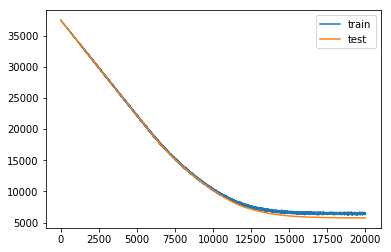

In [285]:
#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(trainingX, trainingY, epochs=20000, batch_size=50, validation_data=(testingX, testingY), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [305]:
validateY

array([47599.121094, 47650.570313, 47541.320313, 47563.339844,
       47787.988281, 47842.230469, 47626.980469, 47398.699219,
       47416.96875 , 46459.171875, 46720.960938, 46154.199219,
       45767.570313, 45922.910156, 45871.039063, 46341.328125,
       46929.191406, 47975.050781, 47778.480469, 47252.539063,
       47731.839844, 48046.558594, 47672.070313, 47245.800781,
       47601.929688, 47909.269531, 48141.421875, 47944.769531,
       47596.601563, 48264.960938, 48014.398438, 47915.121094,
       47741.539063, 47701.449219, 47657.328125, 48106.121094,
       48492.609375, 48274.25    , 48418.398438, 48431.25    ,
       48093.53125 , 47805.441406, 48114.671875, 48007.199219,
       48009.28125 , 47303.308594, 46683.800781, 46694.808594,
       48050.25    , 48470.988281, 47390.660156, 45224.378906,
       44978.25    , 45306.480469, 45023.648438, 44901.570313,
       44919.691406, 44364.171875, 44838.761719, 45184.078125,
       45265.898438, 45357.851563, 45470.609375, 45372.

In [301]:
yhat

array([[38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],


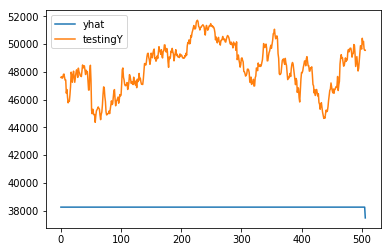

In [287]:
pyplot.plot(yhat.flatten(), label='yhat')
pyplot.plot(validateY.flatten(), label='testingY')
pyplot.legend()
pyplot.show()

In [288]:
initial_capital = 10000
growth = []
for i in range(len(yhat)):
    print(initial_capital)
    prediction = yhat[i]
    real_value = validateY[i]
    prediction2 = yhat[i + 1]
    real_value2 = validateY[i + 1]
    if prediction2 < prediction:
        initial_capital = initial_capital * (real_value2 / real_value)
    elif prediction2 > prediction:
        initial_capital = initial_capital * (real_value / real_value2)
    growth.append(initial_capital)

10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
1000

IndexError: index 507 is out of bounds for axis 0 with size 507

In [ ]:
pyplot.plot(growth, label='capital')
pyplot.legend()
pyplot.show()